# What's it take to be a Survivor?

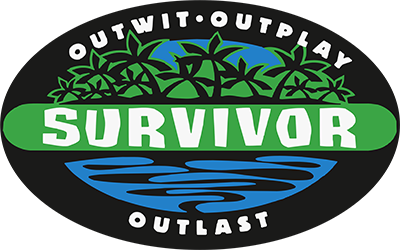

importing all of your important packages first...

In [173]:
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
from datetime import datetime
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re



set the theme...

In [174]:
colors = ['#3ba84f', '#2381ca', '#1b1e1c', '#757474']

In [175]:
all_szn_URL = 'https://en.wikipedia.org/wiki/Survivor_(American_TV_series)'
response = requests.get(all_szn_URL)

In [176]:
type(response)

requests.models.Response

check it out...

In [177]:
response.status_code

200

# nice :)

In [178]:
soup = BS(response.text)

In [179]:
soup.find('title').text

'Survivor (American TV series) - Wikipedia'

In [180]:
soup.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="font-size:95%; text-align:center">
<caption>List of <i>Survivor</i> seasons
</caption>
<tbody><tr>
<th style="width:2%;">Season
</th>
<th style="width:15%;">Subtitle
</th>
<th style="width:20%;">Location
</th>
<th style="width:20%;">Original tribes
</th>
<th style="width:15%;">Winner
</th>
<th colspan="2" style="width:20%">Runner(s)-up
</th>
<th style="white-space:nowrap">Final vote
</th></tr>
<tr>
<th><a href="/wiki/Survivor:_Borneo" title="Survivor: Borneo">1</a>
</th>
<td><i>Borneo</i><sup class="reference" id="cite_ref-12"><a href="#cite_note-12">[c]</a></sup></td>
<td><a href="/wiki/Tiga_Island,_Malaysia" title="Tiga Island, Malaysia">Pulau Tiga</a>, <a href="/wiki/Sabah" title="Sabah">Sabah</a>, Malaysia</td>
<td rowspan="4">Two tribes of eight new players</td>
<td><a href="/wiki/Richard_Hatch_(Survivor_contestant)" title="Richard Hatch (Survivor contestant)">Richard Hatch</a></td>
<td colspan="2">Kelly Wiglesworth</td>
<td rowspan="2">4–3

# All Seasons

In [181]:
seasons_df = pd.read_html(str(soup.find('table', attrs={'class' : 'wikitable'})))[0]
seasons_df

,Season,Subtitle,Location,Original tribes,Winner,Runner(s)-up,Runner(s)-up.1,Final vote
0,1,Borneo[c],"Pulau Tiga, Sabah, Malaysia",Two tribes of eight new players,Richard Hatch,Kelly Wiglesworth,Kelly Wiglesworth,4–3
1,2,The Australian Outback,"Herbert River at Goshen Station, Queensland, A...",Two tribes of eight new players,Tina Wesson,Colby Donaldson,Colby Donaldson,4–3
2,3,Africa,"Shaba National Reserve, Kenya[10]",Two tribes of eight new players,Ethan Zohn,Kim Johnson,Kim Johnson,5–2
3,4,Marquesas,"Nuku Hiva, Marquesas Islands, French Polynesia",Two tribes of eight new players,Vecepia Towery,Neleh Dennis,Neleh Dennis,4–3
4,5,Thailand,"Ko Tarutao, Satun Province, Thailand",Two tribes of eight new players; picked by the...,Brian Heidik,Clay Jordan,Clay Jordan,4–3
5,6,The Amazon,"Rio Negro, Amazonas, Brazil",Two tribes of eight new players divided by gender,Jenna Morasca,Matthew Von Ertfelda,Matthew Von Ertfelda,6–1
6,7,Pearl Islands,"Pearl Islands, Panama",Two tribes of eight new players,Sandra Diaz-Twine,Lillian Morris,Lillian Morris,6–1
7,8,All-Stars,"Pearl Islands, Panama",Three tribes of six returning players,Amber Brkich,Rob Mariano,Rob Mariano,4–3
8,9,Vanuatu,"Efate, Shefa, Vanuatu",Two tribes of nine new players divided by gender,Chris Daugherty,Twila Tanner,Twila Tanner,5–2
9,10,Palau,"Koror, Palau",A schoolyard pick of two tribes of nine new pl...,Tom Westman,Katie Gallagher,Katie Gallagher,6–1


# All Seasons Ratings + Viewership

In [182]:
# grabbing ratings table on the page
tables = soup.find_all('table', attrs={'class': 'wikitable'})
second_table = tables[2]  
ratings_df = pd.read_html(str(second_table))[0]
ratings_df = pd.DataFrame(ratings_df)
ratings_df = ratings_df.reset_index(drop=True)
ratings_df


Season   Timeslot (ET)[e]               Premiered  \
   Season   Timeslot (ET)[e]                    Date   
0       1  Wednesday 8:00 pm        May 31, 2000[33]   
1       2   Thursday 8:00 pm    January 28, 2001[36]   
2       3   Thursday 8:00 pm    October 11, 2001[39]   
3       4   Thursday 8:00 pm   February 28, 2002[42]   
4       5   Thursday 8:00 pm  September 19, 2002[45]   
5       6   Thursday 8:00 pm   February 13, 2003[48]   
6       7   Thursday 8:00 pm      September 18, 2003   
7       8   Thursday 8:00 pm        February 1, 2004   
8       9   Thursday 8:00 pm  September 16, 2004[54]   
9      10   Thursday 8:00 pm   February 17, 2005[56]   
10     11   Thursday 8:00 pm  September 15, 2005[59]   
11     12   Thursday 8:00 pm    February 2, 2006[62]   
12     13   Thursday 8:00 pm  September 14, 2006[64]   
13     14   Thursday 8:00 pm    February 8, 2007[66]   
14     15   Thursday 8:00 pm  September 20, 2007[67]   
15     16   Thursday 8:00 pm    February 7, 2008[69]   
16     17   Thursday 8:00 pm      September 25, 2008   
17     18   Thursday 8:00 pm       February 12, 2009   
18     19   Thursday 8:00 pm  September 17, 2009[74]   
19     20   Thursday 8:00 pm   February 11, 2010[78]   
20     21  Wednesday 8:00 pm  September 15, 2010[81]   
21     22  Wednesday 8:00 pm       February 16, 2011   
22     23  Wednesday 8:00 pm  September 14, 2011[87]   
23     24  Wednesday 8:00 pm       February 15, 2012   
24     25  Wednesday 8:00 pm  September 19, 2012[93]   
25     26  Wednesday 8:00 pm       February 13, 2013   
26     27  Wednesday 8:00 pm      September 18, 2013   
27     28  Wednesday 8:00 pm       February 26, 2014   
28     29  Wednesday 8:00 pm      September 24, 2014   
29     30  Wednesday 8:00 pm       February 25, 2015   
30     31  Wednesday 8:00 pm      September 23, 2015   
31     32  Wednesday 8:00 pm       February 17, 2016   
32     33  Wednesday 8:00 pm      September 21, 2016   
33     34  Wednesday 8:00 pm           March 8, 2017   
34     35  Wednesday 8:00 pm      September 27, 2017   
35     36  Wednesday 8:00 pm       February 28, 2018   
36     37  Wednesday 8:00 pm      September 26, 2018   
37     38  Wednesday 8:00 pm       February 20, 2019   
38     39  Wednesday 8:00 pm      September 25, 2019   
39     40  Wednesday 8:00 pm       February 12, 2020   
40     41  Wednesday 8:00 pm      September 22, 2021   
41     42  Wednesday 8:00 pm           March 9, 2022   
42     43  Wednesday 8:00 pm      September 21, 2022   
43     44  Wednesday 8:00 pm           March 1, 2023   

                                                   Ended  \
   Premiere viewers (in millions)                   Date   
0                           15.51        August 23, 2000   
1                        45.37[f]        May 3, 2001[37]   
2                           23.84   January 10, 2002[40]   
3                           23.19       May 19, 2002[43]   
4                           23.05  December 19, 2002[46]   
5                           23.26       May 11, 2003[49]   
6                           21.50  December 14, 2003[50]   
7                        33.53[f]        May 9, 2004[52]   
8                           20.06  December 12, 2004[55]   
9                           23.66       May 15, 2005[57]   
10                          18.41  December 11, 2005[60]   
11                          19.20           May 14, 2006   
12                          18.00      December 17, 2006   
13                          16.68           May 13, 2007   
14                          15.35      December 16, 2007   
15                          14.02           May 11, 2008   
16                      13.05[70]      December 14, 2008   
17                      13.63[72]           May 17, 2009   
18                      11.66[75]      December 20, 2009   
19                      14.15[79]           May 16, 2010   
20                      12.23[82]      December 19, 2010   
21                      11.17[85]           Ma

In [183]:
ratings_df.to_csv('webscrape_ratings.csv', index=False)

In [184]:
#creating a list comprehension to modify the column names due to multi named columns as tuples 
#(which I don't think is the same as multi index)
#if statement checks if the column name is a tuple, if it is, the expression f'{col[0]} {col[1]}' is evaluated 
#this combines the first and second element of the tuple with a space in between to create a new column name

ratings_df.columns = [f'{col[0]} {col[1]}' if isinstance(col, tuple) else col for col in ratings_df.columns]

ratings_df.reset_index(drop=True, inplace=True)

ratings_df.rename(columns={
    'Season Season': 'Season',
    'Timeslot (ET)[e] Timeslot (ET)[e]': 'Timeslot (ET)',
    'Premiered Date': 'Premiered Date',
    'Premiered Premiere viewers (in millions)': 'Premiere viewers (in millions)',
    'Ended Date': 'Ended Date',
    'Ended Finale viewers (in millions)': 'Finale viewers (in millions)',
    'Ended Reunion viewers (in millions)': 'Reunion viewers (in millions)',
    'TV season TV season': 'TV season',
    'Rank Rank': 'Rank',
    'Viewers (in millions) Viewers (in millions)': 'Viewers (in millions)'
}, inplace=True)

ratings_df

,Season,Timeslot (ET),Premiered Date,Premiere viewers (in millions),Ended Date,Finale viewers (in millions),Reunion viewers (in millions),TV season,Rank,Viewers (in millions)
0,1,Wednesday 8:00 pm,"May 31, 2000[33]",15.51,"August 23, 2000",51.69[33],36.70[34],1999–2000,2,28.30[35]
1,2,Thursday 8:00 pm,"January 28, 2001[36]",45.37[f],"May 3, 2001[37]",36.35,28.01,2000–01,1,29.80[38]
2,3,Thursday 8:00 pm,"October 11, 2001[39]",23.84,"January 10, 2002[40]",27.26,19.05,2001–02,8,20.69[41]
3,4,Thursday 8:00 pm,"February 28, 2002[42]",23.19,"May 19, 2002[43]",25.87,17.89,2001–02,6,20.77[44]
4,5,Thursday 8:00 pm,"September 19, 2002[45]",23.05,"December 19, 2002[46]",24.08,20.43,2002–03,4,21.21[47]
5,6,Thursday 8:00 pm,"February 13, 2003[48]",23.26,"May 11, 2003[49]",22.29,17.65,2002–03,9,19.97[47]
6,7,Thursday 8:00 pm,"September 18, 2003",21.50,"December 14, 2003[50]",25.23,21.87,2003–04,7,20.72[51]
7,8,Thursday 8:00 pm,"February 1, 2004",33.53[f],"May 9, 2004[52]",24.76,23.92,2003–04,3,21.49[53]
8,9,Thursday 8:00 pm,"September 16, 2004[54]",20.06,"December 12, 2004[55]",19.72,15.23,2004–05,10,19.64[56]
9,10,Thursday 8:00 pm,"February 17, 2005[56]",23.66,"May 15, 2005[57]",20.80,15.48,2004–05,5,20.91[58]


In [185]:
ratings_df['Premiered Date'] = ratings_df['Premiered Date'].astype(str).str.replace(r'\[\d+\]', '', regex=True)
ratings_df['Ended Date'] = ratings_df['Ended Date'].astype(str).str.replace(r'\[\d+\]', '', regex=True)
ratings_df['Viewers (in millions)'] = ratings_df['Viewers (in millions)'].astype(str).str.replace(r'\[\d+\]', '', regex=True)
ratings_df['Premiere viewers (in millions)'] = ratings_df['Premiere viewers (in millions)'].astype(str).str.replace(r'\[\d+\]', '', regex=True)
ratings_df['Premiere viewers (in millions)'] = ratings_df['Premiere viewers (in millions)'].astype(str).str.replace(r'\[f\]', '', regex=True)
ratings_df['Year'] = ratings_df['Premiered Date'].str.split(', ').str[-1]
ratings_df

,Season,Timeslot (ET),Premiered Date,Premiere viewers (in millions),Ended Date,Finale viewers (in millions),Reunion viewers (in millions),TV season,Rank,Viewers (in millions),Year
0,1,Wednesday 8:00 pm,"May 31, 2000",15.51,"August 23, 2000",51.69[33],36.70[34],1999–2000,2,28.30,2000
1,2,Thursday 8:00 pm,"January 28, 2001",45.37,"May 3, 2001",36.35,28.01,2000–01,1,29.80,2001
2,3,Thursday 8:00 pm,"October 11, 2001",23.84,"January 10, 2002",27.26,19.05,2001–02,8,20.69,2001
3,4,Thursday 8:00 pm,"February 28, 2002",23.19,"May 19, 2002",25.87,17.89,2001–02,6,20.77,2002
4,5,Thursday 8:00 pm,"September 19, 2002",23.05,"December 19, 2002",24.08,20.43,2002–03,4,21.21,2002
5,6,Thursday 8:00 pm,"February 13, 2003",23.26,"May 11, 2003",22.29,17.65,2002–03,9,19.97,2003
6,7,Thursday 8:00 pm,"September 18, 2003",21.50,"December 14, 2003",25.23,21.87,2003–04,7,20.72,2003
7,8,Thursday 8:00 pm,"February 1, 2004",33.53,"May 9, 2004",24.76,23.92,2003–04,3,21.49,2004
8,9,Thursday 8:00 pm,"September 16, 2004",20.06,"December 12, 2004",19.72,15.23,2004–05,10,19.64,2004
9,10,Thursday 8:00 pm,"February 17, 2005",23.66,"May 15, 2005",20.80,15.48,2004–05,5,20.91,2005


# Creating empty lists for overall contestants, challenge winners, & eliminations

In [186]:
all_contestants = []
all_challenge_winners_eliminations = []

# Season 1

In [187]:
szn_1_URL = 'https://en.wikipedia.org/wiki/Survivor:_Borneo'
response1 = requests.get(szn_1_URL)
response1.status_code

200

In [188]:
soup1 = BS(response1.text)
soup1.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="margin:auto; text-align:center">
<caption>List of <i>Survivor: Borneo</i> contestants
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Contestant
</th>
<th rowspan="2" scope="col">Age
</th>
<th class="unsortable" rowspan="2" scope="col">From
</th>
<th colspan="2" scope="colgroup">Tribe
</th>
<th colspan="2" scope="colgroup">Finish
</th></tr>
<tr>
<th scope="col">Original
</th>
<th class="unsortable" scope="col">Merged
</th>
<th class="unsortable" scope="col">Placement
</th>
<th class="unsortable" scope="col">Day
</th></tr>
<tr>
<th scope="row" style="text-align:left"><span data-sort-value="Christopher, Sonja"><span class="vcard"><span class="fn">Sonja Christopher</span></span></span>
</th>
<td>63
</td>
<td><a href="/wiki/Walnut_Creek,_California" title="Walnut Creek, California">Walnut Creek,<br/>California</a>
</td>
<td style="background:#ff6600; color:white;">Tagi
</td>
<td bgcolor="darkgray" rowspan="6">
</td>
<td>1st voted out
</td>
<td>Da

In [189]:
# getting contestants table and appending a column to classify the season
contestants_df_szn1 = pd.read_html(str(soup1.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn1['Season'] = 'Season 1'
contestants_df_szn1.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn1)

contestants_df_szn1

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1
1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1
2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1
3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1
4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1
5,Joel Klug,27,"Sherwood, Arkansas",Pagong,NaN,6th voted out,Day 18,Season 1
6,Gretchen Cordy,38,"Clarksville, Tennessee",Pagong,Rattana,7th voted out,Day 21,Season 1
7,Greg Buis,24,"Gold Hill, Colorado",Pagong,Rattana,8th voted out 1st jury member,Day 24,Season 1
8,Jenna Lewis,22,"Franklin, New Hampshire",Pagong,Rattana,9th voted out 2nd jury member,Day 27,Season 1
9,Gervase Peterson,30,"Willingboro, New Jersey",Pagong,Rattana,10th voted out 3rd jury member,Day 30,Season 1


# Season 1 Challenge Winners + Eliminations

In [190]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables = soup1.find_all('table', attrs={'class': 'wikitable'})
second_table = tables[1]  
challenge_winners_eliminations_1 = pd.read_html(str(second_table))[0]
challenge_winners_eliminations_1['Season'] = 'Season 1'
all_challenge_winners_eliminations.append(challenge_winners_eliminations_1)
challenge_winners_eliminations_1

Episode                                             Challenge winner(s)  \
       No.                      Title         Air date              Reward   
0        1            "The Marooning"     May 31, 2000              Pagong   
1        2       "The Generation Gap"     June 7, 2000           Pagong[a]   
2        3           "Quest for Food"    June 14, 2000                Tagi   
3        4    "Too Little, Too Late?"    June 21, 2000                Tagi   
4        5  "Pulling Your Own Weight"    June 28, 2000              Pagong   
5        6            "Udder Revenge"     July 5, 2000              Pagong   
6        7               "The Merger"    July 12, 2000             None[b]   
7        8    "Thy Name Is Duplicity"    July 19, 2000                Greg   
8        9        "Old and New Bonds"    July 26, 2000     Colleen [Jenna]   
9       10    "Crack in the Alliance"   August 2, 2000             Gervase   
10      11           "Long Hard Days"   August 9, 2000      Sean [Richard]   
11      12     "Death of an Alliance"  August 16, 2000               Kelly   
12      13           "The Final Four"  August 23, 2000                None   
13      13           "The Final Four"  August 23, 2000                None   
14      13           "The Final Four"  August 23, 2000                 NaN   
15      14              "The Reunion"  August 23, 2000                 NaN   

            Eliminated              Season  
   Immunity      Tribe    Player            
0    Pagong       Tagi     Sonja  Season 1  
1      Tagi     Pagong      B.B.  Season 1  
2    Pagong       Tagi    Stacey  Season 1  
3      Tagi     Pagong    Ramona  Season 1  
4    Pagong       Tagi      Dirk  Season 1  
5      Tagi     Pagong      Joel  Season 1  
6      Greg    Rattana  Gretchen  Season 1  
7   Gervase    Rattana      Greg  Season 1  
8      Rudy    Rattana     Jenna  Season 1  
9   Richard    Rattana   Gervase  Season 1  
10    Kelly    Rattana   Colleen  Season 1  
11    Kelly    Rattana      Sean  Season 1  
12    Kelly    Rattana     Susan  Season 1  
13    Kelly    Rattana      Rudy  Season 1  
14      NaN        NaN       NaN  Season 1  
15      NaN        NaN       NaN  Season 1

# Season 2

In [191]:
szn_2_URL = 'https://en.wikipedia.org/wiki/Survivor:_The_Australian_Outback'
response2 = requests.get(szn_2_URL)
soup2 = BS(response2.text)
soup2.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable" style="margin:auto; text-align:center">
<caption>List of <i>Survivor: The Australian Outback</i> contestants
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Contestant
</th>
<th rowspan="2" scope="col">Age
</th>
<th class="unsortable" rowspan="2" scope="col">From
</th>
<th colspan="2" scope="colgroup">Tribe
</th>
<th colspan="2">Finish
</th></tr>
<tr>
<th scope="col">Original
</th>
<th class="unsortable" scope="col">Merged
</th>
<th class="unsortable" scope="col">Placement
</th>
<th class="unsortable" scope="col">Day
</th></tr>
<tr>
<th scope="row" style="text-align:left"><span data-sort-value="Eaton, Debb"><span class="vcard"><span class="fn">Debb Eaton</span></span></span>
</th>
<td>45
</td>
<td><a href="/wiki/Milan,_New_Hampshire" title="Milan, New Hampshire">Milan,<br/>New Hampshire</a>
</td>
<td style="background:#0099cc; color:white;">Kucha
</td>
<td rowspan="6" style="background:darkgrey;">
</td>
<td>1st voted out
</td>
<td>Day 3
</td></tr>
<

In [192]:
contestants_df_szn2 = pd.read_html(str(soup2.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn2['Season'] = 'Season 2'
contestants_df_szn2.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn2)
contestants_df_szn2

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Debb Eaton,45,"Milan, New Hampshire",Kucha,NaN,1st voted out,Day 3,Season 2
1,Kel Gleason,32,"Fort Hood, Texas",Ogakor,NaN,2nd voted out,Day 6,Season 2
2,Maralyn Hershey,51,"Wakefield, Virginia",Ogakor,NaN,3rd voted out,Day 9,Season 2
3,Mitchell Olson,23,"Union City, New Jersey",Ogakor,NaN,4th voted out,Day 12,Season 2
4,Kimmi Kappenberg,27,"Ronkonkoma, New York",Kucha,NaN,5th voted out,Day 15,Season 2
5,Michael Skupin,38,"White Lake, Michigan",Kucha,NaN,Medically evacuated,Day 17,Season 2
6,Jeff Varner,34,"Manhattan, New York",Kucha,Barramundi,6th voted out,Day 21,Season 2
7,Alicia Calaway,32,"Manhattan, New York",Kucha,Barramundi,7th voted out 1st jury member,Day 24,Season 2
8,Jerri Manthey,30,"Los Angeles, California",Ogakor,Barramundi,8th voted out 2nd jury member,Day 27,Season 2
9,Nick Brown,23,"Steilacoom, Washington",Kucha,Barramundi,9th voted out 3rd jury member,Day 30,Season 2


# Season 2 Challenge Winners + Eliminations

In [193]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables2 = soup2.find_all('table', attrs={'class': 'wikitable'})
second_table2 = tables2[1]  
challenge_winners_eliminations2 = pd.read_html(str(second_table2))[0]
challenge_winners_eliminations2['Season'] = 'Season 2'
all_challenge_winners_eliminations.append(challenge_winners_eliminations2)
challenge_winners_eliminations2

Episode                                             Challenge winner(s)  \
       No.                    Title  Original air date              Reward   
0        1               "Stranded"   January 28, 2001              Ogakor   
1        2              "Suspicion"   February 1, 2001              Ogakor   
2        3           "Trust No One"   February 8, 2001              Ogakor   
3        4     "The Killing Fields"  February 15, 2001               Kucha   
4        5    "The Gloves Come Off"  February 22, 2001               Kucha   
5        6          "Trial By Fire"      March 1, 2001               Kucha   
6        7              "The Merge"      March 8, 2001             None[b]   
7        8               "Friends?"     March 14, 2001       Jerri [Amber]   
8        9      "The First 24 Days"     March 21, 2001       Recap Episode   
9       10      "Honeymoon or Not?"     March 29, 2001        Colby, Jerri   
10      11      "Let's Make a Deal"      April 5, 2001    Survivor Auction   
11      12  "No Longer Just a Game"     April 12, 2001               Colby   
12      13       "Enough Is Enough"     April 19, 2001                Tina   
13      14         "The Final Four"     April 26, 2001               Colby   
14      15     "The Most Deserving"        May 3, 2001                None   
15      16            "The Reunion"        May 3, 2001                 NaN   

                      Eliminated                   Season  
         Immunity          Tribe         Player            
0          Ogakor          Kucha           Debb  Season 2  
1           Kucha         Ogakor            Kel  Season 2  
2           Kucha         Ogakor        Maralyn  Season 2  
3           Kucha         Ogakor       Mitchell  Season 2  
4          Ogakor          Kucha          Kimmi  Season 2  
5         None[a]          Kucha        Michael  Season 2  
6           Keith     Barramundi           Jeff  Season 2  
7           Keith     Barramundi         Alicia  Season 2  
8   Recap Episode  Recap Episode  Recap Episode  Season 2  
9            Nick     Barramundi          Jerri  Season 2  
10          Colby     Barramundi           Nick  Season 2  
11          Colby     Barramundi          Amber  Season 2  
12          Colby     Barramundi         Rodger  Season 2  
13          Colby     Barramundi      Elisabeth  Season 2  
14          Colby     Barramundi          Keith  Season 2  
15            NaN            NaN            NaN  Season 2

# Season 3 

In [194]:
# first I get the url and pass it to requests.get
szn_3_URL = 'https://en.wikipedia.org/wiki/Survivor:_Africa'
response3 = requests.get(szn_3_URL)
soup3 = BS(response3.text)
contestants_df_szn3 = pd.read_html(str(soup3.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn3['Season'] = 'Season 3'
contestants_df_szn3.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn3)
contestants_df_szn3

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Diane Ogden,42,"Lincoln, Nebraska",Boran,NaN,NaN,1st voted out,Day 3,Season 3
1,Jessie Camacho,26,"Orlando, Florida",Boran,NaN,NaN,2nd voted out,Day 6,Season 3
2,Carl Bilancione,46,"Winter Springs, Florida",Samburu,NaN,NaN,3rd voted out,Day 9,Season 3
3,Linda Spencer,44,"Boston, Massachusetts",Samburu,NaN,NaN,4th voted out,Day 12,Season 3
4,Silas Gaither,23,"Los Angeles, California",Samburu,Boran,NaN,5th voted out,Day 15,Season 3
5,Lindsey Richter,26,"Portland, Oregon",Samburu,Samburu,NaN,6th voted out,Day 18,Season 3
6,Clarence Black,24,"Detroit, Michigan",Boran,Boran,Moto Maji,7th voted out,Day 21,Season 3
7,Kelly Goldsmith,22,"San Diego, California",Boran,Samburu,Moto Maji,8th voted out 1st jury member,Day 24,Season 3
8,Brandon Quinton,25,"Dallas, Texas",Samburu,Samburu,Moto Maji,9th voted out 2nd jury member,Day 27,Season 3
9,Frank Garrison,43,"Odessa, New York",Samburu,Boran,Moto Maji,10th voted out 3rd jury member,Day 30,Season 3


# Season 3 Challenge Winners + Eliminations

In [195]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables3 = soup3.find_all('table', attrs={'class': 'wikitable'})
second_table3 = tables3[1]  
challenge_winners_eliminations3 = pd.read_html(str(second_table3))[0]
challenge_winners_eliminations3['Season'] = 'Season 3'
all_challenge_winners_eliminations.append(challenge_winners_eliminations3)
challenge_winners_eliminations3

Episode                                                       \
       No.                             Title  Original air date   
0        1               "Question of Trust"   October 11, 2001   
1        2             "Who's Zooming Whom?"   October 18, 2001   
2        3              "The Gods Are Angry"   October 25, 2001   
3        4         "The Young and Untrusted"   November 1, 2001   
4        5                       "The Twist"   November 8, 2001   
5        6          "I'd Never Do It To You"  November 15, 2001   
6        7  "Will There Be a Feast Tonight?"  November 22, 2001   
7        8               "The First 21 Days"  November 29, 2001   
8        9           "Smoking Out the Snake"   December 6, 2001   
9       10    "Dinner, Movie and a Betrayal"  December 13, 2001   
10      11                   "We Are Family"  December 20, 2001   
11      12               "The Big Adventure"  December 27, 2001   
12      13                   "Truth Be Told"    January 3, 2002   
13      14      "The Final Four: No Regrets"   January 10, 2002   
14      14      "The Final Four: No Regrets"   January 10, 2002   
15      15                     "The Reunion"   January 10, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0              Samburu        Samburu          Boran          Diane  Season 3  
1              Samburu        Samburu          Boran         Jessie  Season 3  
2                Boran          Boran        Samburu           Carl  Season 3  
3              Samburu          Boran        Samburu          Linda  Season 3  
4                Boran        Samburu          Boran          Silas  Season 3  
5              Samburu          Boran        Samburu        Lindsey  Season 3  
6              None[a]         Teresa      Moto Maji       Clarence  Season 3  
7        Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 3  
8          Ethan [Lex]          Ethan      Moto Maji          Kelly  Season 3  
9       Brandon, Frank            Lex      Moto Maji        Brandon  Season 3  
10    Survivor Auction            Lex      Moto Maji          Frank  Season 3  
11           Lex [Tom]            Tom      Moto Maji         Kim P.  Season 3  
12                 Lex            Lex      Moto Maji         Teresa  Season 3  
13                None         Kim J.      Moto Maji            Tom  Season 3  
14                None         Kim J.      Moto Maji            Lex  Season 3  
15                 NaN            NaN            NaN            NaN  Season 3

# Season 4

In [196]:
# first I get the url and pass it to requests.get
szn_4_URL = 'https://en.wikipedia.org/wiki/Survivor:_Marquesas'
response4 = requests.get(szn_4_URL)
soup4 = BS(response4.text)
contestants_df_szn4 = pd.read_html(str(soup4.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn4['Season'] = 'Season 4'
contestants_df_szn4.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn4)
contestants_df_szn4

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Peter Harkey,44,"Millis, Massachusetts",Maraamu,NaN,NaN,1st voted out,Day 3,Season 4
1,Patricia Jackson,49,"Lugoff, South Carolina",Maraamu,NaN,NaN,2nd voted out,Day 6,Season 4
2,Hunter Ellis,33,"La Jolla, California",Maraamu,NaN,NaN,3rd voted out,Day 9,Season 4
3,Sarah Jones,24,"Newport Beach, California",Maraamu,Maraamu,NaN,4th voted out,Day 12,Season 4
4,Gabriel Cade,23,"Hollywood, California",Rotu,Rotu,NaN,5th voted out,Day 15,Season 4
5,Gina Crews,28,"Gainesville, Florida",Maraamu,Maraamu,NaN,6th voted out,Day 18,Season 4
6,Rob Mariano,25,"Canton, Massachusetts",Maraamu,Rotu,Soliantu,7th voted out,Day 21,Season 4
7,John Carroll,36,"Omaha, Nebraska",Rotu,Rotu,Soliantu,8th voted out 1st jury member,Day 24,Season 4
8,Zoe Zanidakis,35,"Monhegan, Maine",Rotu,Rotu,Soliantu,9th voted out 2nd jury member,Day 27,Season 4
9,Tammy Leitner,29,"Mesa, Arizona",Rotu,Rotu,Soliantu,10th voted out 3rd jury member,Day 30,Season 4


# Season 4 Challenge Winners + Eliminations

In [197]:
# grabbing 2nd table on challenges and winners and appending a column to classify the season
tables4 = soup4.find_all('table', attrs={'class': 'wikitable'})
second_table4 = tables4[1]  
challenge_winners_eliminations4 = pd.read_html(str(second_table4))[0]
challenge_winners_eliminations4['Season'] = 'Season 4'
all_challenge_winners_eliminations.append(challenge_winners_eliminations4)
challenge_winners_eliminations4

Episode                                                       \
       No.                             Title  Original air date   
0        1               "Back to the Beach"  February 28, 2002   
1        2                     "Nacho Momma"      March 7, 2002   
2        3                "No Pain, No Gain"     March 13, 2002   
3        4                 "The Winds Twist"     March 20, 2002   
4        5            "The End of Innocence"     March 28, 2002   
5        6                   "The Underdogs"      April 4, 2002   
6        7                       "True Lies"     April 11, 2002   
7        8                      "Jury's Out"     April 18, 2002   
8        9  "Look Closer: The First 24 Days"     April 24, 2002   
9       10               "Two Peas in a Pod"     April 25, 2002   
10      11                    "The Princess"        May 2, 2002   
11      12              "Marquesan Vacation"        May 9, 2002   
12      13            "A Tale of Two Cities"       May 16, 2002   
13      14               "The Sole Survivor"       May 19, 2002   
14      14               "The Sole Survivor"       May 19, 2002   
15      15                     "The Reunion"       May 19, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0                 None           Rotu        Maraamu          Peter  Season 4  
1                 Rotu           Rotu        Maraamu       Patricia  Season 4  
2                 Rotu           Rotu        Maraamu         Hunter  Season 4  
3              None[a]           Rotu        Maraamu          Sarah  Season 4  
4              Maraamu        Maraamu           Rotu        Gabriel  Season 4  
5              Maraamu           Rotu        Maraamu           Gina  Season 4  
6              None[b]          Kathy       Soliantu            Rob  Season 4  
7                Kathy          Tammy       Soliantu           John  Season 4  
8        Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 4  
9        Paschal, Sean          Tammy       Soliantu            Zoe  Season 4  
10     Paschal [Neleh]         Robert       Soliantu          Tammy  Season 4  
11            Kathy[c]        Vecepia       Soliantu         Robert  Season 4  
12                Sean          Kathy       Soliantu           Sean  Season 4  
13                None        Vecepia       Soliantu        Paschal  Season 4  
14                None          Neleh       Soliantu          Kathy  Season 4  
15                 NaN            NaN            NaN            NaN  Season 4

# Season 5

In [198]:
# first I get the url and pass it to requests.get
szn_5_URL = 'https://en.wikipedia.org/wiki/Survivor:_Thailand'
response5 = requests.get(szn_5_URL)
soup5 = BS(response5.text)
contestants_df_szn5 = pd.read_html(str(soup5.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn5['Season'] = 'Season 5'
contestants_df_szn5.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn5)
contestants_df_szn5

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,John Raymond,40,"Slidell, Louisiana",Chuay Gahn,NaN,1st voted out,Day 3,Season 5
1,Tanya Vance,27,"Gray, Tennessee",Chuay Gahn,NaN,2nd voted out,Day 6,Season 5
2,Jed Hildebrand,25,"Dallas, Texas",Sook Jai,NaN,3rd voted out,Day 9,Season 5
3,Ghandia Johnson,33,"Denver, Colorado",Chuay Gahn,NaN,4th voted out,Day 12,Season 5
4,Stephanie Dill,29,"Ozark, Arkansas",Sook Jai,NaN,5th voted out,Day 15,Season 5
5,Robb Zbacnik,23,"Scottsdale, Arizona",Sook Jai,NaN,6th voted out,Day 18,Season 5
6,Shii Ann Huang,28,"New York, New York",Sook Jai,NaN,7th voted out,Day 21,Season 5
7,Erin Collins,26,"Austin, Texas",Sook Jai,NaN,8th voted out 1st jury member,Day 24,Season 5
8,Ken Stafford,30,"Brooklyn, New York",Sook Jai,Chuay Jai,9th voted out 2nd jury member,Day 27,Season 5
9,Penny Ramsey,27,"Plano, Texas",Sook Jai,Chuay Jai,10th voted out 3rd jury member,Day 30,Season 5


# Season 5 Challenge Winners + Eliminations

In [199]:
tables5 = soup5.find_all('table', attrs={'class': 'wikitable'})
second_table5 = tables5[1]  
challenge_winners_eliminations5 = pd.read_html(str(second_table5))[0]
challenge_winners_eliminations5['Season'] = 'Season 5'
all_challenge_winners_eliminations.append(challenge_winners_eliminations5)
challenge_winners_eliminations5

Episode                                                        \
       No.                             Title   Original air date   
0        1  "The Importance of Being Eldest"  September 19, 2002   
1        2                "The Great Divide"  September 26, 2002   
2        3                   "Family Values"     October 3, 2002   
3        4                   "Gender Bender"    October 10, 2002   
4        5            "The Ocean's Surprise"    October 17, 2002   
5        6                "The Power of One"    October 24, 2002   
6        7                     "Assumptions"    October 31, 2002   
7        8         "Sleeping with the Enemy"    November 7, 2002   
8        9              "Desperate Measures"   November 14, 2002   
9       10         "While the Cats are Away"   November 21, 2002   
10      11               "The First 30 Days"   November 27, 2002   
11      12   "A Big Surprise... and Another"    December 5, 2002   
12      13           "The Tides are Turning"   December 12, 2002   
13      14       "Slip Through Your Fingers"   December 19, 2002   
14      14       "Slip Through Your Fingers"   December 19, 2002   
15      15                     "The Reunion"   December 19, 2002   

   Challenge winner(s)                    Eliminated                   Season  
                Reward       Immunity          Tribe         Player            
0                 None       Sook Jai     Chuay Gahn           John  Season 5  
1             Sook Jai       Sook Jai     Chuay Gahn          Tanya  Season 5  
2           Chuay Gahn     Chuay Gahn       Sook Jai            Jed  Season 5  
3             Sook Jai       Sook Jai     Chuay Gahn        Ghandia  Season 5  
4     Survivor Auction     Chuay Gahn       Sook Jai      Stephanie  Season 5  
5             Sook Jai     Chuay Gahn       Sook Jai           Robb  Season 5  
6                 None     Chuay Gahn       Sook Jai       Shii Ann  Season 5  
7                 None     Chuay Gahn       Sook Jai           Erin  Season 5  
8                Brian           Clay      Chuay Jai            Ken  Season 5  
9         Brian [Clay]          Helen      Chuay Jai          Penny  Season 5  
10       Recap Episode  Recap Episode  Recap Episode  Recap Episode  Season 5  
11            Helen[a]         Ted[b]      Chuay Jai           Jake  Season 5  
12         Ted [Helen]          Brian      Chuay Jai            Ted  Season 5  
13                None          Brian      Chuay Jai          Helen  Season 5  
14                None          Brian      Chuay Jai            Jan  Season 5  
15                 NaN            NaN            NaN            NaN  Season 5

# Season 6

In [200]:
szn_6_URL = 'https://en.wikipedia.org/wiki/Survivor:_The_Amazon'
response6 = requests.get(szn_6_URL)
soup6 = BS(response6.text)
contestants_df_szn6 = pd.read_html(str(soup6.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn6['Season'] = 'Season 6'
contestants_df_szn6.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn6)
contestants_df_szn6

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Ryan Aiken,23,"Ellicott City, Maryland",Tambaqui,NaN,NaN,1st voted out,Day 3,Season 6
1,Janet Koth,46,"Manchester, Missouri",Jaburu,NaN,NaN,2nd voted out,Day 6,Season 6
2,Daniel Lue,26,"Houston, Texas",Tambaqui,NaN,NaN,3rd voted out,Day 9,Season 6
3,JoAnna Ward,31,"Orangeburg, South Carolina",Jaburu,NaN,NaN,4th voted out,Day 12,Season 6
4,Jeanne Hebert,40,"North Attleborough, Massachusetts",Jaburu,Tambaqui,NaN,5th voted out,Day 15,Season 6
5,Shawna Mitchell,23,"Los Angeles, California",Jaburu,Jaburu,NaN,6th voted out,Day 18,Season 6
6,Roger Sexton,56,"Valencia, California",Tambaqui,Tambaqui,Jacaré,7th voted out,Day 21,Season 6
7,Dave Johnson,23,"Pasadena, California",Tambaqui,Tambaqui,Jacaré,8th voted out 1st jury member,Day 24,Season 6
8,Deena Bennett,35,"Riverside, California",Jaburu,Jaburu,Jacaré,9th voted out 2nd jury member,Day 27,Season 6
9,Alex Bell,32,"Los Angeles, California",Tambaqui,Jaburu,Jacaré,10th voted out 3rd jury member,Day 30,Season 6


# Season 6 Challenge Winners + Eliminations

In [201]:
tables6 = soup6.find_all('table', attrs={'class': 'wikitable'})
second_table6 = tables6[1]  
challenge_winners_eliminations6 = pd.read_html(str(second_table6))[0]
challenge_winners_eliminations6['Season'] = 'Season 6'
all_challenge_winners_eliminations.append(challenge_winners_eliminations6)
challenge_winners_eliminations6

Episode                                                    \
       No.                          Title  Original air date   
0        1               "Boys vs. Girls"  February 13, 2003   
1        2                       "Storms"  February 20, 2003   
2        3                   "Girl Power"  February 27, 2003   
3        4                      "Trapped"      March 6, 2003   
4        5               "Pick-up Sticks"     March 13, 2003   
5        6      "More Than Meats the Eye"     March 19, 2003   
6        7            "Girls Gone Wilder"     March 26, 2003   
7        8      "Sleeping With the Enemy"      April 3, 2003   
8        9                    "The Chain"     April 10, 2003   
9       10                 "Amazon Redux"     April 17, 2013   
10      11                      "Q and A"     April 24, 2003   
11      12                  "Sour Grapes"        May 1, 2003   
12      13          "The Amazon Heats Up"        May 8, 2003   
13      14  "...And Then There Were Four"       May 11, 2003   
14      14  "...And Then There Were Four"       May 11, 2003   
15      15                  "The Reunion"       May 11, 2003   

                            Challenge winner(s)                    \
                                         Reward          Immunity   
0                                          None            Jaburu   
1                                        Jaburu          Tambaqui   
2                                        Jaburu            Jaburu   
3                                      Tambaqui          Tambaqui   
4                                       None[a]            Jaburu   
5                                      Tambaqui          Tambaqui   
6                                       None[b]             Deena   
7                                  Dave [Deena]             Jenna   
8                                  Alex [Jenna]           Matthew   
9                                 Recap Episode     Recap Episode   
10                             Survivor Auction               Rob   
11  Matthew [Butch, Christy, Heidi, Jenna, Rob]  Jenna (Heidi)[c]   
12                                Matthew [Rob]           Matthew   
13                                         None             Jenna   
14                                         None             Jenna   
15                                          NaN               NaN   

       Eliminated                   Season  
            Tribe         Player            
0        Tambaqui           Ryan  Season 6  
1          Jaburu          Janet  Season 6  
2        Tambaqui         Daniel  Season 6  
3          Jaburu         JoAnna  Season 6  
4        Tambaqui         Jeanne  Season 6  
5          Jaburu         Shawna  Season 6  
6          Jacaré          Roger  Season 6  
7          Jacaré           Dave  Season 6  
8          Jacaré          Deena  Season 6  
9   Recap Episode  Recap Episode  Season 6  
10         Jacaré           Alex  Season 6  
11         Jacaré        Christy  Season 6  
12         Jacaré          Heidi  Season 6  
13         Jacaré          Butch  Season 6  
14         Jacaré            Rob  Season 6  
15            NaN            NaN  Season 6

# Season 7

In [202]:
szn_7_URL = 'https://en.wikipedia.org/wiki/Survivor:_Pearl_Islands'
response7 = requests.get(szn_7_URL)
soup7 = BS(response7.text)

contestants_df_szn7 = pd.read_html(str(soup7.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn7['Season'] = 'Season 7'
contestants_df_szn7.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn7)

contestants_df_szn7

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Nicole Delma,24,"Hermosa Beach, California",Morgan,Outcasts,NaN,1st voted out,Day 3,Season 7
1,Ryan Shoulders,23,"Clarksville, Tennessee",Morgan,Outcasts,NaN,2nd voted out,Day 6,Season 7
2,Lillian Morris (Returned to game),Lillian Morris (Returned to game),Lillian Morris (Returned to game),Morgan,Outcasts,NaN,3rd voted out[a],Day 9,Season 7
3,Burton Roberts (Returned to game),Burton Roberts (Returned to game),Burton Roberts (Returned to game),Drake,Outcasts,NaN,4th voted out[a],Day 12,Season 7
4,Michelle Tesauro,22,"Washington, D.C.",Drake,Outcasts,NaN,5th voted out,Day 15,Season 7
5,Trish Dunn,42,"Annapolis, Maryland",Drake,Outcasts,NaN,6th voted out,Day 18,Season 7
6,Shawn Cohen,28,"Hollywood, California",Drake,NaN,NaN,7th voted out,Day 19,Season 7
7,Osten Taylor,27,"Boston, Massachusetts",Morgan,NaN,NaN,Quit,Day 19,Season 7
8,Andrew Savage,39,"Chicago, Illinois",Morgan,NaN,Balboa,8th voted out,Day 21,Season 7
9,Ryan Opray,30,"Los Gatos, California",Morgan,NaN,Balboa,9th voted out 1st jury member,Day 24,Season 7


# Season 7 Challenge Winners + Eliminations

In [203]:
tables7 = soup7.find_all('table', attrs={'class': 'wikitable'})
second_table7 = tables7[1]  
challenge_winners_eliminations7 = pd.read_html(str(second_table7))[0]
challenge_winners_eliminations7['Season'] = 'Season 7'
all_challenge_winners_eliminations.append(challenge_winners_eliminations7)
challenge_winners_eliminations7

Episode                                                         \
       No.                              Title   Original air date   
0        1               "Beg, Barter, Steal"  September 18, 2003   
1        2           "To Quit or Not to Quit"  September 25, 2003   
2        3  "United We Stand, Divided We...?"     October 2, 2003   
3        4   "Pick a Castaway...Any Castaway"     October 9, 2003   
4        4   "Pick a Castaway...Any Castaway"     October 9, 2003   
5        5                  "Everyone's Hero"    October 16, 2003   
6        6                  "Me and My Snake"    October 23, 2003   
7        7             "What the...?, Part 1"    October 30, 2003   
8        7             "What the...?, Part 1"    October 30, 2003   
9        8             "What the...?, Part 2"    November 6, 2003   
10       8             "What the...?, Part 2"    November 6, 2003   
11       8             "What the...?, Part 2"    November 6, 2003   
12       9       "Shocking! Simply Shocking!"   November 13, 2003   
13      10             "Swimming With Sharks"   November 20, 2003   
14      11                    "The Great Lie"   November 26, 2003   
15      12    "Would You Be My Brutus Today?"    December 4, 2003   
16      13                           "Mutiny"   December 11, 2003   
17      14             "Flames and Endurance"   December 14, 2003   
18      14             "Flames and Endurance"   December 14, 2003   
19      15                          "Reunion"   December 14, 2003   

             Challenge winner(s)                     Eliminated            \
                          Reward            Immunity      Tribe    Player   
0                           None               Drake     Morgan    Nicole   
1                          Drake               Drake     Morgan   Ryan S.   
2                          Drake               Drake     Morgan   Lillian   
3                          Drake              Morgan      Drake    Burton   
4                          Drake           Rupert[a]      Drake    Burton   
5                         Morgan              Morgan      Drake  Michelle   
6                          Drake              Morgan      Drake     Trish   
7                           None         Outcasts[b]      Drake     Shawn   
8                           None         Outcasts[b]     Morgan     Osten   
9                        None[c]           Burton[d]     Balboa    Andrew   
10                       None[c]          Lillian[d]     Balboa    Andrew   
11                       None[c]  Burton (Rupert)[d]     Balboa    Andrew   
12  Rupert[e] (Burton) [Lillian]              Rupert     Balboa   Ryan O.   
13      Burton[f] (Jon), Lillian              Burton     Balboa    Rupert   
14                           Jon           Darrah[g]     Balboa   Tijuana   
15          Darrah, Jon, Lillian              Darrah     Balboa   Christa   
16                  Burton [Jon]              Darrah     Balboa    Burton   
17                          None         The Jury[h]     Balboa    Darrah   
18                          None             Lillian     Balboa       Jon   
19                           NaN                 NaN        NaN       NaN   

      Season  
              
0   Season 7  
1   Season 7  
2   Season 7  
3   Season 7  
4   Season 7  
5   Season 7  
6   Season 7  
7   Season 7  
8   Season 7  
9   Season 7  
10  Season 7  
11  Season 7  
12  Season 7  
13  Season 7  
14  Season 7  
15  Season 7  
16  Season 7  
17  Season 7  
18  Season 7  
19  Season 7

# Season 8

In [204]:
szn_8_URL = 'https://en.wikipedia.org/wiki/Survivor:_All-Stars'
response8 = requests.get(szn_8_URL)
soup8 = BS(response8.text)

contestants_df_szn8 = pd.read_html(str(soup8.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn8['Season'] = 'Season 8'
contestants_df_szn8.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Absorbed Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
contestants_df_szn8['Contestant'] = contestants_df_szn8['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn8)

contestants_df_szn8

,Contestant,Age,From,Original Tribe,Absorbed Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Tina Wesson,42,"Knoxville, Tennessee",Saboga,NaN,NaN,NaN,1st voted out,Day 3,Season 8
1,Rudy Boesch,75,"Virginia Beach, Virginia",Saboga,NaN,NaN,NaN,2nd voted out,Day 6,Season 8
2,Jenna Morasca,22,"Bridgeville, Pennsylvania",Mogo Mogo,NaN,NaN,NaN,Quit,Day 9,Season 8
3,Rob Cesternino,25,"Plainview, New York",Chapera,NaN,NaN,NaN,3rd voted out,Day 12,Season 8
4,Richard Hatch,42,"Middletown, Rhode Island",Mogo Mogo,Mogo Mogo,NaN,NaN,4th voted out,Day 15,Season 8
5,Sue Hawk,42,"Las Vegas, Nevada",Chapera,Chapera,NaN,NaN,Quit,Day 17,Season 8
6,Colby Donaldson,29,"Los Angeles, California",Mogo Mogo,Mogo Mogo,NaN,NaN,5th voted out,Day 19,Season 8
7,Ethan Zohn,30,"New York, New York",Saboga,Mogo Mogo,NaN,NaN,6th voted out,Day 21,Season 8
8,Jerri Manthey,33,"Los Angeles, California",Saboga,Mogo Mogo,Chapera,NaN,7th voted out,Day 24,Season 8
9,Lex van,40,"Santa Cruz, California",Mogo Mogo,Mogo Mogo,Chapera,Chaboga Mogo,8th voted out 1st jury member,Day 27,Season 8


# Season 8 Challenge Winners + Eliminations

In [205]:
tables8 = soup8.find_all('table', attrs={'class': 'wikitable'})
second_table8 = tables8[1]  
challenge_winners_eliminations8 = pd.read_html(str(second_table8))[0]
challenge_winners_eliminations8['Season'] = 'Season 8'
all_challenge_winners_eliminations.append(challenge_winners_eliminations8)
challenge_winners_eliminations8

Episode                                                                 \
       No.                                       Title  Original air date   
0        1                             "They're Back!"   February 1, 2004   
1        1                             "They're Back!"   February 1, 2004   
2        2      "Panicked, Desperate, Thirsty as Hell"   February 5, 2004   
3        2      "Panicked, Desperate, Thirsty as Hell"   February 5, 2004   
4        3                              "Shark Attack"  February 12, 2004   
5        3                              "Shark Attack"  February 12, 2004   
6        4                                 "Wipe Out!"  February 19, 2004   
7        4                                 "Wipe Out!"  February 19, 2004   
8        5                     "I've Been Bamboozled!"  February 26, 2004   
9        5                     "I've Been Bamboozled!"  February 26, 2004   
10       6                                  "Outraged"      March 4, 2004   
11       7                         "Sorry...I Blew It"     March 11, 2004   
12       7                         "Sorry...I Blew It"     March 11, 2004   
13       8                          "Pick A Tribemate"     March 17, 2004   
14       9            "A Closer Look (All Star Redux)"     March 24, 2004   
15      10            "Mad Scramble and Broken Hearts"      April 1, 2004   
16      11                    "Anger, Tears and Chaos"      April 8, 2004   
17      11                    "Anger, Tears and Chaos"      April 8, 2004   
18      12  "A Thoughtful Gesture or a Deceptive Plan"     April 15, 2004   
19      12  "A Thoughtful Gesture or a Deceptive Plan"     April 15, 2004   
20      13      "Stupid People, Stupid, Stupid People"     April 22, 2004   
21      14                        "A Chapera Surprise"     April 29, 2004   
22      15                            "The Instigator"        May 6, 2004   
23      16               "The Sole Surviving All-Star"        May 9, 2004   
24      16               "The Sole Surviving All-Star"        May 9, 2004   
25      17                               "The Reunion"        May 9, 2004   

                         Challenge winner(s)                    Eliminated  \
                                      Reward       Immunity          Tribe   
0                                       None        Chapera         Saboga   
1                                       None      Mogo Mogo         Saboga   
2                                     Saboga        Chapera         Saboga   
3                                     Saboga      Mogo Mogo         Saboga   
4                                    Chapera        None[a]      Mogo Mogo   
5                                  Mogo Mogo        None[a]      Mogo Mogo   
6                                    Chapera         Saboga        Chapera   
7                                     Saboga      Mogo Mogo        Chapera   
8                               Mogo Mogo[b]        Chapera      Mogo Mogo   
9                                 Chapera[b]        Chapera      Mogo Mogo   
10                                 Mogo Mogo        None[c]        Chapera   
11                                Chapera[d]     Chapera[d]      Mogo Mogo   
12                                  Kathy[e]       Kathy[e]      Mogo Mogo   
13                                   Chapera        Chapera      Mogo Mogo   
14                             Recap Episode  Recap Episode  Recap Episode   
15                                   None[f]      Mogo Mogo        Chapera   
16               Rupert[g] [Jenna L., Amber]       Kathy[h]   Chaboga Mogo   
17               Rupert[g] [Jenna L., Amber]      Rob M.[h]   Chaboga Mogo   
18           Alicia, Amber, Rob M., Shii Ann      Rob M.[i]   Chaboga Mogo   
19  Rob M. (Jenna L., Kathy, Rupert, Tom)[i]      Rob M.[i]   Chaboga Mogo   
20                                    Rupert       Shii Ann   Chaboga Mogo   
21                           Tom[j] [Rob M.]        

# Season 9 

In [206]:
szn_9_URL = 'https://en.wikipedia.org/wiki/Survivor:_Vanuatu'
response9 = requests.get(szn_9_URL)
soup9 = BS(response9.text)

contestants_df_szn9 = pd.read_html(str(soup9.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn9['Season'] = 'Season 9'
contestants_df_szn9.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn9)

contestants_df_szn9

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Brook Geraghty,27,"Winthrop, Massachusetts",Lopevi,NaN,NaN,1st voted out,Day 3,Season 9
1,Dolly Neely,25,"Lake Latonka, Pennsylvania",Yasur,NaN,NaN,2nd voted out,Day 6,Season 9
2,John Palyok,31,"Los Angeles, California",Lopevi,NaN,NaN,3rd voted out,Day 7,Season 9
3,Mia Galeotalanza,29,"Boston, Massachusetts",Yasur,NaN,NaN,4th voted out,Day 7,Season 9
4,Brady Finta,33,"Huntington Beach, California",Lopevi,NaN,NaN,5th voted out,Day 10,Season 9
5,"Travis ""Bubba"" Sampson",33,"Johnson City, Tennessee",Lopevi,Yasur,NaN,6th voted out,Day 12,Season 9
6,Lisa Keiffer,44,"Mandeville, Louisiana",Yasur,Yasur,NaN,7th voted out,Day 15,Season 9
7,John Kenney,22,"Los Angeles, California",Lopevi,Lopevi,NaN,8th voted out,Day 18,Season 9
8,Rory Freeman,35,"Des Moines, Iowa",Lopevi,Yasur,Alinta,9th voted out,Day 21,Season 9
9,"Lea ""Sarge"" Masters",40,"Columbia, South Carolina",Lopevi,Lopevi,Alinta,10th voted out 1st jury member,Day 24,Season 9


# Season 9 Challenge Winners + Eliminations

In [207]:
tables9 = soup9.find_all('table', attrs={'class': 'wikitable'})
second_table9 = tables9[1]  
challenge_winners_eliminations9 = pd.read_html(str(second_table9))[0]
challenge_winners_eliminations9['Season'] = 'Season 9'
all_challenge_winners_eliminations.append(challenge_winners_eliminations9)
challenge_winners_eliminations9

Episode                                                     \
       No.                                           Title[4]   
0        1                     "They Came at Us With Spears!"   
1        2  "Burly Girls, Bowheads, Young Studs, and the O...   
2        3                    "Double Tribal, Double Trouble"   
3        3                    "Double Tribal, Double Trouble"   
4        4                             "Now That's a Reward!"   
5        5                       "Earthquakes and Shake-Ups!"   
6        6                                         "Hog Tied"   
7        7               "Anger, Threats, Tears...and Coffee"   
8        8                     "Now the Battle Really Begins"   
9        9                  "Gender Wars...It's Getting Ugly"   
10      10                 "Culture Shock and Violent Storms"   
11      11                   "Surprise and...Surprise Again!"   
12      12                       "Now Who's in Charge Here?!"   
13      13                   "Eruption of Volcanic Magnitude"   
14      14                       "Spirits and the Final Four"   
15      14                       "Spirits and the Final Four"   
16      15                                      "The Reunion"   

                            Challenge winner(s)                       \
     Original air date                   Reward             Immunity   
0   September 16, 2004                    Yasur                Yasur   
1   September 23, 2004                    Yasur               Lopevi   
2   September 30, 2004                   Lopevi  John K. (Lopevi)[a]   
3   September 30, 2004                   Lopevi       Ami (Yasur)[b]   
4      October 7, 2004                    Yasur                Yasur   
5     October 14, 2004                   Lopevi               Lopevi   
6     October 21, 2004                   Lopevi               Lopevi   
7     October 28, 2004                    Yasur                Yasur   
8     November 4, 2004                   Lopevi                Sarge   
9    November 11, 2004            Leann [Julie]                  Ami   
10   November 18, 2004  Ami, Chad, Chris, Eliza                Twila   
11   November 25, 2004                    Eliza                  Ami   
12    December 2, 2004     Eliza, Ami, Chris[c]                Chris   
13    December 9, 2004            Julie [Chris]                Eliza   
14   December 12, 2004                     None                Chris   
15   December 12, 2004                     None                Chris   
16   December 12, 2004                      NaN                  NaN   

   Eliminated          Unnamed: 7_level_0    Season  
        Tribe   Player Unnamed: 7_level_1            
0      Lopevi    Brook                NaN  Season 9  
1       Yasur    Dolly                NaN  Season 9  
2      Lopevi  John P.                NaN  Season 9  
3       Yasur      Mia                NaN  Season 9  
4      Lopevi    Brady                NaN  Season 9  
5       Yasur   Travis                NaN  Season 9  
6       Yasur     Lisa                NaN  Season 9  
7      Lopevi  John K.                NaN  Season 9  
8      Alinta     Rory                NaN  Season 9  
9      Alinta    Sarge                NaN  Season 9  
10     Alinta     Chad                NaN  Season 9  
11     Alinta    Leann                NaN  Season 9  
12     Alinta      Ami                NaN  Season 9  
13     Alinta    Julie                NaN  Season 9  
14     Alinta    Eliza                NaN  Season 9  
15     Alinta    Scout                NaN  Season 9  
16        NaN      NaN             Alinta  Season 9

# Season 10

In [208]:
szn_10_URL = 'https://en.wikipedia.org/wiki/Survivor:_Palau'
response10 = requests.get(szn_10_URL)
soup10 = BS(response10.text)

contestants_df_szn10 = pd.read_html(str(soup10.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn10['Season'] = 'Season 10'
contestants_df_szn10.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Absorbed Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn10)

contestants_df_szn10

,Contestant,Age,From,Original Tribe,Absorbed Tribe,Placement,Finish Day,Season
0,Jonathan Libby,23,"Dallas, Texas",None[a],NaN,Eliminated[a],Day 2,Season 10
1,Wanda Shirk,55,"Ulysses, Pennsylvania",None[a],NaN,Eliminated[a],Day 2,Season 10
2,Jolanda Jones,38,"Houston, Texas",Ulong,NaN,1st voted out,Day 3,Season 10
3,Ashlee Ashby,22,"Easley, South Carolina",Ulong,NaN,2nd voted out,Day 6,Season 10
4,Jeff Wilson,21,"Ventura, California",Ulong,NaN,3rd voted out,Day 8,Season 10
5,"Kimberly ""Kim"" Mullen",25,"Huber Heights, Ohio",Ulong,NaN,4th voted out,Day 11,Season 10
6,Willard Smith,56,"Bellevue, Washington",Koror,NaN,5th voted out,Day 12,Season 10
7,Angie Jakusz,24,"New Orleans, Louisiana",Ulong,NaN,6th voted out,Day 12,Season 10
8,James Miller,33,"Mobile, Alabama",Ulong,NaN,7th voted out,Day 15,Season 10
9,Ibrehem Rahman,27,"Birmingham, Alabama",Ulong,NaN,8th voted out,Day 18,Season 10


# Season 10 Challenge Winners + Eliminations

In [209]:
tables10 = soup10.find_all('table', attrs={'class': 'wikitable'})
second_table10 = tables10[1]  
challenge_winners_eliminations10 = pd.read_html(str(second_table10))[0]
challenge_winners_eliminations10['Season'] = 'Season 10'
all_challenge_winners_eliminations.append(challenge_winners_eliminations10)
challenge_winners_eliminations10

Episode                                                                  \
       No.                                        Title  Original air date   
0        1            "This Has Never Happened Before!"  February 17, 2005   
1        1            "This Has Never Happened Before!"  February 17, 2005   
2        1            "This Has Never Happened Before!"  February 17, 2005   
3        2    "Love is in the Air, Rats Are Everywhere"  February 24, 2005   
4        3  "Dangerous Creatures and Horrible Setbacks"      March 3, 2005   
5        4                                "Sumo at Sea"     March 10, 2005   
6        5             "The Best and Worst Reward Ever"     March 16, 2005   
7        5             "The Best and Worst Reward Ever"     March 16, 2005   
8        6                         "Jellyfish 'N Chips"     March 23, 2005   
9        7               "The Great White Shark Hunter"     March 31, 2005   
10       8                            "Neanderthal Man"      April 7, 2005   
11       9                         "I Will Not Give Up"     April 14, 2005   
12      10                               "Exile Island"     April 21, 2005   
13      11         "I'll Show You How Threatening I Am"     April 28, 2005   
14      12                         "We'll Make You Pay"        May 5, 2005   
15      13                      "It Could All Backfire"       May 12, 2005   
16      14                         "The Ultimate Shock"       May 15, 2005   
17      14                         "The Ultimate Shock"       May 15, 2005   
18      15                                "The Reunion"       May 15, 2005   

        Challenge winner(s)             Eliminated                Season  
                     Reward    Immunity      Tribe     Player             
0                      None      Ian[a]       None   Jonathan  Season 10  
1                      None  Jolanda[a]       None      Wanda  Season 10  
2                     Koror       Koror      Ulong    Jolanda  Season 10  
3                     Ulong       Koror      Ulong     Ashlee  Season 10  
4                     Ulong       Koror      Ulong       Jeff  Season 10  
5                     Koror       Koror      Ulong        Kim  Season 10  
6                     Koror         NaN      Koror    Willard  Season 10  
7                     Koror  Ibrehem[b]      Ulong      Angie  Season 10  
8                     Ulong       Koror      Ulong      James  Season 10  
9                     Koror       Koror      Ulong    Ibrehem  Season 10  
10                    Koror       Koror      Ulong  Bobby Jon  Season 10  
11                  None[c]         Tom      Koror       Coby  Season 10  
12  Caryn, Gregg, Janu, Tom         Tom      Koror       Janu  Season 10  
13         Survivor Auction         Ian      Koror  Stephenie  Season 10  
14      Gregg [Jenn, Katie]         Ian      Koror      Gregg  Season 10  
15                Ian [Tom]         Tom      Koror      Caryn  Season 10  
16                     None         Tom      Koror       Jenn  Season 10  
17                     None         Tom      Koror        Ian  Season 10  
18                      NaN         NaN        NaN        NaN  Season 10

# Season 11

In [210]:
szn_11_URL = 'https://en.wikipedia.org/wiki/Survivor:_Guatemala'
response11 = requests.get(szn_11_URL)
soup11 = BS(response11.text)

contestants_df_szn11 = pd.read_html(str(soup11.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn11['Season'] = 'Season 11'
contestants_df_szn11.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn11)

contestants_df_szn11

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Jim Lynch,63,"Northglenn, Colorado",Nakúm,NaN,NaN,1st voted out,Day 3,Season 11
1,Morgan McDevitt,21,"Decatur, Illinois",Yaxhá,NaN,NaN,2nd voted out,Day 6,Season 11
2,Brianna Varela,21,"Edmonds, Washington",Yaxhá,NaN,NaN,3rd voted out,Day 8,Season 11
3,Brooke Struck,25,"Hood River, Oregon",Nakúm,Nakúm,NaN,4th voted out,Day 11,Season 11
4,Blake Towsley,24,"Dallas, Texas",Nakúm,Yaxhá,NaN,5th voted out,Day 14,Season 11
5,Margaret Bobonich,43,"Chardon, Ohio",Nakúm,Nakúm,NaN,6th voted out,Day 15,Season 11
6,Brian Corridan,22,"New York City, New York",Yaxhá,Yaxhá,NaN,7th voted out,Day 15,Season 11
7,Amy O'Hara,39,"Revere, Massachusetts",Yaxhá,Yaxhá,NaN,8th voted out,Day 18,Season 11
8,Brandon Bellinger,22,"Manhattan, Kansas",Nakúm,Yaxhá,Xhakúm,9th voted out,Day 21,Season 11
9,Bobby Jon Drinkard Palau,28,"Los Angeles, California",Nakúm,Yaxhá,Xhakúm,10th voted out 1st jury member,Day 24,Season 11


# Season 11 Challenge Winners + Eliminations

In [211]:
tables11 = soup11.find_all('table', attrs={'class': 'wikitable'})
second_table11 = tables11[1]  
challenge_winners_eliminations11 = pd.read_html(str(second_table11))[0]
challenge_winners_eliminations11['Season'] = 'Season 11'
all_challenge_winners_eliminations.append(challenge_winners_eliminations11)
challenge_winners_eliminations11

Episode                                                     \
       No.                                              Title   
0        1              "Big Trek, Big Trouble, Big Surprise"   
1        2                                         "Man Down"   
2        3  "The Brave May Not Live Long, but the Cautious...   
3        4                      "To Betray, or Not to Betray"   
4        5                 "Crocs, Cowboys and City Slickers"   
5        6                 "Big Ball, Big Mouth, Big Trouble"   
6        6                 "Big Ball, Big Mouth, Big Trouble"   
7        7                             "Surprise Enemy Visit"   
8        8                         "The Hidden Immunity Idol"   
9        9            "Secrets and Lies and an Idol Surprise"   
10      10               "Eating and Sleeping With the Enemy"   
11      11                           "Everything Is Personal"   
12      12                               "Price for Immunity"   
13      13              "Big Win, Big Decision, Big Mistake?"   
14      14                       "Thunder Storms & Sacrifice"   
15      14                       "Thunder Storms & Sacrifice"   
16      15                                      "The Reunion"   

                                   Challenge winner(s)                   \
     Original air date                          Reward         Immunity   
0   September 15, 2005                           Nakúm            Yaxhá   
1   September 22, 2005                           Nakúm            Nakúm   
2   September 29, 2005                           Nakúm            Nakúm   
3      October 6, 2005          Survivor Questionnaire            Yaxhá   
4     October 13, 2005                           Yaxhá            Nakúm   
5     October 20, 2005                           Nakúm     Rafe (Nakúm)   
6     October 20, 2005                           Nakúm  Gary (Yaxhá)[a]   
7     October 27, 2005                           Yaxhá            Nakúm   
8     November 3, 2005                         None[b]             Gary   
9    November 10, 2005  Judd [Bobby Jon, Stephenie][c]            Jamie   
10   November 17, 2005    Danni, Gary, Judd, Stephenie             Rafe   
11   November 24, 2005                    Cindy [Rafe]             Rafe   
12    December 1, 2005                Survivor Auction            Danni   
13    December 8, 2005               Cindy [Stephenie]        Stephenie   
14   December 11, 2005                            None             Rafe   
15   December 11, 2005                            None            Danni   
16   December 11, 2005                             NaN              NaN   

   Eliminated                Season  
        Tribe     Player             
0       Nakúm        Jim  Season 11  
1       Yaxhá     Morgan  Season 11  
2       Yaxhá    Brianna  Season 11  
3       Nakúm     Brooke  Season 11  
4       Yaxhá      Blake  Season 11  
5       Nakúm   Margaret  Season 11  
6       Yaxhá      Brian  Season 11  
7       Yaxhá        Amy  Season 11  
8      Xhakúm    Brandon  Season 11  
9      Xhakúm  Bobby Jon  Season 11  
10     Xhakúm      Jamie  Season 11  
11     Xhakúm       Gary  Season 11  
12     Xhakúm       Judd  Season 11  
13     Xhakúm      Cindy  Season 11  
14     Xhakúm      Lydia  Season 11  
15     Xhakúm       Rafe  Season 11  
16        NaN        NaN  Season 11

# Season 12

In [212]:
szn_12_URL = 'https://en.wikipedia.org/wiki/Survivor:_Panama'
response12 = requests.get(szn_12_URL)
soup12 = BS(response12.text)

contestants_df_szn12 = pd.read_html(str(soup12.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn12['Season'] = 'Season 12'
contestants_df_szn12.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn12)

contestants_df_szn12

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Tina Scheer,44,"Hayward, Wisconsin",Casaya,NaN,NaN,1st voted out,Day 3,Season 12
1,Melinda Hyder,32,"Sevierville, Tennessee",Casaya,Casaya,NaN,2nd voted out,Day 6,Season 12
2,Misty Giles,24,"Dallas, Texas",Bayoneta,La Mina,NaN,3rd voted out,Day 8,Season 12
3,Ruth Marie Milliman,48,"Greenville, South Carolina",Casaya,La Mina,NaN,4th voted out,Day 11,Season 12
4,Bobby Mason,32,"Los Angeles, California",Viveros,Casaya,NaN,5th voted out,Day 14,Season 12
5,Dan Barry,51,"South Hadley, Massachusetts",La Mina,La Mina,NaN,6th voted out,Day 15,Season 12
6,Nick Stanbury,25,"Tempe, Arizona",Viveros,La Mina,Gitanos,7th voted out,Day 18,Season 12
7,Austin Carty,24,"High Point, North Carolina",Viveros,La Mina,Gitanos,8th voted out 1st jury member,Day 21,Season 12
8,Sally Schumann,27,"Chicago, Illinois",Bayoneta,La Mina,Gitanos,9th voted out 2nd jury member,Day 24,Season 12
9,Bruce Kanegai,57,"Simi Valley, California",La Mina,Casaya,Gitanos,Medically evacuated 3rd jury member,Day 25,Season 12


# Season 12 Challenge Winners + Eliminations

In [213]:
tables12 = soup12.find_all('table', attrs={'class': 'wikitable'})
second_table12 = tables12[1]  
challenge_winners_eliminations12 = pd.read_html(str(second_table12))[0]
challenge_winners_eliminations12['Season'] = 'Season 12'
all_challenge_winners_eliminations.append(challenge_winners_eliminations12)
challenge_winners_eliminations12

Episode                                                    \
       No.                          Title  Original air date   
0        1              "The First Exile"   February 2, 2006   
1        1              "The First Exile"   February 2, 2006   
2        1              "The First Exile"   February 2, 2006   
3        2                    "Breakdown"   February 9, 2006   
4        3  "Crazy Fights, Snake Dinners"  February 16, 2006   
5        4        "Starvation and Lunacy"  February 23, 2006   
6        5               "For Cod's Sake"      March 2, 2006   
7        6      "Salvation and Desertion"      March 9, 2006   
8        7                "A Closer Look"     March 15, 2006   
9        8             "An Emerging Plan"     March 30, 2006   
10       9        "The Power of the Idol"      April 6, 2006   
11       9        "The Power of the Idol"      April 6, 2006   
12      10   "Fight for Your Life or Eat"     April 13, 2006   
13      11            "Medical Emergency"     April 20, 2006   
14      12            "Perilous Scramble"     April 27, 2006   
15      13                   "Bamboozled"        May 4, 2006   
16      14        "Call the Whambulence!"       May 11, 2006   
17      14        "Call the Whambulence!"       May 11, 2006   
18      15           "The Final Showdown"       May 14, 2006   
19      15           "The Final Showdown"       May 14, 2006   
20      16                      "Reunion"       May 14, 2006   

                         Challenge winner(s)  \
                                      Reward   
0                         Terry (La Mina)[a]   
1                        Austin (Viveros)[a]   
2                     Ruth Marie (Casaya)[a]   
3                                    La Mina   
4                                    La Mina   
5                                     Casaya   
6                                     Casaya   
7                                     Casaya   
8                              Recap Episode   
9                                    None[c]   
10                        Aras, Bruce, Sally   
11                        Aras, Bruce, Sally   
12             Bruce, Courtney, Sally, Terry   
13                    Cirie [Aras, Danielle]   
14              Courtney, Danielle, Terry[e]   
15                          Terry [Shane][f]   
16                              Aras [Cirie]   
17                              Aras [Cirie]   
18  Conclusion of previous Tribal Council[g]   
19                                     Terry   
20                                       NaN   

                                              \
                                    Immunity   
0                                   Bayoneta   
1                                    La Mina   
2                                    Viveros   
3                                    La Mina   
4                                     Casaya   
5                                     Casaya   
6                                    La Mina   
7                                     Casaya   
8                              Recap Episode   
9                                      Terry   
10                                     Terry   
11                                     Terry   
12                                     Terry   
13                                   None[d]   
14                                     Terry   
15                                     Terry   
16                                      Aras   
17                                      Aras   
18  Conclusion of previous Tribal Council[g]   
19                                  Danielle   
20                                       NaN   

                                Exile Island  \
                                Exile Island   
0                           Misty (Bayoneta)   
1                           Misty (Bayoneta)   
2                           Misty (Bayoneta)   
3                                   Bruce[b]   
4                             Br

# Season 13

In [214]:
szn_13_URL = 'https://en.wikipedia.org/wiki/Survivor:_Cook_Islands'
response13 = requests.get(szn_13_URL)
soup13 = BS(response13.text)

contestants_df_szn13 = pd.read_html(str(soup13.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn13['Season'] = 'Season 13'
contestants_df_szn13.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Post-mutiny', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn13)

contestants_df_szn13

,Contestant,Age,From,Original Tribe,Switched Tribe,Post-mutiny,Merged Tribe,Placement,Finish Day,Season
0,Sekou Bunch,45,"Los Angeles, California",Manihiki,NaN,NaN,NaN,1st voted out,Day 3,Season 13
1,"Virgilio ""Billy"" Garcia",36,"New York City, New York",Aitutaki,NaN,NaN,NaN,2nd voted out,Day 6,Season 13
2,Cecilia Mansilla,29,"Oakland, California",Aitutaki,Aitutaki,NaN,NaN,3rd voted out,Day 8,Season 13
3,"John ""J.P."" Calderon",30,"Long Beach, California",Aitutaki,Rarotonga,NaN,NaN,4th voted out,Day 11,Season 13
4,Stephannie Favor,35,"Columbia, South Carolina",Manihiki,Rarotonga,NaN,NaN,5th voted out,Day 14,Season 13
5,"Anh-Tuan ""Cao Boi"" Bui",42,"Christiansburg, Virginia",Puka Puka,Aitutaki,NaN,NaN,6th voted out,Day 15,Season 13
6,Cristina Coria,35,"Santa Monica, California",Aitutaki,Rarotonga,NaN,NaN,7th voted out,Day 15,Season 13
7,Jessica Smith,27,"Chico, California",Rarotonga,Aitutaki,NaN,NaN,8th voted out,Day 18,Season 13
8,Brad Virata,29,"Santa Monica, California",Puka Puka,Rarotonga,Rarotonga,NaN,9th voted out 1st jury member,Day 21,Season 13
9,Rebecca Borman,34,"Laurelton, New York",Manihiki,Rarotonga,Rarotonga,NaN,10th voted out 2nd jury member,Day 24,Season 13


# Season 13 Challenge Winners + Eliminations

In [215]:
tables13 = soup13.find_all('table', attrs={'class': 'wikitable'})
second_table13 = tables13[1]  
challenge_winners_eliminations13 = pd.read_html(str(second_table13))[0]
challenge_winners_eliminations13['Season'] = 'Season 13'
all_challenge_winners_eliminations.append(challenge_winners_eliminations13)
challenge_winners_eliminations13

Episode                                                     \
       No.                                              Title   
0        1  "I Can Forgive Her But I Don't Have To Because...   
1        1  "I Can Forgive Her But I Don't Have To Because...   
2        1  "I Can Forgive Her But I Don't Have To Because...   
3        2                   "Dire Strengths and Dead Weight"   
4        2                   "Dire Strengths and Dead Weight"   
5        2                   "Dire Strengths and Dead Weight"   
6        3                         "Flirting and Frustration"   
7        4                                 "Ruling the Roost"   
8        5                   "Don't Cry Over Spilled Octopus"   
9        6                                      "Plan Voodoo"   
10       6                                      "Plan Voodoo"   
11       7                                    "A Closer Look"   
12       8                        "Why Aren't You Swimming?!"   
13       9                                           "Mutiny"   
14      10     ""People That You Like Want To See You Suffer"   
15      10     ""People That You Like Want To See You Suffer"   
16      11                          "Why Would You Trust Me?"   
17      12                                  "You're a Rat..."   
18      13                                  "Arranging a Hit"   
19      14                  "I Have the Advantage...For Once"   
20      15      "This Tribe Will Self-Destruct in 5, 4, 3..."   
21      15      "This Tribe Will Self-Destruct in 5, 4, 3..."   
22      16                                          "Reunion"   

                              Challenge winner(s)                 \
     Original air date                     Reward       Immunity   
0   September 14, 2006                  Puka Puka      Puka Puka   
1   September 14, 2006                   Aitutaki       Aitutaki   
2   September 14, 2006                  Rarotonga      Rarotonga   
3   September 21, 2006               Puka Puka[a]   Puka Puka[a]   
4   September 21, 2006               Rarotonga[a]   Rarotonga[a]   
5   September 21, 2006                        NaN       Manihiki   
6   September 28, 2006                    None[b]      Rarotonga   
7      October 5, 2006                   Aitutaki       Aitutaki   
8     October 12, 2006                  Rarotonga       Aitutaki   
9     October 19, 2006                   Aitutaki            NaN   
10    October 19, 2006                    Nate[d]        Nate[d]   
11    October 26, 2006              Recap Episode  Recap Episode   
12    November 2, 2006                   Aitutaki      Rarotonga   
13    November 9, 2006                   Aitutaki       Aitutaki   
14   November 16, 2006                   Aitutaki       Aitutaki   
15   November 16, 2006                   Aitutaki       Aitutaki   
16   November 23, 2006                    None[e]           Ozzy   
17   November 30, 2006           Survivor Auction           Adam   
18    December 7, 2006  Parvati [Adam, Sundra][g]           Ozzy   
19   December 14, 2006         Ozzy, Parvati, Yul           Ozzy   
20   December 17, 2006                       None           Ozzy   
21   December 17, 2006                       None           Ozzy   
22   December 17, 2006                        NaN            NaN   

            Exile Island     Eliminated                    Season  
            Exile Island          Tribe         Player             
0   Jonathan (Rarotonga)       Manihiki          Sekou  Season 13  
1   Jonathan (Rarotonga)       Manihiki          Sekou  Season 13  
2   Jonathan (Rarotonga)       Manihiki          Sekou  Season 13  
3        Yul (Puka Puka)       Aitutaki          Billy  Season 13  
4        Yul (Puka Puka)       Aitutaki          Billy  Season 13  
5        Yul (Puka Puka)       Aitutaki          Billy  Season 13  
6     Candice (Aitutaki)       Aitutaki        Cecilia  Season 13  
7       Adam (Rarotonga)      Rarotonga           J.P.  Season 1

# Season 14

In [216]:
szn_14_URL = 'https://en.wikipedia.org/wiki/Survivor:_Fiji'
response14 = requests.get(szn_14_URL)
soup14 = BS(response14.text)

contestants_df_szn14 = pd.read_html(str(soup14.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn14['Season'] = 'Season 14'
contestants_df_szn14.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn14)

contestants_df_szn14

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Jessica deBen,27,"Los Angeles, California",Ravu,NaN,NaN,1st voted out,Day 3,Season 14
1,Erica Durousseau,27,"Baton Rouge, Louisiana",Ravu,NaN,NaN,2nd voted out,Day 6,Season 14
2,Sylvia Kwan,52,"Ross, California",Ravu,NaN,NaN,3rd voted out,Day 8,Season 14
3,Gary Stritesky,55,"Ramsey, Minnesota",Moto,NaN,NaN,Quit (Illness),Day 10,Season 14
4,Liliana Gomez,25,"Los Angeles, California",Moto,NaN,NaN,4th voted out,Day 11,Season 14
5,Rita Verreos,38,"San Antonio, Texas",Ravu,NaN,NaN,5th voted out,Day 14,Season 14
6,Anthony Robinson,32,"Compton, California",Ravu,Ravu,NaN,6th voted out,Day 16,Season 14
7,"James ""Rocky"" Reid",28,"Los Angeles, California",Ravu,Ravu,NaN,7th voted out 1st jury member,Day 19,Season 14
8,"Lisette ""Lisi"" Linares",36,"Los Angeles, California",Moto,Ravu,NaN,8th voted out 2nd jury member,Day 21,Season 14
9,Michelle Yi,23,"Cincinnati, Ohio",Ravu,Moto,Bula Bula,9th voted out 3rd jury member,Day 24,Season 14


# Season 14 Challenge Winners + Eliminations


In [217]:
tables14 = soup14.find_all('table', attrs={'class': 'wikitable'})
second_table14 = tables14[1]  
challenge_winners_eliminations14 = pd.read_html(str(second_table14))[0]
challenge_winners_eliminations14['Season'] = 'Season 14'
all_challenge_winners_eliminations.append(challenge_winners_eliminations14)
challenge_winners_eliminations14

Episode                                                     \
       No.                                              Title   
0        1  "Something Cruel Is About to Happen... Real Soon"   
1        2  "Snakes Are Misunderstood... We Have an Unders...   
2        3            "This Is Not Survival...It's a Thrival"   
3        4           "Let's Just Call Jeff on the Jeff Phone"   
4        4           "Let's Just Call Jeff on the Jeff Phone"   
5        5           "Love Many, Trust Few, Do Wrong to None"   
6        6          "I've Got Strength Now to Carry the Flag"   
7        7                                  "An Evil Thought"   
8        8                       "So You Think You Can Meke?"   
9        9              "Are We Gonna Live on Exile Island?!"   
10      10                                  "It's a Turtle?!"   
11      11                            "Blackmail or Betrayal"   
12      12  "A Smile, Velvet Gloves and a Dagger in My Poc...   
13      13                 "I Wanna See If I Can Make a Deal"   
14      13                 "I Wanna See If I Can Make a Deal"   
15      14                     "You've Got That Puzzled Look"   
16      14                     "You've Got That Puzzled Look"   
17      15                                          "Reunion"   

                                          Challenge winner(s)  \
    Original air date                                  Reward   
0    February 8, 2007                                    Moto   
1   February 15, 2007                                    Moto   
2   February 22, 2007                                    Moto   
3       March 1, 2007                                    Moto   
4       March 1, 2007                                    Moto   
5       March 8, 2007                                    Moto   
6      March 21, 2007                                 None[c]   
7      March 29, 2007                                    Ravu   
8       April 5, 2007                                    Moto   
9      April 12, 2007  Boo, Cassandra, Earl, Edgardo, Yau-Man   
10     April 19, 2007        Cassandra [Boo, Dreamz, Yau-Man]   
11     April 26, 2007               Alex, Dreamz, Earl, Stacy   
12        May 3, 2007                    Boo, Dreamz, Yau-Man   
13       May 10, 2007                     Yau-Man (Dreamz)[f]   
14       May 10, 2007                           Boo, Stacy[f]   
15       May 13, 2007                                    None   
16       May 13, 2007                                    None   
17       May 13, 2007                                     NaN   

                                              Exile Island Eliminated  \
                                  Immunity    Exile Island      Tribe   
0                                     Moto       Sylvia[a]       Ravu   
1                                     Moto     Earl (Ravu)       Ravu   
2                                     Moto   Sylvia (Ravu)       Ravu   
3                                  Moto[b]  Yau-Man (Ravu)       Moto   
4                                     Ravu  Yau-Man (Ravu)       Moto   
5                                     Moto     Earl (Ravu)       Ravu   
6                                     Moto         Lisi[d]       Ravu   
7                                     Moto     Earl (Moto)       Ravu   
8                                     Moto     Lisi (Ravu)       Ravu   
9   Boo, Cassandra, Earl, Edgardo, Yau-Man         None[e]  Bula Bula   
10                                 Yau-Man          Mookie  Bula Bula   
11                                   Stacy             Boo  Bula Bula   
12                                     Boo            Earl  Bula Bula   
13                                     Boo         Yau-Man  Bula Bula   
14                                     Boo         Yau-Man  Bula Bula   
15                                 Yau-Man            None  Bula Bula   
16                                  Dreamz            None  Bula Bula   
17            

# Season 15

In [218]:
szn_15_URL = 'https://en.wikipedia.org/wiki/Survivor:_China'
response15 = requests.get(szn_15_URL)
soup15 = BS(response15.text)

contestants_df_szn15 = pd.read_html(str(soup15.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn15['Season'] = 'Season 15'
contestants_df_szn15.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn15)

contestants_df_szn15

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,"Steve ""Chicken"" Morris",47,"Marion, Virginia",Zhan Hu,NaN,NaN,1st voted out,Day 3,Season 15
1,Ashley Massaro,28,"East Northport, New York",Zhan Hu,NaN,NaN,2nd voted out,Day 6,Season 15
2,Leslie Nease,38,"Tega Cay, South Carolina",Fei Long,NaN,NaN,3rd voted out,Day 9,Season 15
3,Dave Cruser,37,"Simi Valley, California",Zhan Hu,NaN,NaN,4th voted out,Day 12,Season 15
4,Aaron Reisberger,32,"Venice, California",Fei Long,Zhan Hu,NaN,5th voted out,Day 15,Season 15
5,Sherea Lloyd,26,"Atlanta, Georgia",Zhan Hu,Fei Long,NaN,6th voted out,Day 18,Season 15
6,Jaime Dugan,22,"Columbia, South Carolina",Zhan Hu,Zhan Hu,Hae Da Fung,7th voted out 1st jury member,Day 21,Season 15
7,Jean-Robert Bellande,36,"Las Vegas, Nevada",Fei Long,Fei Long,Hae Da Fung,8th voted out 2nd jury member,Day 24,Season 15
8,"Michael ""Frosti"" Zernow",20,"Chicago, Illinois",Zhan Hu,Fei Long,Hae Da Fung,9th voted out 3rd jury member,Day 27,Season 15
9,James Clement,30,"Lafayette, Louisiana",Fei Long,Zhan Hu,Hae Da Fung,10th voted out 4th jury member,Day 30,Season 15


# Season 15 Challenge Winners + Eliminations

In [219]:
tables15 = soup15.find_all('table', attrs={'class': 'wikitable'})
second_table15 = tables15[1]  
challenge_winners_eliminations15 = pd.read_html(str(second_table15))[0]
challenge_winners_eliminations15['Season'] = 'Season 15'
all_challenge_winners_eliminations.append(challenge_winners_eliminations15)
challenge_winners_eliminations15

Episode                                                                    \
       No.                                      Title[9]   Original air date   
0        1            "A Chicken's a Little Bit Smarter"  September 20, 2007   
1        2                 "My Mom Is Going to Kill Me!"  September 27, 2007   
2        3    "I Lost Two Hands and Possibly a Shoulder"     October 4, 2007   
3        4  "Ride the Workhorse Till the Tail Falls Off"    October 11, 2007   
4        5                          "Love Is In the Air"    October 18, 2007   
5        6     "That's Love, Baby! It Makes You Strong!"    October 25, 2007   
6        7                   "I'm Not As Dumb As I Look"    November 1, 2007   
7        8                  "High School Friend Contest"    November 8, 2007   
8        9                    "Just Don't Eat the Apple"   November 15, 2007   
9       10            "It's Been Real and It's Been Fun"   November 22, 2007   
10      11                     "Ready to Bite the Apple"   November 29, 2007   
11      12                         "Going for the Oscar"    December 6, 2007   
12      13                   "Hello, I'm Still a Person"   December 13, 2007   
13      14                    "A Slippery Little Sucker"   December 16, 2007   
14      15                                 "The Reunion"   December 16, 2007   

                 Challenge winner(s)                    Eliminated  \
                              Reward       Immunity          Tribe   
0                           Fei Long       Fei Long        Zhan Hu   
1                           Fei Long       Fei Long        Zhan Hu   
2                            Zhan Hu        Zhan Hu       Fei Long   
3                           Fei Long       Fei Long        Zhan Hu   
4                            None[a]       Fei Long        Zhan Hu   
5                           Fei Long        Zhan Hu       Fei Long   
6                            None[b]         Frosti    Hae Da Fung   
7   Amanda, James, Jean-Robert, Todd       Courtney    Hae Da Fung   
8     Amanda, Courtney, Erik, Frosti       Peih-Gee    Hae Da Fung   
9                      Recap Episode  Recap Episode  Recap Episode   
10           Peih-Gee [Denise, Erik]           Erik    Hae Da Fung   
11             Denise [Amanda, Todd]       Peih-Gee    Hae Da Fung   
12           Denise [Courtney, Todd]         Amanda    Hae Da Fung   
13                     Amanda [Todd]         Amanda    Hae Da Fung   
14                               NaN            NaN            NaN   

                      Season  
           Player             
0         Chicken  Season 15  
1          Ashley  Season 15  
2          Leslie  Season 15  
3            Dave  Season 15  
4           Aaron  Season 15  
5          Sherea  Season 15  
6           Jaime  Season 15  
7     Jean-Robert  Season 15  
8          Frosti  Season 15  
9   Recap Episode  Season 15  
10          James  Season 15  
11           Erik  Season 15  
12       Peih-Gee  Season 15  
13         Denise  Season 15  
14            NaN  Season 15

# Season 16

In [220]:
szn_16_URL = 'https://en.wikipedia.org/wiki/Survivor:_Micronesia'
response16 = requests.get(szn_16_URL)
soup16 = BS(response16.text)
contestants_df_szn16 = pd.read_html(str(soup16.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn16['Season'] = 'Season 16'
contestants_df_szn16.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
contestants_df_szn16['Contestant'] = contestants_df_szn16['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn16)
contestants_df_szn16

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Jonny Fairplay,33,"Los Angeles, California",Malakal,NaN,NaN,1st voted out,Day 3,Season 16
1,Mary Sartain,29,"Emeryville, California",Airai,NaN,NaN,2nd voted out,Day 6,Season 16
2,Yau-Man Chan,55,"Martinez, California",Malakal,NaN,NaN,3rd voted out,Day 8,Season 16
3,"Michael ""Mikey",34,"Los Angeles, California",Airai,NaN,NaN,4th voted out,Day 11,Season 16
4,Joel Anderson,32,"Avondale, Arizona",Airai,Malakal,NaN,5th voted out,Day 14,Season 16
5,Jonathan Penner,45,"Los Angeles, California",Malakal,Airai,NaN,Medically evacuated,Day 15,Season 16
6,Chet Welch,48,"Ford City, Pennsylvania",Airai,Malakal,NaN,6th voted out,Day 17,Season 16
7,"Kathleen ""Kathy""",45,"Glen Ellyn, Illinois",Airai,Airai,NaN,Quit,Day 19,Season 16
8,Tracy Hughes-Wolf,43,"Fredericksburg, Virginia",Airai,Malakal,NaN,7th voted out,Day 20,Season 16
9,Ami Cusack,34,"Golden, Colorado",Malakal,Malakal,NaN,8th voted out,Day 21,Season 16


# Season 16 Challenge Winners + Eliminations

In [221]:
tables16 = soup16.find_all('table', attrs={'class': 'wikitable'})
second_table16 = tables16[1]  
challenge_winners_eliminations16 = pd.read_html(str(second_table16))[0]
challenge_winners_eliminations16['Season'] = 'Season 16'
all_challenge_winners_eliminations.append(challenge_winners_eliminations16)
challenge_winners_eliminations16

Episode                                                    \
       No.                                             Title   
0        1               "You Guys Are Dumber Than You Look"   
1        1               "You Guys Are Dumber Than You Look"   
2        2                       "The Sounds of Jungle Love"   
3        2                       "The Sounds of Jungle Love"   
4        3  "I Should Be Carried on the Chariot-Type Thing!"   
5        3  "I Should Be Carried on the Chariot-Type Thing!"   
6        4              "That's Baked, Barbecued and Fried!"   
7        4              "That's Baked, Barbecued and Fried!"   
8        5                             "He's a Ball of Goo!"   
9        6                     "It Hit Everyone Pretty Hard"   
10       6                     "It Hit Everyone Pretty Hard"   
11       7         "Like a Wide-Eyed Kid in the Candy Store"   
12       7         "Like a Wide-Eyed Kid in the Candy Store"   
13       8                                "A Lost Puppy Dog"   
14       8                                "A Lost Puppy Dog"   
15       9                       "I'm in Such a Hot Pickle!"   
16      10                                    "I Promise..."   
17      11     "I'm Ruthless... and Have a Smile on My Face"   
18      12                              "I'm Gonna Fix Her!"   
19      12                              "I'm Gonna Fix Her!"   
20      13         "If It Smells Like a Rat, Give It Cheese"   
21      14                                   "Stir the Pot!"   
22      14                                   "Stir the Pot!"   
23      15                                     "The Reunion"   

                            Challenge winner(s)                        \
   Original air date                     Reward              Immunity   
0        Feb 7, 2008                        NaN  Yau-Man[a] (Malakal)   
1        Feb 7, 2008                      Airai                 Airai   
2       Feb 14, 2008                    Malakal               Malakal   
3       Feb 14, 2008                        NaN      Kathy[a] (Airai)   
4       Feb 21, 2008                    Malakal                 Airai   
5       Feb 21, 2008                    Malakal                 Airai   
6       Feb 28, 2008                    Malakal               Malakal   
7       Feb 28, 2008                    Malakal               Malakal   
8        Mar 6, 2008                      Airai                 Airai   
9       Mar 13, 2008                      Airai                 Airai   
10      Mar 13, 2008                      Airai                 Airai   
11      Mar 19, 2008                    Malakal                 Airai   
12      Mar 19, 2008                    Malakal                 Airai   
13       Apr 3, 2008                      Airai                 Airai   
14       Apr 3, 2008                        NaN     Ozzy[c] (Malakal)   
15      Apr 10, 2008                    None[d]                 Jason   
16      Apr 17, 2008  Amanda, Erik, Jason, Ozzy               Parvati   
17      Apr 24, 2008           Survivor Auction                  Erik   
18       May 1, 2008    Alexis [Cirie, Natalie]                  Erik   
19       May 1, 2008    Alexis [Cirie, Natalie]                  Erik   
20       May 8, 2008              Erik [Amanda]     Erik (Natalie)[e]   
21      May 11, 2008                       None                Amanda   
22      May 11, 2008                       None                Amanda   
23      May 11, 2008                        NaN                   NaN   

         Exile Island Eliminated               Season  
         Exile Island      Tribe    Player             
0                None    Malakal       Jon  Season 16  
1                None    Malakal       Jon  Season 16  
2     Cirie (Malakal)      Airai      Mary  Season 16  
3       Kathy (Airai)      Airai      Mary  Season 16  
4       Ami (Malakal)    Malakal   Yau-Man  Season 16  
5       Kathy (Airai)    Malakal   Yau-Man  Sea

# Season 17

In [222]:
szn_17_URL = 'https://en.wikipedia.org/wiki/Survivor:_Gabon'
response17 = requests.get(szn_17_URL)
soup17 = BS(response17.text)
contestants_df_szn17 = pd.read_html(str(soup17.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn17['Season'] = 'Season 17'
contestants_df_szn17.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'First Switch Tribe', 'Second Switch Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
condition = contestants_df_szn17['Contestant'] == 'Robert "Bob" Crowley'
contestants_df_szn17.loc[condition, 'Contestant'] = 'Bob Crowley'
all_contestants.append(contestants_df_szn17)
contestants_df_szn17

,Contestant,Age,From,Original Tribe,First Switch Tribe,Second Switch Tribe,Merged Tribe,Placement,Finish Day,Season
0,Michelle Chase,24,"Los Angeles, California",Fang,NaN,NaN,NaN,1st voted out,Day 3,Season 17
1,Gillian Larson,61,"Temecula, California",Fang,NaN,NaN,NaN,2nd voted out,Day 6,Season 17
2,Paloma Soto-Castillo,23,"Downey, California",Kota,NaN,NaN,NaN,3rd voted out,Day 9,Season 17
3,Jacquie Berg,25,"Santa Barbara, California",Kota,Fang,NaN,NaN,4th voted out,Day 12,Season 17
4,"Danny ""GC"" Brown",25,"Portland, Oregon",Fang,Fang,NaN,NaN,5th voted out,Day 15,Season 17
5,Kelly Czarnecki,22,"Buffalo Grove, Illinois",Kota,Fang,NaN,NaN,6th voted out,Day 18,Season 17
6,Ace Gordon,27,"Naples, Florida",Kota,Fang,NaN,NaN,7th voted out,Day 21,Season 17
7,Dan Kay,32,"Boston, Massachusetts",Fang,Kota,NaN,NaN,8th voted out,Day 21,Season 17
8,Marcus Lehman,28,"Atlanta, Georgia",Kota,Kota,Kota,NaN,9th voted out 1st jury member,Day 24,Season 17
9,Charlie Herschel,29,"New York City, New York",Kota,Kota,Fang,Nobag,10th voted out 2nd jury member,Day 27,Season 17


# Season 17 Challenge Winners + Eliminations

In [223]:
tables17 = soup17.find_all('table', attrs={'class': 'wikitable'})
second_table17 = tables17[1]  
challenge_winners_eliminations17 = pd.read_html(str(second_table17))[0]
challenge_winners_eliminations17['Season'] = 'Season 17'
all_challenge_winners_eliminations.append(challenge_winners_eliminations17)
challenge_winners_eliminations17

Episode                                                     \
       No.                                          Title[10]   
0        1                   "Want to See the Elephant Dung?"   
1        1                   "Want to See the Elephant Dung?"   
2        1                   "Want to See the Elephant Dung?"   
3        2                        "She Obviously is Post-Op!"   
4        2                        "She Obviously is Post-Op!"   
5        3                   "It Was Like Christmas Morning!"   
6        4                              "This Camp is Cursed"   
7        5                  "He's a Snake, But He's My Snake"   
8        6                "It All Depends on the Pin-Up Girl"   
9        6                "It All Depends on the Pin-Up Girl"   
10       7                      "Apple in the Garden of Eden"   
11       8                     "The Brains Behind Everything"   
12       9  ""Nothing Tastes Better Than Five Hundred Doll...   
13      10              "I Was Put on a Planet For This Show"   
14      11              "The Good Things in Life Aren’t Easy"   
15      12              "The Good Guys Should Win in the End"   
16      13                             "Say Goodbye to Gabon"   
17      13                             "Say Goodbye to Gabon"   
18      14                                          "Reunion"   

                       Challenge winner(s)                     Exile Island  \
     Original air date              Reward          Immunity   Exile Island   
0   September 25, 2008             Kota[a]      GC[a] (Fang)           None   
1   September 25, 2008                Kota              Kota           None   
2   September 25, 2008                Kota              Kota     Dan (Fang)   
3      October 2, 2008                Fang              Fang   Sugar (Kota)   
4      October 2, 2008                Fang  Marcus[a] (Kota)   Sugar (Kota)   
5      October 9, 2008             None[b]              Kota       Sugar[c]   
6     October 16, 2008                Kota              Kota   Sugar (Fang)   
7     October 23, 2008                Kota              Kota   Sugar (Fang)   
8     October 30, 2008                Kota  Marcus[d] (Kota)   Sugar (Fang)   
9     October 30, 2008                Kota   Sugar[d] (Fang)   Sugar (Fang)   
10    November 6, 2008             None[b]              Fang        None[b]   
11   November 13, 2008                Fang             Susie     Bob (Kota)   
12   November 20, 2008    Survivor Auction               Ken            Bob   
13   November 27, 2008       Recap Episode     Recap Episode  Recap Episode   
14    December 4, 2008                 Bob               Bob        None[e]   
15   December 11, 2008  Bob [Crystal, Ken]               Bob          Susie   
16   December 14, 2008                None               Bob           None   
17   December 14, 2008                None             Susie           None   
18   December 14, 2008                 NaN               NaN            NaN   

       Eliminated                    Season  
            Tribe         Player             
0            Fang       Michelle  Season 17  
1            Fang       Michelle  Season 17  
2            Fang        Gillian  Season 17  
3            Kota         Paloma  Season 17  
4            Kota         Paloma  Season 17  
5            Fang        Jacquie  Season 17  
6            Fang             GC  Season 17  
7            Fang          Kelly  Season 17  
8            Fang            Ace  Season 17  
9            Kota            Dan  Season 17  
10           Kota         Marcus  Season 17  
11          Nobag        Charlie  Season 17  
12          Nobag          Randy  Season 17  
13  Recap Episode  Recap Episode  Season 17  
14          Nobag        Corinne  Season 17  
15          Nobag        Crystal  Season 17  
16          Nobag            Ken  Season 17  
17          Nobag          Matty  Season 17  
18            NaN            NaN  Season 17

# Season 18


In [224]:
szn_18_URL = 'https://en.wikipedia.org/wiki/Survivor:_Tocantins'
response18 = requests.get(szn_18_URL)
soup18 = BS(response18.text)
contestants_df_szn18 = pd.read_html(str(soup18.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn18['Season'] = 'Season 18'
contestants_df_szn18.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
condition = contestants_df_szn18['Contestant'] == 'James "J.T." Thomas Jr.'
contestants_df_szn18.loc[condition, 'Contestant'] = 'J.T. Thomas'
all_contestants.append(contestants_df_szn18)
contestants_df_szn18

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Carolina Eastwood,26,"West Hollywood, California",Jalapao,NaN,1st voted out,Day 3,Season 18
1,Candace Smith,31,"Los Angeles, California",Timbira,NaN,2nd voted out,Day 6,Season 18
2,Jerry Sims,49,"Rock Hill, South Carolina",Timbira,NaN,3rd voted out,Day 9,Season 18
3,Sandy Burgin,53,"Louisville, Kentucky",Jalapao,NaN,4th voted out,Day 12,Season 18
4,Spencer Duhm,19,"Gainesville, Florida",Jalapao,NaN,5th voted out,Day 15,Season 18
5,Sydney Wheeler,24,"San Diego, California",Jalapao,NaN,6th voted out,Day 18,Season 18
6,Joe Dowdle,26,"Austin, Texas",Jalapao,Forza,Medically evacuated,Day 20,Season 18
7,Brendan Synnott,30,"Vail, Colorado",Timbira,Forza,7th voted out 1st jury member,Day 24,Season 18
8,Tyson Apostol,29,"Heber City, Utah",Timbira,Forza,8th voted out 2nd jury member,Day 27,Season 18
9,Sierra Reed,23,"Los Angeles, California",Timbira,Forza,9th voted out 3rd jury member,Day 30,Season 18


# Season 18 Challenge Winners + Eliminations

In [225]:
tables18 = soup18.find_all('table', attrs={'class': 'wikitable'})
second_table18 = tables18[1]  
challenge_winners_eliminations18 = pd.read_html(str(second_table18))[0]
challenge_winners_eliminations18['Season'] = 'Season 18'
all_challenge_winners_eliminations.append(challenge_winners_eliminations18)
challenge_winners_eliminations18

Episode                                                     \
       No.                                           Title[4]   
0        1  "Let's Get Rid of the Weak Players Before We E...   
1        2                     "The Poison Apple Needs to Go"   
2        2                     "The Poison Apple Needs to Go"   
3        3              "Mama Said There'd Be Days Like This"   
4        3              "Mama Said There'd Be Days Like This"   
5        4                          "The Strongest Man Alive"   
6        4                          "The Strongest Man Alive"   
7        5                  "You're Going to Want that Tooth"   
8        5                  "You're Going to Want that Tooth"   
9        6                           "The First Fifteen Days"   
10       7                     "One of Those 'Coach Moments'"   
11       7                     "One of Those 'Coach Moments'"   
12       8                                "The Dragon Slayer"   
13       9                    "The Biggest Fraud in the Game"   
14      10                       "It's Funny When People Cry"   
15      11                           "They Both Went Bananas"   
16      12                           "The Ultimate Sacrifice"   
17      13                              "The Martyr Approach"   
18      14                  "I Trust You But I Trust Me More"   
19      14                  "I Trust You But I Trust Me More"   
20      15                                          "Reunion"   

                              Challenge winner(s)                 \
    Original air date                      Reward       Immunity   
0   February 12, 2009                     Timbira        Timbira   
1   February 19, 2009                     Jalapao        Jalapao   
2   February 19, 2009                     Jalapao        Jalapao   
3   February 26, 2009                     Jalapao        Jalapao   
4   February 26, 2009                     Jalapao        Jalapao   
5       March 5, 2009                     Jalapao        Timbira   
6       March 5, 2009                     Jalapao        Timbira   
7      March 12, 2009                     Jalapao        Timbira   
8      March 12, 2009                     Jalapao        Timbira   
9      March 25, 2009               Recap Episode  Recap Episode   
10      April 2, 2009                     Timbira        Timbira   
11      April 2, 2009                     Timbira        Timbira   
12      April 9, 2009                     None[a]          Tyson   
13     April 16, 2009       Brendan, Debbie, J.T.          Tyson   
14     April 23, 2009  Debbie, Erinn, J.T., Tyson         Debbie   
15     April 30, 2009         Stephen [J.T., Taj]          Coach   
16        May 7, 2009            Survivor Auction        Stephen   
17       May 14, 2009              J.T. [Stephen]           J.T.   
18       May 17, 2009                        None           J.T.   
19       May 17, 2009                        None           J.T.   
20       May 17, 2009                         NaN            NaN   

         Exile Island     Eliminated                    Season  
         Exile Island          Tribe         Player             
0                None        Jalapao       Carolina  Season 18  
1   Brendan (Timbira)        Timbira        Candace  Season 18  
2       Taj (Jalapao)        Timbira        Candace  Season 18  
3   Brendan (Timbira)        Timbira          Jerry  Season 18  
4       Taj (Jalapao)        Timbira          Jerry  Season 18  
5    Sierra (Timbira)        Jalapao          Sandy  Season 18  
6       Taj (Jalapao)        Jalapao          Sandy  Season 18  
7   Brendan (Timbira)        Jalapao        Spencer  Season 18  
8   Stephen (Jalapao)        Jalapao        Spencer  Season 18  
9       Recap Episode  Recap Episode  Recap Episode  Season 18  
10      Joe (Jalapao)        Jalapao         Sydney  Season 18  
11    Erinn (Timbira)        Jalapao         Sydney  Season 18  
12            None[a]          F

# Season 19

In [226]:
szn_19_URL = 'https://en.wikipedia.org/wiki/Survivor:_Samoa'
response19 = requests.get(szn_19_URL)
soup19 = BS(response19.text)
contestants_df_szn19 = pd.read_html(str(soup19.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn19['Season'] = 'Season 19'
contestants_df_szn19.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn19)
contestants_df_szn19


,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,Marisa Calihan,26,"Cincinnati, Ohio",Foa Foa,NaN,1st voted out,Day 3,Season 19
1,Mike Borassi,62,"Marina del Rey, California",Foa Foa,NaN,Medically evacuated,Day 5,Season 19
2,Betsy Bolan,48,"Campton, New Hampshire",Foa Foa,NaN,2nd voted out,Day 6,Season 19
3,Ben Browning,28,"Los Angeles, California",Foa Foa,NaN,3rd voted out,Day 8,Season 19
4,Yasmin Giles,33,"Los Angeles, California",Galu,NaN,4th voted out,Day 11,Season 19
5,Ashley Trainer,22,"Maple Grove, Minnesota",Foa Foa,NaN,5th voted out,Day 14,Season 19
6,Russell Swan,42,"Glenside, Pennsylvania",Galu,NaN,Medically evacuated,Day 15,Season 19
7,"Elizabeth ""Liz"" Kim",33,"New York City, New York",Foa Foa,NaN,6th voted out,Day 18,Season 19
8,Erik Cardona,28,"Los Angeles, California",Galu,Aiga,7th voted out 1st jury member,Day 21,Season 19
9,Kelly Sharbaugh,25,"San Diego, California",Galu,Aiga,8th voted out 2nd jury member,Day 24,Season 19


# Season 19 Challenge Winners + Eliminations

In [227]:
tables19 = soup19.find_all('table', attrs={'class': 'wikitable'})
second_table19 = tables19[1]  
challenge_winners_eliminations19 = pd.read_html(str(second_table19))[0]
challenge_winners_eliminations19['Season'] = 'Season 19'
all_challenge_winners_eliminations.append(challenge_winners_eliminations19)
challenge_winners_eliminations19

Episode                                                        \
       No.                          Title[5]   Original air date   
0        1               "The Puppet Master"  September 17, 2009   
1        2        "Taking Candy From a Baby"  September 24, 2009   
2        2        "Taking Candy From a Baby"  September 24, 2009   
3        3      "It's Called a Russell Seed"     October 1, 2009   
4        4                "Hungry for a Win"     October 8, 2009   
5        5             "Walking on Thin Ice"    October 15, 2009   
6        6            "This Is the Man Test"    October 22, 2009   
7        7                   "Houdini Magic"    October 29, 2009   
8        8           "All Hell Breaks Loose"    November 5, 2009   
9        8           "All Hell Breaks Loose"    November 5, 2009   
10       9             "Tastes Like Chicken"   November 12, 2009   
11      10            "The Day of Reckoning"   November 19, 2009   
12      11               "The First 27 Days"   November 26, 2009   
13      12           "Off With Their Heads!"    December 3, 2009   
14      13                  "Damage Control"   December 10, 2009   
15      13                  "Damage Control"   December 10, 2009   
16      14  "Two Brains Are Better Than One"   December 17, 2009   
17      15            "This Game Ain't Over"   December 20, 2009   
18      15            "This Game Ain't Over"   December 20, 2009   
19      16                     "The Reunion"   December 20, 2009   

                        Challenge winner(s)                    Eliminated  \
                                     Reward       Immunity          Tribe   
0                                   Foa Foa           Galu        Foa Foa   
1                                      Galu           Galu        Foa Foa   
2                                      Galu           Galu        Foa Foa   
3                                      Galu           Galu        Foa Foa   
4                                      Galu        Foa Foa           Galu   
5                                      Galu           Galu        Foa Foa   
6                                   None[a]        None[a]           Galu   
7                                      Galu           Galu        Foa Foa   
8                                   None[b]           John           Aiga   
9                                   None[b]          Laura           Aiga   
10        Dave, John, Kelly, Monica, Shambo          Laura           Aiga   
11  Brett, Dave, Laura, Natalie, Russell H.           Mick           Aiga   
12                            Recap Episode  Recap Episode  Recap Episode   
13                         Survivor Auction         Jaison           Aiga   
14                                     None         Jaison           Aiga   
15                                     None          Brett           Aiga   
16               Jaison, Russell H., Shambo          Brett           Aiga   
17                                     None          Brett           Aiga   
18                                     None     Russell H.           Aiga   
19                                      NaN            NaN            NaN   

                      Season  
           Player             
0          Marisa  Season 19  
1            Mike  Season 19  
2           Betsy  Season 19  
3             Ben  Season 19  
4          Yasmin  Season 19  
5          Ashley  Season 19  
6      Russell S.  Season 19  
7             Liz  Season 19  
8            Erik  Season 19  
9            Erik  Season 19  
10          Kelly  Season 19  
11          Laura  Season 19  
12  Recap Episode  Season 19  
13           John  Season 19  
14           Dave  Season 19  
15         Monica  Season 19  
16         Shambo  Season 19  
17         Jaison  Season 19  
18          Brett  Season 19  
19            NaN  Season 19

# Season 20

In [228]:
szn_20_URL = 'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Villains'
response20 = requests.get(szn_20_URL)
soup20 = BS(response20.text)
contestants_df_szn20 = pd.read_html(str(soup20.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn20['Season'] = 'Season 20'
contestants_df_szn20.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
contestants_df_szn20['Contestant'] = contestants_df_szn20['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn20)
contestants_df_szn20

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season
0,"Jessica ""Sugar""",30,"Los Angeles, California",Heroes,NaN,1st voted out,Day 3,Season 20
1,Stephenie LaGrossa,29,"Philadelphia, Pennsylvania",Heroes,NaN,2nd voted out,Day 6,Season 20
2,Randy Bailey,50,"Austin, Texas",Villains,NaN,3rd voted out,Day 8,Season 20
3,Cirie Fields,39,"Norwalk, Connecticut",Heroes,NaN,4th voted out,Day 11,Season 20
4,Tom Westman,45,"New York City, New York",Heroes,NaN,5th voted out,Day 14,Season 20
5,Tyson Apostol,30,"Heber City, Utah",Villains,NaN,6th voted out,Day 15,Season 20
6,James Clement,32,"Lafayette, Louisiana",Heroes,NaN,7th voted out,Day 15,Season 20
7,Rob Mariano,33,"Pensacola, Florida",Villains,NaN,8th voted out,Day 18,Season 20
8,"Benjamin ""Coach""",37,"Susanville, California",Villains,NaN,9th voted out 1st jury member,Day 21,Season 20
9,Courtney Yates,28,"New York City, New York",Villains,NaN,10th voted out 2nd jury member,Day 24,Season 20


# Season 20 Challenge Winners + Eliminations

In [229]:
tables20 = soup20.find_all('table', attrs={'class': 'wikitable'})
second_table20 = tables20[1]  
challenge_winners_eliminations20 = pd.read_html(str(second_table20))[0]
challenge_winners_eliminations20['Season'] = 'Season 20'
all_challenge_winners_eliminations.append(challenge_winners_eliminations20)
challenge_winners_eliminations20

Episode                                                    \
       No.                          Title  Original air date   
0        1  "Slay Everyone, Trust No One"  February 11, 2010   
1        2  "It's Getting the Best of Me"  February 18, 2010   
2        3    "That Girl is Like a Virus"  February 25, 2010   
3        4    "Tonight, We Make Our Move"      March 4, 2010   
4        5   "Knights of the Round Table"     March 11, 2010   
5        6             "Banana Etiquette"     March 24, 2010   
6        6             "Banana Etiquette"     March 24, 2010   
7        7       "I'm Not a Good Villain"      April 1, 2010   
8        8                 "Expectations"      April 8, 2010   
9        9             "Survivor History"     April 15, 2010   
10      10         "Going Down in Flames"     April 22, 2010   
11      11                 "Jumping Ship"     April 29, 2010   
12      12               "A Sinking Ship"        May 6, 2010   
13      12               "A Sinking Ship"        May 6, 2010   
14      13        "Loose Lips Sink Ships"       May 13, 2010   
15      14        "Anything Could Happen"       May 16, 2010   
16      14        "Anything Could Happen"       May 16, 2010   
17      15                      "Reunion"       May 16, 2010   

        Challenge winner(s)                   Eliminated                Season  
                     Reward          Immunity      Tribe     Player             
0                    Heroes          Villains     Heroes      Sugar  Season 20  
1                  Villains          Villains     Heroes  Stephenie  Season 20  
2                    Heroes            Heroes   Villains      Randy  Season 20  
3                  Villains          Villains     Heroes      Cirie  Season 20  
4                  Villains          Villains     Heroes        Tom  Season 20  
5                    Rob[a]    Rob (Villains)   Villains      Tyson  Season 20  
6                    Rob[a]  Candice (Heroes)     Heroes      James  Season 20  
7                    Heroes            Heroes   Villains        Rob  Season 20  
8                    Heroes            Heroes   Villains      Coach  Season 20  
9                  Villains            Heroes   Villains   Courtney  Season 20  
10                  None[b]          Danielle   Yin Yang       J.T.  Season 20  
11  Amanda, Colby, Danielle             Jerri   Yin Yang     Amanda  Season 20  
12                     None           Parvati   Yin Yang    Candice  Season 20  
13                     None           Russell   Yin Yang   Danielle  Season 20  
14  Jerri [Parvati, Sandra]           Parvati   Yin Yang     Rupert  Season 20  
15                     None           Parvati   Yin Yang      Colby  Season 20  
16                     None           Russell   Yin Yang      Jerri  Season 20  
17                      NaN               NaN        NaN        NaN  Season 20

# Season 21

In [230]:
szn_21_URL = 'https://en.wikipedia.org/wiki/Survivor:_Nicaragua'
response21 = requests.get(szn_21_URL)
soup21 = BS(response21.text)
contestants_df_szn21 = pd.read_html(str(soup21.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn21['Season'] = 'Season 21'
contestants_df_szn21.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
condition = contestants_df_szn21['Contestant'] == 'Jud "Fabio" Birza'
contestants_df_szn21.loc[condition, 'Contestant'] = 'Fabio Birza'
all_contestants.append(contestants_df_szn21)
contestants_df_szn21


,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Wendy Jo DeSmidt-Kohlhoff,40,"Fromberg, Montana",Espada,NaN,NaN,1st voted out,Day 3,Season 21
1,Shannon Elkins,30,"Lafayette, Louisiana",La Flor,NaN,NaN,2nd voted out,Day 6,Season 21
2,Jimmy Johnson,67,"Islamorada, Florida",Espada,NaN,NaN,3rd voted out,Day 8,Season 21
3,"James ""Jimmy T."" Tarantino",48,"Gloucester, Massachusetts",Espada,NaN,NaN,4th voted out,Day 11,Season 21
4,Tyrone Davis,42,"Inglewood, California",Espada,Espada,NaN,5th voted out,Day 14,Season 21
5,Kelly Bruno,26,"Durham, North Carolina",La Flor,La Flor,NaN,6th voted out,Day 15,Season 21
6,Yve Rojas,41,"Kansas City, Missouri",Espada,Espada,NaN,7th voted out,Day 15,Season 21
7,Jill Behm,43,"Erie, Pennsylvania",Espada,La Flor,NaN,8th voted out,Day 18,Season 21
8,Alina Wilson,23,"Downey, California",La Flor,Espada,Libertad,9th voted out 1st jury member,Day 22,Season 21
9,Marty Piombo,48,"Mill Valley, California",Espada,La Flor,Libertad,10th voted out 2nd jury member,Day 24,Season 21


# Season 21 Challenge Winners + Eliminations

In [231]:
tables21 = soup21.find_all('table', attrs={'class': 'wikitable'})
second_table21 = tables21[1]  
challenge_winners_eliminations21 = pd.read_html(str(second_table21))[0]
challenge_winners_eliminations21['Season'] = 'Season 21'
all_challenge_winners_eliminations.append(challenge_winners_eliminations21)
challenge_winners_eliminations21

Episode                                                         \
       No.                              Title   Original air date   
0        1                   "Young at Heart"  September 15, 2010   
1        2  "Fatigue Makes Cowards of Us All"  September 22, 2010   
2        3            "Glitter in Their Eyes"  September 29, 2010   
3        4              "Pulling the Trigger"     October 6, 2010   
4        5                        "Turf Wars"    October 13, 2010   
5        6              "Worst Case Scenario"    October 20, 2010   
6        6              "Worst Case Scenario"    October 20, 2010   
7        7   "What Goes Around, Comes Around"    October 27, 2010   
8        8    "Company Will Be Arriving Soon"    November 3, 2010   
9        8    "Company Will Be Arriving Soon"    November 3, 2010   
10       9                 "Running the Camp"   November 10, 2010   
11      10              "Stuck in the Middle"   November 17, 2010   
12      11                   "We Did it Guys"   November 24, 2010   
13      12    "You Started, You're Finishing"    December 1, 2010   
14      12    "You Started, You're Finishing"    December 1, 2010   
15      13           "Not Sure Where I Stand"    December 8, 2010   
16      14            "This is Going to Hurt"   December 15, 2010   
17      15                   "What About Me?"   December 19, 2010   
18      15                   "What About Me?"   December 19, 2010   
19      16                          "Reunion"   December 19, 2010   

                        Challenge winner(s)                     Eliminated  \
                                     Reward        Immunity          Tribe   
0                       Brenda[a] (La Flor)         La Flor         Espada   
1                                    Espada          Espada        La Flor   
2                                   La Flor         La Flor         Espada   
3                                   La Flor         La Flor         Espada   
4                                    Espada         La Flor         Espada   
5                         Jill[b] (La Flor)  Jill (La Flor)        La Flor   
6                         Jill[b] (La Flor)  Holly (Espada)         Espada   
7                                    Espada          Espada        La Flor   
8                                   None[c]            Jane       Libertad   
9                                   None[c]           Fabio       Libertad   
10           Benry, Dan, Fabio, Marty, Sash          Brenda       Libertad   
11     Chase, Fabio, Jane, Kelly S., NaOnka            Jane       Libertad   
12                            Recap Episode   Recap Episode  Recap Episode   
13  Benry, Chase, Holly,[d] NaOnka [Dan][e]         None[f]       Libertad   
14  Benry, Chase, Holly,[d] NaOnka [Dan][e]         None[f]       Libertad   
15                      Chase [Holly, Jane]            Sash       Libertad   
16                      Chase [Holly, Sash]           Fabio       Libertad   
17                                     None           Fabio       Libertad   
18                                     None           Fabio       Libertad   
19                                      NaN             NaN            NaN   

                      Season  
           Player             
0        Wendy Jo  Season 21  
1         Shannon  Season 21  
2        Jimmy J.  Season 21  
3        Jimmy T.  Season 21  
4          Tyrone  Season 21  
5        Kelly B.  Season 21  
6             Yve  Season 21  
7            Jill  Season 21  
8           Alina  Season 21  
9           Alina  Season 21  
10          Marty  Season 21  
11         Brenda  Season 21  
12  Recap Episode  Season 21  
13         NaOnka  Season 21  
14       Kelly S.  Season 21  
15          Benry  Season 21  
16           Jane  Season 21  
17            Dan  Season 21  
18          Holly  Season 21  
19            NaN  Season 21

# Season 22

In [232]:
szn_22_URL = 'https://en.wikipedia.org/wiki/Survivor:_Redemption_Island'
response22 = requests.get(szn_22_URL)
soup22 = BS(response22.text)
contestants_df_szn22 = pd.read_html(str(soup22.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn22['Season'] = 'Season 22'
contestants_df_szn22.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Main Game Day', 'Redemption Island Finish', 'Redemption Island Day', 'Season']
contestants_df_szn22 = contestants_df_szn22.drop(contestants_df_szn22[contestants_df_szn22['Contestant'] == 'Matt Elrod (Returned to game)'].index)
contestants_df_szn22 = contestants_df_szn22.drop(contestants_df_szn22[contestants_df_szn22['Contestant'] == 'Andrea Boehlke (Returned to game)'].index)
contestants_df_szn22['Contestant'] = contestants_df_szn22['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
condition = contestants_df_szn22['Contestant'] == 'Rob Mariano'
contestants_df_szn22.loc[condition, 'Contestant'] = 'Boston Rob Mariano'
all_contestants.append(contestants_df_szn22)
contestants_df_szn22

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Main Game Day,Redemption Island Finish,Redemption Island Day,Season
0,Francesca Hogi,36,"Washington, D.C.",Ometepe,NaN,1st voted out,Day 3,Lost duel 1,Day 6,Season 22
2,Russell Hantz,37,"Dayton, Texas",Zapatera,NaN,3rd voted out,Day 8,Lost duel 2,Day 10,Season 22
3,Kristina Kell,46,"Malibu, California",Ometepe,NaN,4th voted out,Day 11,Lost duel 3,Day 12,Season 22
4,Krista Klumpp,25,"Columbia, South Carolina",Zapatera,NaN,5th voted out,Day 13,Lost duel 4,Day 14,Season 22
5,Stephanie Valencia,26,"Long Beach, California",Zapatera,NaN,6th voted out,Day 16,Lost duel 5,Day 17,Season 22
6,Sarita White,36,"Santa Monica, California",Zapatera,NaN,7th voted out,Day 18,Lost duel 6,Day 19,Season 22
7,Matt Elrod,22,"Nashville, Tennessee",Ometepe,Murlonio,8th voted out,Day 21,Lost duel 11 6th jury member,Day 36,Season 22
8,Mike Chiesl,31,"Del Mar, California",Zapatera,Murlonio,9th voted out,Day 22,Lost duel 11 7th jury member,Day 36,Season 22
9,David Murphy,31,"West Hollywood, California",Zapatera,Murlonio,10th voted out,Day 24,Lost duel 7 1st jury member,Day 25,Season 22
10,Julie Wolfe,50,"Oceanside, California",Zapatera,Murlonio,11th voted out,Day 27,Lost duel 8 2nd jury member,Day 28,Season 22


In [233]:
szn22_winner = contestants_df_szn22[(contestants_df_szn22['Placement'] == 'Sole Survivor') & (contestants_df_szn22['Season'] == 'Season 22')]
szn22_winner

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Main Game Day,Redemption Island Finish,Redemption Island Day,Season
19,Boston Rob Mariano,34,"Pensacola, Florida",Ometepe,Murlonio,Sole Survivor,Day 39,NaN,NaN,Season 22


# Season 22 Challenge Winners + Eliminations

In [234]:
tables22 = soup22.find_all('table', attrs={'class': 'wikitable'})
second_table22 = tables22[1]  
challenge_winners_eliminations22 = pd.read_html(str(second_table22))[0]
challenge_winners_eliminations22['Season'] = 'Season 22'
all_challenge_winners_eliminations.append(challenge_winners_eliminations22)
challenge_winners_eliminations22

Episode                                                    \
       No.                                             Title   
0        1  "You're Looking at the New Leader of Your Tribe"   
1        2                                 "You Own My Vote"   
2        3                                 "Keep Hope Alive"   
3        4                          "Don't You Work for Me?"   
4        5                               "We Hate Our Tribe"   
5        6                     "Their Red-Headed Step Child"   
6        7                       "It Don't Take a Smart One"   
7        8                    "This Game Respects Big Moves"   
8        9                                "The Buddy System"   
9        9                                "The Buddy System"   
10      10                                       "Rice Wars"   
11      10                                       "Rice Wars"   
12      11                               "A Mystery Package"   
13      11                               "A Mystery Package"   
14      12                             "You Mangled My Nets"   
15      12                             "You Mangled My Nets"   
16      12                             "You Mangled My Nets"   
17      13                           "Too Close For Comfort"   
18      13                           "Too Close For Comfort"   
19      13                           "Too Close For Comfort"   
20      14                         "Seems Like a No Brainer"   
21      14                         "Seems Like a No Brainer"   
22      14                         "Seems Like a No Brainer"   
23      14                         "Seems Like a No Brainer"   
24      15                                         "Reunion"   

                      Redemption Island             Challenge winner(s)  \
    Original air date            Winner Eliminated  Challenge winner(s)   
0   February 16, 2011              None       None             Zapatera   
1   February 23, 2011              None       None             Zapatera   
2       March 2, 2011              Matt  Francesca              Ometepe   
3       March 9, 2011              Matt    Russell             Zapatera   
4      March 16, 2011              Matt   Kristina              Ometepe   
5      March 23, 2011              Matt     Krista              Ometepe   
6      March 30, 2011              Matt  Stephanie              Ometepe   
7       April 6, 2011           Matt[a]     Sarita              Natalie   
8      April 13, 2011              None       None                Grant   
9      April 13, 2011              None       None               Andrea   
10     April 20, 2011              Mike      David                  Rob   
11     April 20, 2011              Matt      David                  Rob   
12     April 27, 2011              Matt      Julie  Grant [Andrea, Rob]   
13     April 27, 2011              Mike      Julie                  Rob   
14        May 4, 2011              Mike      Steve                  Rob   
15        May 4, 2011              Matt      Steve                  Rob   
16        May 4, 2011             Ralph      Steve                  Rob   
17       May 11, 2011              Mike      Ralph     Ashley [Natalie]   
18       May 11, 2011              Matt      Ralph     Ashley [Natalie]   
19       May 11, 2011            Andrea      Ralph     Ashley [Natalie]   
20       May 15, 2011         Andrea[a]      Grant               Ashley   
21       May 15, 2011         Andrea[a]       Matt               Ashley   
22       May 15, 2011         Andrea[a]       Mike               Ashley   
23       May 15, 2011               NaN        NaN                  Rob   
24       May 15, 2011               NaN        NaN                  NaN   

   Voted out                Season  
       Tribe     Player             
0    Ometepe  Francesca  Season 22  
1    Ometepe       Matt  Season 22  
2   Zapatera    Russell  Season 22  
3    Ometepe   Kristina  Season 22  
4   Zapatera     Krista  S

# Season 23

In [235]:
szn_23_URL = 'https://en.wikipedia.org/wiki/Survivor:_South_Pacific'
response23 = requests.get(szn_23_URL)
soup23 = BS(response23.text)
contestants_df_szn23 = pd.read_html(str(soup23.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn23['Season'] = 'Season 23'
contestants_df_szn23.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Merged Tribe', 'Placement', 'Main Game Day', 'Redemption Island Finish', 'Redemption Island Day', 'Season']
contestants_df_szn23 = contestants_df_szn23.drop(contestants_df_szn23[contestants_df_szn23['Contestant'] == 'Oscar "Ozzy" Lusth (Returned to game)'].index)
all_contestants.append(contestants_df_szn23)
contestants_df_szn23


,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Main Game Day,Redemption Island Finish,Redemption Island Day,Season
0,Semhar Tadesse,24,"Los Angeles, California",Savaii,NaN,1st voted out,Day 3,Lost duel 1,Day 6,Season 23
1,Christine Shields Markoski,39,"Merrick, New York",Upolu,NaN,2nd voted out,Day 5,Lost duel 6,Day 19,Season 23
2,"Mark ""Papa Bear"" Caruso",48,"Forest Hills, New York",Savaii,NaN,3rd voted out,Day 8,Lost duel 2,Day 9,Season 23
3,Stacey Powell,44,"Grand Prairie, Texas",Upolu,NaN,4th voted out,Day 11,Lost duel 3,Day 12,Season 23
4,Elyse Umemoto,27,"Las Vegas, Nevada",Savaii,NaN,5th voted out,Day 14,Lost duel 4,Day 15,Season 23
5,Mikayla Wingle,22,"Tampa, Florida",Upolu,NaN,6th voted out,Day 16,Lost duel 5,Day 17,Season 23
7,Keith Tollefson,26,"Edina, Minnesota",Savaii,Te Tuna,8th voted out,Day 21,Lost duel 7 2nd jury member,Day 25,Season 23
9,Jim Rice,35,"Denver, Colorado",Savaii,Te Tuna,10th voted out,Day 24,Lost duel 7 1st jury member,Day 25,Season 23
10,Dawn Meehan,41,"South Jordan, Utah",Savaii,Te Tuna,11th voted out,Day 27,Lost duel 8 3rd jury member,Day 28,Season 23
11,Whitney Duncan,27,"Nashville, Tennessee",Savaii,Te Tuna,12th voted out,Day 27,Lost duel 8 4th jury member,Day 28,Season 23


# Season 23 Challenge Winners + Eliminations

In [236]:
tables23 = soup23.find_all('table', attrs={'class': 'wikitable'})
second_table23 = tables23[1]  
challenge_winners_eliminations23 = pd.read_html(str(second_table23))[0]
challenge_winners_eliminations23['Season'] = 'Season 23'
all_challenge_winners_eliminations.append(challenge_winners_eliminations23)
challenge_winners_eliminations23

Episode                                                 Redemption Island  \
       No.                       Title   Original air date            Winner   
0        1         "I Need Redemption"  September 14, 2011              None   
1        2             "He Has Demons"  September 21, 2011              None   
2        3         "Reap What You Sow"  September 28, 2011         Christine   
3        4               "Survivalism"     October 5, 2011         Christine   
4        5         "Taste the Victory"    October 12, 2011         Christine   
5        6                "Free Agent"    October 19, 2011         Christine   
6        7              "Trojan Horse"    October 26, 2011         Christine   
7        8              "Double Agent"    November 2, 2011           Ozzy[b]   
8        8              "Double Agent"    November 2, 2011           Ozzy[b]   
9        9                "Cut Throat"    November 9, 2011              None   
10       9                "Cut Throat"    November 9, 2011              None   
11      10          "Running the Show"   November 16, 2011              Ozzy   
12      10          "Running the Show"   November 16, 2011              Ozzy   
13      11             "A Closer Look"   November 23, 2011     Recap Episode   
14      12                 "Cult Like"   November 30, 2011              Ozzy   
15      12                 "Cult Like"   November 30, 2011              Ozzy   
16      13         "Ticking Time Bomb"    December 7, 2011              Ozzy   
17      14      "Then There Were Five"   December 14, 2011              Ozzy   
18      15  "Loyalties Will Be Broken"   December 18, 2011           Ozzy[b]   
19      15  "Loyalties Will Be Broken"   December 18, 2011               NaN   
20      16                   "Reunion"   December 18, 2011               NaN   

                                Challenge winner(s)                       \
       Eliminated                            Reward             Immunity   
0            None                  Ozzy[a] (Savaii)                Upolu   
1            None                            Savaii               Savaii   
2          Semhar                             Upolu                Upolu   
3       Papa Bear                            Savaii               Savaii   
4          Stacey                             Upolu                Upolu   
5           Elyse                            Savaii               Savaii   
6         Mikayla                             Upolu                Upolu   
7       Christine                              None                 Dawn   
8       Christine                              None                 Ozzy   
9            None                              None                  Jim   
10           None                              None              Whitney   
11            Jim                              None               Sophie   
12          Keith                              None               Sophie   
13  Recap Episode                     Recap Episode        Recap Episode   
14           Dawn       Albert (Cochran)[c] [Coach]               Albert   
15        Whitney       Albert (Cochran)[c] [Coach]               Albert   
16        Cochran  Ozzy[d] [Albert, Brandon, Coach]                Coach   
17           Edna                    Brandon [Rick]  Brandon (Albert)[e]   
18        Brandon                              None                 Ozzy   
19            NaN                              None               Sophie   
20            NaN                               NaN                  NaN   

        Voted out                    Season  
            Tribe         Player             
0          Savaii         Semhar  Season 23  
1           Upolu      Christine  Season 23  
2          Savaii      Papa Bear  Season 23  
3           Upolu         Stacey  Season 23  
4          Savaii          Elyse  Season 23  
5           Upolu        Mikayla  Season 23  
6          Savaii           Ozzy  Season 23  

# Season 24

In [237]:
szn_24_URL = 'https://en.wikipedia.org/wiki/Survivor:_One_World'
response24 = requests.get(szn_24_URL)
soup24 = BS(response24.text)
contestants_df_szn24 = pd.read_html(str(soup24.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn24['Season'] = 'Season 24'
contestants_df_szn24.columns =['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn24)
contestants_df_szn24

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Kourtney Moon,29,"Austin, Texas",Salani,NaN,NaN,Medically evacuated,Day 3,Season 24
1,Nina Acosta,51,"Clovis, California",Salani,NaN,NaN,1st voted out,Day 5,Season 24
2,Matt Quinlan,33,"San Francisco, California",Manono,NaN,NaN,2nd voted out,Day 8,Season 24
3,Bill Posley,28,"Venice, California",Manono,NaN,NaN,3rd voted out,Day 11,Season 24
4,Monica Culpepper,41,"Tampa, Florida",Salani,Manono,NaN,4th voted out,Day 14,Season 24
5,Colton Cumbie,21,"Monroeville, Alabama",Manono,Manono,NaN,Medically evacuated,Day 16,Season 24
6,Jonas Otsuji,37,"Lehi, Utah",Manono,Manono,Tikiano,5th voted out 1st jury member,Day 20,Season 24
7,Michael Jefferson,30,"Seattle, Washington",Manono,Salani,Tikiano,6th voted out 2nd jury member,Day 22,Season 24
8,Jay Byars,25,"Gaffney, South Carolina",Manono,Salani,Tikiano,7th voted out 3rd jury member,Day 25,Season 24
9,Leif Manson,27,"San Diego, California",Manono,Manono,Tikiano,8th voted out 4th jury member,Day 27,Season 24


# Season 24 Challenge Winners + Eliminations

In [238]:
tables24 = soup24.find_all('table', attrs={'class': 'wikitable'})
second_table24 = tables24[1]  
challenge_winners_eliminations24 = pd.read_html(str(second_table24))[0]
challenge_winners_eliminations24['Season'] = 'Season 24'
all_challenge_winners_eliminations.append(challenge_winners_eliminations24)
challenge_winners_eliminations24

Episode                                                         \
       No.                               Title  Original air date   
0        1    "Two Tribes, One Camp, No Rules"  February 15, 2012   
1        2                 "Total Dysfunction"  February 22, 2012   
2        3       "One World is Out the Window"  February 29, 2012   
3        4                       "Bum-Puzzled"      March 7, 2012   
4        4                       "Bum-Puzzled"      March 7, 2012   
5        5                 "A Bunch of Idiots"     March 14, 2012   
6        6           "Thanks for the Souvenir"     March 21, 2012   
7        7             "The Beauty in a Merge"     March 28, 2012   
8        8              "Just Annihilate Them"      April 4, 2012   
9        9                "Go Out With a Bang"     April 11, 2012   
10      10                      "I'm No Dummy"     April 18, 2012   
11      11                     "Never Say Die"     April 25, 2012   
12      12               "It's Gonna Be Chaos"        May 2, 2012   
13      13                 "It's Human Nature"        May 9, 2012   
14      14  "Perception is Not Always Reality"       May 13, 2012   
15      14  "Perception is Not Always Reality"       May 13, 2012   
16      15                           "Reunion"       May 13, 2012   

                                  Challenge winner(s)            Eliminated  \
                                               Reward   Immunity      Tribe   
0                                           Manono[a]  Manono[a]     Salani   
1                                              Manono     Manono     Salani   
2                                              Salani     Salani     Manono   
3                                              Salani  Manono[b]     Manono   
4                                              Salani     Salani     Manono   
5                                              Salani     Salani     Manono   
6                                              Salani    None[c]     Manono   
7   Alicia, Chelsea, Christina, Jay, Sabrina, Troyzan    Troyzan    Tikiano   
8              Christina, Kim, Leif, Michael, Sabrina        Jay    Tikiano   
9                   Alicia, Jay, Kat, Tarzan, Troyzan    Chelsea    Tikiano   
10                                   Survivor Auction    Troyzan    Tikiano   
11                              Kim [Alicia, Chelsea]        Kim    Tikiano   
12                                  Kat [Alicia, Kim]        Kim    Tikiano   
13                             Chelsea [Kim, Sabrina]     Alicia    Tikiano   
14                                               None        Kim    Tikiano   
15                                               None        Kim    Tikiano   
16                                                NaN        NaN        NaN   

                  Season  
       Player             
0    Kourtney  Season 24  
1        Nina  Season 24  
2        Matt  Season 24  
3        Bill  Season 24  
4        Bill  Season 24  
5      Monica  Season 24  
6      Colton  Season 24  
7       Jonas  Season 24  
8     Michael  Season 24  
9         Jay  Season 24  
10       Leif  Season 24  
11    Troyzan  Season 24  
12        Kat  Season 24  
13     Tarzan  Season 24  
14     Alicia  Season 24  
15  Christina  Season 24  
16        NaN  Season 24

# Season 25

In [239]:
szn_25_URL = 'https://en.wikipedia.org/wiki/Survivor:_Philippines'
response25 = requests.get(szn_25_URL)
soup25 = BS(response25.text)
contestants_df_szn25 = pd.read_html(str(soup25.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn25['Season'] = 'Season 25'
contestants_df_szn25.columns =['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn25)
contestants_df_szn25


,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Zane Knight,28,"Danville, Virginia",Matsing,NaN,NaN,1st voted out,Day 3,Season 25
1,Roxy Morris,28,"Brooklyn, New York",Matsing,NaN,NaN,2nd voted out,Day 6,Season 25
2,Angie Layton,20,"Provo, Utah",Matsing,NaN,NaN,3rd voted out,Day 8,Season 25
3,Russell Swan Samoa,45,"Glenside, Pennsylvania",Matsing,NaN,NaN,4th voted out,Day 10,Season 25
4,Dana Lambert,32,"Winston-Salem, North Carolina",Kalabaw,Kalabaw,NaN,Quit (Illness),Day 12,Season 25
5,Sarah Dawson,28,"Silver Spring, Maryland",Kalabaw,Kalabaw,NaN,5th voted out,Day 13,Season 25
6,Katie Hanson,22,"Newark, Delaware",Kalabaw,Kalabaw,NaN,6th voted out,Day 16,Season 25
7,"Roberta ""RC"" Saint-Amour",27,"New York City, New York",Tandang,Tandang,Dangrayne,7th voted out 1st jury member,Day 19,Season 25
8,Jeff Kent,44,"Austin, Texas",Kalabaw,Kalabaw,Dangrayne,8th voted out 2nd jury member,Day 22,Season 25
9,Artis Silvester,53,"Terrytown, Louisiana",Tandang,Tandang,Dangrayne,9th voted out 3rd jury member,Day 25,Season 25


# Season 25 Challenge Winners + Eliminations

In [240]:
tables25 = soup25.find_all('table', attrs={'class': 'wikitable'})
second_table25 = tables25[1]  
challenge_winners_eliminations25 = pd.read_html(str(second_table25))[0]
challenge_winners_eliminations25['Season'] = 'Season 25'
all_challenge_winners_eliminations.append(challenge_winners_eliminations25)
challenge_winners_eliminations25

Episode                                                            \
       No.                                 Title   Original air date   
0        1    "Survivor Smacked Me in the Chops"  September 19, 2012   
1        1    "Survivor Smacked Me in the Chops"  September 19, 2012   
2        2  "Don't be Blinded by the Headlights"  September 26, 2012   
3        2  "Don't be Blinded by the Headlights"  September 26, 2012   
4        3              "This Isn't a 'We' Game"     October 3, 2012   
5        3              "This Isn't a 'We' Game"     October 3, 2012   
6        4               "Create a Little Chaos"    October 10, 2012   
7        4               "Create a Little Chaos"    October 10, 2012   
8        5                    "Got My Swag Back"    October 17, 2012   
9        5                    "Got My Swag Back"    October 17, 2012   
10       6                      "Down and Dirty"    October 24, 2012   
11       7   "Not the Only Actor on This Island"    October 31, 2012   
12       7   "Not the Only Actor on This Island"    October 31, 2012   
13       8                    "Dead Man Walking"    November 7, 2012   
14       9                 "Little Miss Perfect"   November 14, 2012   
15      10                 "Whiners are Wieners"   November 21, 2012   
16      11               "Hell Hath Frozen Over"   November 28, 2012   
17      12               "Shot Into Smithereens"    December 5, 2012   
18      13                   "Gouge My Eyes Out"   December 12, 2012   
19      14             "Million Dollar Question"   December 16, 2012   
20      15                             "Reunion"   December 16, 2012   

                      Challenge winner(s)            Eliminated             \
                                   Reward   Immunity      Tribe     Player   
0                                 Kalabaw    Kalabaw    Matsing       Zane   
1                                 Tandang    Tandang    Matsing       Zane   
2                                 Tandang    Tandang    Matsing       Roxy   
3                                 Kalabaw    Kalabaw    Matsing       Roxy   
4                                 Kalabaw    Kalabaw    Matsing      Angie   
5                                 Tandang    Tandang    Matsing      Angie   
6                                 Tandang    Tandang    Matsing    Russell   
7                                 Kalabaw    Kalabaw    Matsing    Russell   
8                                 Tandang    Tandang    Kalabaw       Dana   
9                                 Tandang    Tandang    Kalabaw     Dawson   
10                             Kalabaw[a]    Tandang    Kalabaw      Katie   
11                                None[b]     Denise  Dangrayne         RC   
12                                None[b]     Carter  Dangrayne         RC   
13  Denise, Jeff, Jonathan, Lisa, Malcolm   Jonathan  Dangrayne       Jeff   
14      Carter, Denise, Jonathan, Malcolm    Michael  Dangrayne      Artis   
15       Abi-Maria, Carter, Malcolm, Pete     Carter  Dangrayne       Pete   
16                       Survivor Auction  Abi-Maria  Dangrayne   Jonathan   
17                Malcolm [Lisa, Michael]    Malcolm  Dangrayne     Carter   
18                Michael [Lisa, Malcolm]    Malcolm  Dangrayne  Abi-Maria   
19                                Malcolm    Michael  Dangrayne    Malcolm   
20                                    NaN        NaN        NaN        NaN   

       Season  
               
0   Season 25  
1   Season 25  
2   Season 25  
3   Season 25  
4   Season 25  
5   Season 25  
6   Season 25  
7   Season 25  
8   Season 25  
9   Season 25  
10  Season 25  
11  Season 25  
12  Season 25  
13  Season 25  
14  Season 25  
15  Season 25  
16  Season 25  
17  Season 25  
18  Season 25  
19  Season 25  
20  Season 25

# Season 26

In [241]:
szn_26_URL = 'https://en.wikipedia.org/wiki/Survivor:_Caramoan'
response26 = requests.get(szn_26_URL)
soup26 = BS(response26.text)
contestants_df_szn26 = pd.read_html(str(soup26.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn26['Season'] = 'Season 26'
contestants_df_szn26.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
contestants_df_szn26['Contestant'] = contestants_df_szn26['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn26)
contestants_df_szn26


,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Francesca Hogi,38,"Brooklyn, New York",Bikal,NaN,NaN,1st voted out,Day 3,Season 26
1,Allie Pohevitz,25,"Oceanside, New York",Gota,NaN,NaN,2nd voted out,Day 5,Season 26
2,Hope Driskill,23,"Jefferson City, Missouri",Gota,NaN,NaN,3rd voted out,Day 7,Season 26
3,Shamar Thomas,27,"Brooklyn, New York",Gota,NaN,NaN,Medically evacuated,Day 10,Season 26
4,Laura Alexander,23,"Washington, D.C.",Gota,NaN,NaN,4th voted out,Day 10,Season 26
5,Brandon Hantz,21,"Katy, Texas",Bikal,NaN,NaN,5th voted out,Day 13,Season 26
6,Matt Bischoff,38,"Cincinnati, Ohio",Gota,Bikal,NaN,6th voted out,Day 16,Season 26
7,Julia Landauer,21,"Stanford, California",Gota,Bikal,NaN,7th voted out,Day 19,Season 26
8,Corinne Kaplan,33,"Los Angeles, California",Bikal,Bikal,Enil Edam,8th voted out,Day 22,Season 26
9,Michael Snow,44,"New York City, New York",Gota,Bikal,Enil Edam,9th voted out 1st jury member,Day 25,Season 26


# Season 26 Challenge Winners + Eliminations

In [242]:
tables26 = soup26.find_all('table', attrs={'class': 'wikitable'})
second_table26 = tables26[1]  
challenge_winners_eliminations26 = pd.read_html(str(second_table26))[0]
challenge_winners_eliminations26['Season'] = 'Season 26'
all_challenge_winners_eliminations.append(challenge_winners_eliminations26)
challenge_winners_eliminations26

Episode                                                        \
       No.                              Title  Original air date   
0        1            "She Annoys Me Greatly"  February 13, 2013   
1        2                     "Honey Badger"  February 20, 2013   
2        3     "There's Gonna Be Hell to Pay"  February 27, 2013   
3        4                "Kill or Be Killed"      March 6, 2013   
4        4                "Kill or Be Killed"      March 6, 2013   
5        5                "Persona Non Grata"     March 13, 2013   
6        6           "Operation Thunder Dome"     March 20, 2013   
7        7                   "Tubby Lunchbox"     March 27, 2013   
8        8                   "Blindside Time"      April 3, 2013   
9        9    "Cut Off the Head of the Snake"     April 10, 2013   
10      10   "Zipping Over the Cuckoo’s Nest"     April 17, 2013   
11      11       "Come Over to the Dark Side"     April 24, 2013   
12      12         "The Beginning of the End"        May 1, 2013   
13      12         "The Beginning of the End"        May 1, 2013   
14      13  "Don't Say Anything About My Mom"        May 8, 2013   
15      14                        "Last Push"       May 12, 2013   
16      14                        "Last Push"       May 12, 2013   
17      15                          "Reunion"       May 12, 2013   

                             Challenge winner(s)          Eliminated  \
                                          Reward Immunity      Tribe   
0                                          Bikal     Gota      Bikal   
1                                          Bikal    Bikal       Gota   
2                                          Bikal    Bikal       Gota   
3                                          Bikal    Bikal       Gota   
4                                          Bikal    Bikal       Gota   
5                                          Bikal  Gota[a]      Bikal   
6                                        None[b]     Gota      Bikal   
7                                           Gota     Gota      Bikal   
8                                        None[c]  Cochran  Enil Edam   
9         Cochran, Eddie, Erik, Michael, Reynold   Brenda  Enil Edam   
10         Cochran, Dawn, Erik, Phillip, Reynold  Reynold  Enil Edam   
11                              Survivor Auction  Cochran  Enil Edam   
12                                        Andrea   Andrea  Enil Edam   
13                                          None     Erik  Enil Edam   
14  Brenda [Dawn] (Cochran, Eddie, Erik, Sherri)     Dawn  Enil Edam   
15                                       Cochran  Cochran  Enil Edam   
16                                       Cochran  Cochran  Enil Edam   
17                                           NaN      NaN        NaN   

                  Season  
       Player             
0   Francesca  Season 26  
1       Allie  Season 26  
2        Hope  Season 26  
3      Shamar  Season 26  
4       Laura  Season 26  
5     Brandon  Season 26  
6        Matt  Season 26  
7       Julia  Season 26  
8     Corinne  Season 26  
9     Michael  Season 26  
10    Phillip  Season 26  
11    Malcolm  Season 26  
12    Reynold  Season 26  
13     Andrea  Season 26  
14     Brenda  Season 26  
15       Erik  Season 26  
16      Eddie  Season 26  
17        NaN  Season 26

# Season 27

In [243]:
szn_27_URL = 'https://en.wikipedia.org/wiki/Survivor:_Blood_vs._Water'
response27 = requests.get(szn_27_URL)
soup27 = BS(response27.text)
contestants_df_szn27 = pd.read_html(str(soup27.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn27['Season'] = 'Season 27'
contestants_df_szn27.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Main Game Day', 'Redemption Island Finish', 'Redemption Island Day', 'Season']
contestants_df_szn27 = contestants_df_szn27.drop(contestants_df_szn27[contestants_df_szn27['Contestant'] == 'Laura Boneham (Remained in game)[b]'].index)
contestants_df_szn27 = contestants_df_szn27.drop(contestants_df_szn27[contestants_df_szn27['Contestant'] == 'Laura Morett (Returned to game)'].index)
contestants_df_szn27 = contestants_df_szn27.drop(contestants_df_szn27[contestants_df_szn27['Contestant'] == 'Tina Wesson (Returned to game)'].index)
contestants_df_szn27['Contestant'] = contestants_df_szn27['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn27)
contestants_df_szn27

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Main Game Day,Redemption Island Finish,Redemption Island Day,Season
2,Candice Cody,30,"Washington, D.C.",Galang,NaN,NaN,2nd voted out,Day 1,Lost duel 4,Day 11,Season 27
3,Rupert Boneham,49,"Indianapolis, Indiana",Galang,NaN,NaN,Switched places[b],Day 1,Lost duel 1,Day 4,Season 27
4,Marissa Peterson,21,"Chapel Hill, North Carolina",Tadhana,NaN,NaN,3rd voted out,Day 3,Lost duel 3,Day 9,Season 27
5,Rachel Foulger,33,"Provo, Utah",Tadhana,NaN,NaN,4th voted out,Day 6,Lost duel 2,Day 7,Season 27
6,Colton Cumbie,22,"Collinsville, Alabama",Galang,NaN,NaN,Quit,Day 7,NaN,NaN,Season 27
7,John Cody,30,"Washington, D.C.",Tadhana,NaN,NaN,5th voted out,Day 8,Lost duel 7,Day 19,Season 27
8,Brad Culpepper,44,"Tampa, Florida",Tadhana,NaN,NaN,6th voted out,Day 10,Lost duel 5,Day 14,Season 27
10,Kat Edorsson,23,"Orlando, Florida",Galang,Galang,NaN,8th voted out,Day 16,Lost duel 6,Day 17,Season 27
11,Laura Boneham,44,"Indianapolis, Indiana",Tadhana,Galang,NaN,9th voted out,Day 18,Lost duel 7,Day 19,Season 27
12,Laura Boneham,44,"Indianapolis, Indiana",Galang[b],Galang,NaN,9th voted out,Day 18,Lost duel 7,Day 19,Season 27


# Season 27 Challenge Winners + Eliminations

In [244]:
tables27 = soup27.find_all('table', attrs={'class': 'wikitable'})
second_table27 = tables27[1]  
challenge_winners_eliminations27 = pd.read_html(str(second_table27))[0]
challenge_winners_eliminations27['Season'] = 'Season 27'
all_challenge_winners_eliminations.append(challenge_winners_eliminations27)
challenge_winners_eliminations27

Episode                                                        \
       No.                             Title   Original air date   
0        1  "Blood Is Thicker Than Anything"  September 18, 2013   
1        1  "Blood Is Thicker Than Anything"  September 18, 2013   
2        1  "Blood Is Thicker Than Anything"  September 18, 2013   
3        1  "Blood Is Thicker Than Anything"  September 18, 2013   
4        2                   "Rule In Chaos"  September 25, 2013   
5        2                   "Rule In Chaos"  September 25, 2013   
6        3           "Opening Pandora's Box"     October 2, 2013   
7        3           "Opening Pandora's Box"     October 2, 2013   
8        4   "One Armed Dude and Three Moms"     October 9, 2013   
9        4   "One Armed Dude and Three Moms"     October 9, 2013   
10       5         "The Dead Can Still Talk"    October 16, 2013   
11       5         "The Dead Can Still Talk"    October 16, 2013   
12       6           "One-Man Wrecking Ball"    October 23, 2013   
13       6           "One-Man Wrecking Ball"    October 23, 2013   
14       7           "Swoop In For The Kill"    October 30, 2013   
15       7           "Swoop In For The Kill"    October 30, 2013   
16       8                "Skin of My Teeth"    November 6, 2013   
17       8                "Skin of My Teeth"    November 6, 2013   
18       9             "My Brother's Keeper"   November 13, 2013   
19       9             "My Brother's Keeper"   November 13, 2013   
20      10                    "Big Bad Wolf"   November 20, 2013   
21      10                    "Big Bad Wolf"   November 20, 2013   
22      11                 "Gloves Come Off"   November 27, 2013   
23      11                 "Gloves Come Off"   November 27, 2013   
24      12                 "Rustle Feathers"    December 4, 2013   
25      12                 "Rustle Feathers"    December 4, 2013   
26      13                   "Out On a Limb"   December 11, 2013   
27      13                   "Out On a Limb"   December 11, 2013   
28      14                   "It's My Night"   December 15, 2013   
29      14                   "It's My Night"   December 15, 2013   
30      14                   "It's My Night"   December 15, 2013   
31      15                         "Reunion"   December 15, 2013   

   Redemption Island             \
           Winner(s) Eliminated   
0               None       None   
1               None       None   
2               None       None   
3               None       None   
4            Candice     Rupert   
5            Marissa     Rupert   
6            Candice     Rachel   
7            Marissa     Rachel   
8               John    Marissa   
9            Candice    Marissa   
10              John    Candice   
11              Brad    Candice   
12          Laura M.       Brad   
13              John       Brad   
14              John        Kat   
15          Laura M.        Kat   
16       Laura M.[b]       John   
17       Laura M.[b]   Laura B.   
18              None       None   
19              None       None   
20             Vytas       Aras   
21              Tina       Aras   
22          Laura M.      Vytas   
23              Tina      Vytas   
24          Laura M.      Caleb   
25              Tina      Caleb   
26          Laura M.      Katie   
27              Tina      Katie   
28           Tina[b]     Hayden   
29           Tina[b]   Laura M.   
30               NaN        NaN   
31               NaN        NaN   

                                  Challenge winner(s)  \
                                               Reward   
0                                                None   
1                                                None   
2                                                None   
3                                              Galang   
4                                              Galang   
5                                              Galang   
6                                          

# Season 28

In [245]:
szn_28_URL = 'https://en.wikipedia.org/wiki/Survivor:_Cagayan'
response28 = requests.get(szn_28_URL)
soup28 = BS(response28.text)
contestants_df_szn28 = pd.read_html(str(soup28.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn28['Season'] = 'Season 28'
contestants_df_szn28.columns =  ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn28)
contestants_df_szn28

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,David Samson,45,"Plantation, Florida",Luzon,NaN,NaN,1st voted out,Day 3,Season 28
1,Garrett Adelstein,27,"Santa Monica, California",Luzon,NaN,NaN,2nd voted out,Day 6,Season 28
2,Brice Johnston,27,"Philadelphia, Pennsylvania",Solana,NaN,NaN,3rd voted out,Day 8,Season 28
3,J'Tia Taylor,31,"Chicago, Illinois",Luzon,NaN,NaN,4th voted out,Day 11,Season 28
4,Cliff Robinson,46,"Buffalo, New York",Aparri,Solana,NaN,5th voted out,Day 14,Season 28
5,Lindsey Ogle,29,"Kokomo, Indiana",Aparri,Solana,NaN,Quit,Day 14,Season 28
6,Alexis Maxwell,21,"Addison, Illinois",Solana,Aparri,NaN,6th voted out,Day 16,Season 28
7,Sarah Lacina,29,"Cedar Rapids, Iowa",Aparri,Aparri,Solarrion,7th voted out 1st jury member,Day 19,Season 28
8,Morgan McLeod,21,"San Jose, California",Solana,Aparri,Solarrion,8th voted out 2nd jury member,Day 22,Season 28
9,LJ McKanas,34,"Boston, Massachusetts",Solana,Solana,Solarrion,9th voted out 3rd jury member,Day 25,Season 28


# Season 28 Challenge Winners + Eliminations

In [246]:
tables28 = soup28.find_all('table', attrs={'class': 'wikitable'})
second_table28 = tables28[1]  
challenge_winners_eliminations28 = pd.read_html(str(second_table28))[0]
challenge_winners_eliminations28['Season'] = 'Season 28'
all_challenge_winners_eliminations.append(challenge_winners_eliminations28)
challenge_winners_eliminations28

Episode                                                          \
       No.                                Title  Original air date   
0        1             "Hot Girl With a Grudge"  February 26, 2014   
1        1             "Hot Girl With a Grudge"  February 26, 2014   
2        1             "Hot Girl With a Grudge"  February 26, 2014   
3        1             "Hot Girl With a Grudge"  February 26, 2014   
4        2                          "Cops-R-Us"      March 5, 2014   
5        2                          "Cops-R-Us"      March 5, 2014   
6        3                  "Our Time to Shine"     March 12, 2014   
7        3                  "Our Time to Shine"     March 12, 2014   
8        4                        "Odd One Out"     March 19, 2014   
9        5               "We Found Our Zombies"     March 26, 2014   
10       5               "We Found Our Zombies"     March 26, 2014   
11       6                  "Head of the Snake"      April 2, 2014   
12       7                  "Mad Treasure Hunt"      April 9, 2014   
13       8                      "Bag of Tricks"     April 16, 2014   
14       9            "Sitting In My Spy Shack"     April 23, 2014   
15      10                 "Chaos Is My Friend"     April 30, 2014   
16      11                     "Havoc to Wreak"        May 7, 2014   
17      12  "Straw That Broke The Camel's Back"       May 14, 2014   
18      13                     "It's Do or Die"       May 21, 2014   
19      13                     "It's Do or Die"       May 21, 2014   
20      14                            "Reunion"       May 21, 2014   

                     Challenge winner(s)          Eliminated            \
                                  Reward Immunity      Tribe    Player   
0                                 Solana   Solana      Luzon     David   
1                                 Aparri   Aparri      Luzon     David   
2                                 Aparri   Aparri      Luzon   Garrett   
3                                 Solana   Solana      Luzon   Garrett   
4                                 Aparri   Aparri     Solana     Brice   
5                                  Luzon    Luzon     Solana     Brice   
6                                 Solana   Solana      Luzon     J'Tia   
7                                 Aparri   Aparri      Luzon     J'Tia   
8                                 Solana   Aparri     Solana     Cliff   
9                                 Solana   Solana     Solana   Lindsey   
10                                Solana   Solana     Aparri    Alexis   
11                               None[a]      Woo  Solarrion     Sarah   
12  Jefra, Jeremiah, LJ, Morgan, Spencer  Spencer  Solarrion    Morgan   
13               Jeremiah, Spencer, Tony    Tasha  Solarrion        LJ   
14       Jefra, Jeremiah, Spencer, Tasha    Tasha  Solarrion  Jeremiah   
15                      Survivor Auction    Tasha  Solarrion     Jefra   
16                    Kass, Spencer, Woo  Spencer  Solarrion     Tasha   
17                          Tony [Trish]  Spencer  Solarrion     Trish   
18                                  None     Kass  Solarrion   Spencer   
19                                  None      Woo  Solarrion      Kass   
20                                   NaN      NaN        NaN       NaN   

       Season  
               
0   Season 28  
1   Season 28  
2   Season 28  
3   Season 28  
4   Season 28  
5   Season 28  
6   Season 28  
7   Season 28  
8   Season 28  
9   Season 28  
10  Season 28  
11  Season 28  
12  Season 28  
13  Season 28  
14  Season 28  
15  Season 28  
16  Season 28  
17  Season 28  
18  Season 28  
19  Season 28  
20  Season 28

# Season 29

In [247]:
szn_29_URL = 'https://en.wikipedia.org/wiki/Survivor:_San_Juan_del_Sur'
response29 = requests.get(szn_29_URL)
soup29 = BS(response29.text)
contestants_df_szn29 = pd.read_html(str(soup29.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn29['Season'] = 'Season 29'
contestants_df_szn29.columns =  ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
contestants_df_szn29['Contestant'] = contestants_df_szn29['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn29)
contestants_df_szn29

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Nadiya Anderson,28,"Edgewater, New Jersey",Coyopa,NaN,NaN,1st voted out,Day 3,Season 29
1,Val Collins,35,"Foxboro, Massachusetts",Coyopa,NaN,NaN,2nd voted out,Day 6,Season 29
2,John Rocker,39,"Atlanta, Georgia",Coyopa,NaN,NaN,3rd voted out,Day 8,Season 29
3,Drew Christy,25,"Winter Park, Florida",Hunahpu,NaN,NaN,4th voted out,Day 10,Season 29
4,Kelley Wentworth,28,"Seattle, Washington",Hunahpu,Coyopa,NaN,5th voted out,Day 13,Season 29
5,Dale Wentworth,55,"Ephrata, Washington",Coyopa,Coyopa,NaN,6th voted out,Day 15,Season 29
6,Julie McGee,34,"Atlanta, Georgia",Hunahpu,Hunahpu,Huyopa,Quit,Day 18,Season 29
7,Josh Canfield,32,"New York, New York",Coyopa,Hunahpu,Huyopa,7th voted out 1st jury member,Day 21,Season 29
8,Jeremy Collins,36,"Foxboro, Massachusetts",Hunahpu,Hunahpu,Huyopa,8th voted out 2nd jury member,Day 24,Season 29
9,Wes Nale,24,"Shreveport, Louisiana",Coyopa,Hunahpu,Huyopa,9th voted out 3rd jury member,Day 26,Season 29


# Season 29 Challenge Winners + Eliminations

In [248]:
tables29 = soup29.find_all('table', attrs={'class': 'wikitable'})
second_table29 = tables29[1]  
challenge_winners_eliminations29 = pd.read_html(str(second_table29))[0]
challenge_winners_eliminations29['Season'] = 'Season 29'
all_challenge_winners_eliminations.append(challenge_winners_eliminations29)
challenge_winners_eliminations29

Episode                                                      \
       No.                           Title   Original air date   
0        1        "Suck It Up and Survive"  September 24, 2014   
1        1        "Suck It Up and Survive"  September 24, 2014   
2        2        "Method To This Madness"     October 1, 2014   
3        2        "Method To This Madness"     October 1, 2014   
4        3       "Actions vs. Accusations"     October 8, 2014   
5        3       "Actions vs. Accusations"     October 8, 2014   
6        4              "We're a Hot Mess"    October 15, 2014   
7        4              "We're a Hot Mess"    October 15, 2014   
8        5                "Blood is Blood"    October 22, 2014   
9        6        "Make Some Magic Happen"    October 29, 2014   
10       6        "Make Some Magic Happen"    October 29, 2014   
11       7       "Million Dollar Decision"    November 5, 2014   
12       8           "Wrinkle In the Plan"   November 12, 2014   
13       9        "Gettin' to Crunch Time"   November 19, 2014   
14      10  "This Is Where We Build Trust"   November 26, 2014   
15      11     "Kind Of Like Cream Cheese"    December 3, 2014   
16      12              "Still Holdin' On"    December 3, 2014   
17      13             "Let's Make a Move"   December 10, 2014   
18      14               "This Is My Time"   December 17, 2014   
19      14               "This Is My Time"   December 17, 2014   
20      15                       "Reunion"   December 17, 2014   

                                  Challenge winner(s)           \
                                               Reward Immunity   
0                                 Jeremy[a] (Hunahpu)  Hunahpu   
1                                 Jeremy[a] (Hunahpu)  Hunahpu   
2                                  Julie[a] (Hunahpu)  Hunahpu   
3                                  Julie[a] (Hunahpu)  Hunahpu   
4                                     Wes[a] (Coyopa)  Hunahpu   
5                                     Wes[a] (Coyopa)  Hunahpu   
6                                    Jon[a] (Hunahpu)   Coyopa   
7                                    Jon[a] (Hunahpu)   Coyopa   
8                                             None[c]  Hunahpu   
9                                   Reed[a] (Hunahpu)  Hunahpu   
10                                  Reed[a] (Hunahpu)  Hunahpu   
11                                            None[d]    Keith   
12                  Jeremy, Keith, Natalie, Reed, Wes   Jeremy   
13  Alec, Baylor, Jeremy (Jaclyn), Natalie (Jon), ...   Baylor   
14                 Alec, Jaclyn, Jon, Reed (Missy)[f]     Reed   
15                            Missy [Baylor, Natalie]    Keith   
16                              Natalie [Jaclyn, Jon]      Jon   
17                      Jon (Baylor), Keith, Missy[g]  Natalie   
18                                              Keith    Keith   
19                                               None   Jaclyn   
20                                                NaN      NaN   

                Exiled Eliminated             Season  
                Exiled      Tribe  Player             
0      Keith (Hunahpu)     Coyopa  Nadiya  Season 29  
1      Val[b] (Coyopa)     Coyopa  Nadiya  Season 29  
2     Jeremy (Hunahpu)     Coyopa     Val  Season 29  
3     John[b] (Coyopa)     Coyopa     Val  Season 29  
4        Josh (Coyopa)     Coyopa    John  Season 29  
5   Keith[b] (Hunahpu)     Coyopa    John  Season 29  
6       Drew (Hunahpu)    Hunahpu    Drew  Season 29  
7   Jaclyn[b] (Coyopa)    Hunahpu    Drew  Season 29  
8              None[c]     Coyopa  Kelley  Season 29  
9   Baylor[b] (Coyopa)     Coyopa    Dale  Season 29  
10   Natalie (Hunahpu)     Coyopa    Dale  Season 29  
11             None[d]     Huyopa   Julie  Season 29  
12                 Jon     Huyopa    Josh  Season 29  
13              Jeremy     Huyopa  Jeremy  Season 29  
14                 Wes     Huyopa     Wes  Season 29  
15                 Jon     Huy

# Season 30

In [249]:
szn_30_URL = 'https://en.wikipedia.org/wiki/Survivor:_Worlds_Apart'
response30 = requests.get(szn_30_URL)
soup30 = BS(response30.text)
contestants_df_szn30 = pd.read_html(str(soup30.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn30['Season'] = 'Season 30'
contestants_df_szn30.columns =  ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn30)
contestants_df_szn30

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,So Kim,31,"Long Beach, California",Masaya,NaN,NaN,1st voted out,Day 3,Season 30
1,Vince Sly,32,"Santa Monica, California",Nagarote,NaN,NaN,2nd voted out,Day 6,Season 30
2,Nina Poersch,46,"Palmdale, California",Nagarote,NaN,NaN,3rd voted out,Day 8,Season 30
3,Lindsey Cascaddan,24,"College Park, Florida",Escameca,NaN,NaN,4th voted out,Day 11,Season 30
4,Max Dawson,37,"Topanga, California",Masaya,Nagarote,NaN,5th voted out,Day 14,Season 30
5,Joaquin Souberbielle,28,"Valley Stream, New York",Masaya,Escameca,NaN,6th voted out,Day 16,Season 30
6,Kelly Remington,44,"Grand Island, New York",Escameca,Nagarote,Merica,7th voted out,Day 19,Season 30
7,Hali Ford,25,"San Francisco, California",Nagarote,Nagarote,Merica,8th voted out 1st jury member,Day 22,Season 30
8,Joe Anglim,25,"Scottsdale, Arizona",Nagarote,Escameca,Merica,9th voted out 2nd jury member,Day 24,Season 30
9,Jenn Brown,22,"Long Beach, California",Nagarote,Nagarote,Merica,10th voted out 3rd jury member,Day 27,Season 30


# Season 30 Challenge Winners + Eliminations

In [250]:
tables30 = soup30.find_all('table', attrs={'class': 'wikitable'})
second_table30 = tables30[1]  
challenge_winners_eliminations30 = pd.read_html(str(second_table30))[0]
challenge_winners_eliminations30['Season'] = 'Season 30'
all_challenge_winners_eliminations.append(challenge_winners_eliminations30)
challenge_winners_eliminations30

Episode                                                            \
       No.                                  Title  Original air date   
0        1                "It's Survivor Warfare"  February 25, 2015   
1        1                "It's Survivor Warfare"  February 25, 2015   
2        2                "It Will Be My Revenge"      March 4, 2015   
3        2                "It Will Be My Revenge"      March 4, 2015   
4        3               "Crazy is as Crazy Does"     March 11, 2015   
5        3               "Crazy is as Crazy Does"     March 11, 2015   
6        4        "Winner Winner, Chicken Dinner"     March 18, 2015   
7        4        "Winner Winner, Chicken Dinner"     March 18, 2015   
8        5  "We're Finally Playing Some Survivor"     March 18, 2015   
9        6                        "Odd Woman Out"     March 25, 2015   
10       7       "The Line Will Be Drawn Tonight"      April 1, 2015   
11       8                         "Keep It Real"      April 8, 2015   
12       9                   "Livin' On the Edge"     April 15, 2015   
13      10                    "Bring the Popcorn"     April 22, 2015   
14      11            "Survivor Russian Roulette"     April 29, 2015   
15      11            "Survivor Russian Roulette"     April 29, 2015   
16      12             "Holding on for Dear Life"        May 6, 2015   
17      13                   "My Word Is My Bond"       May 13, 2015   
18      14           "It's A Fickle, Fickle Game"       May 20, 2015   
19      14           "It's A Fickle, Fickle Game"       May 20, 2015   
20      15                              "Reunion"       May 20, 2015   

                   Challenge winner(s)           Eliminated           \
                                Reward  Immunity      Tribe   Player   
0                             Nagarote  Nagarote     Masaya       So   
1                             Escameca  Escameca     Masaya       So   
2                               Masaya    Masaya   Nagarote    Vince   
3                             Escameca  Escameca   Nagarote    Vince   
4                             Escameca  Escameca   Nagarote     Nina   
5                               Masaya    Masaya   Nagarote     Nina   
6                             Nagarote  Nagarote   Escameca  Lindsey   
7                               Masaya    Masaya   Escameca  Lindsey   
8                             Escameca  Escameca   Nagarote      Max   
9                             Nagarote  Nagarote   Escameca  Joaquin   
10                             None[a]       Joe     Merica    Kelly   
11  Joe [Carolyn, Shirin, Tyler, Will]       Joe     Merica     Hali   
12    Dan, Mike, Shirin, Sierra, Tyler     Tyler     Merica      Joe   
13                    Survivor Auction      Mike     Merica     Jenn   
14           Carolyn, Dan, Tyler, Will   Carolyn     Merica   Shirin   
15           Carolyn, Dan, Tyler, Will      Mike     Merica   Shirin   
16               Carolyn, Mike, Sierra   Carolyn     Merica    Tyler   
17                 Carolyn, Mike, Will      Mike     Merica      Dan   
18                                Mike      Mike     Merica   Sierra   
19                                None      Mike     Merica   Rodney   
20                                 NaN       NaN        NaN      NaN   

       Season  
               
0   Season 30  
1   Season 30  
2   Season 30  
3   Season 30  
4   Season 30  
5   Season 30  
6   Season 30  
7   Season 30  
8   Season 30  
9   Season 30  
10  Season 30  
11  Season 30  
12  Season 30  
13  Season 30  
14  Season 30  
15  Season 30  
16  Season 30  
17  Season 30  
18  Season 30  
19  Season 30  
20  Season 30

# Season 31

In [251]:
szn_31_URL = 'https://en.wikipedia.org/wiki/Survivor:_Cambodia'
response31 = requests.get(szn_31_URL)
soup31 = BS(response31.text)
tables311 = soup31.find_all('table', attrs={'class': 'wikitable'})
contestants_df_szn31 = tables311[1]
contestants_df_szn31 = pd.read_html(str(contestants_df_szn31))[0]
contestants_df_szn31['Season'] = 'Season 31'
contestants_df_szn31.columns =  ['Contestant', 'Age', 'From', 'Original Tribe', 'First Switch Tribe', 'Second Switch Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
contestants_df_szn31['Contestant'] = contestants_df_szn31['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn31)
contestants_df_szn31

,Contestant,Age,From,Original Tribe,First Switch Tribe,Second Switch Tribe,Merged Tribe,Placement,Finish Day,Season
0,Vytas Baskauskas,35,"Santa Monica, California",Ta Keo,NaN,NaN,NaN,1st voted out,Day 3,Season 31
1,Shirin Oskooi,32,"San Francisco, California",Ta Keo,NaN,NaN,NaN,2nd voted out,Day 6,Season 31
2,Peih-Gee Law,37,"San Francisco, California",Ta Keo,Angkor,NaN,NaN,3rd voted out,Day 9,Season 31
3,Jeff Varner,49,"Greensboro, North Carolina",Ta Keo,Angkor,NaN,NaN,4th voted out,Day 11,Season 31
4,Monica Padilla,30,"Queens, New York",Bayon,Bayon,NaN,NaN,5th voted out,Day 13,Season 31
5,Terry Deitz,55,"Simsbury, Connecticut",Ta Keo,Ta Keo,NaN,NaN,Withdrew (Family emergency),Day 13,Season 31
6,Woo Hwang,31,"Newport Beach, California",Ta Keo,Angkor,Ta Keo,NaN,6th voted out,Day 16,Season 31
7,Kass McQuillen,43,"Tehachapi, California",Bayon,Ta Keo,Ta Keo,Orkun,7th voted out 1st jury member,Day 19,Season 31
8,Andrew Savage,51,"San Jose, California",Bayon,Angkor,Ta Keo,Orkun,8th voted out 2nd jury member,Day 21,Season 31
9,Kelly Wiglesworth,38,"Greensboro, North Carolina",Ta Keo,Bayon,Ta Keo,Orkun,9th voted out 3rd jury member,Day 24,Season 31


In [252]:
szn31_winner = contestants_df_szn31[(contestants_df_szn31['Placement'] == 'Sole Survivor') & (contestants_df_szn31['Season'] == 'Season 31')]
szn31_winner

,Contestant,Age,From,Original Tribe,First Switch Tribe,Second Switch Tribe,Merged Tribe,Placement,Finish Day,Season
19,Jeremy Collins,37,"Foxboro, Massachusetts",Bayon,Bayon,Bayon,Orkun,Sole Survivor,Day 39,Season 31


# Season 31 Challenge Winners + Eliminations

In [253]:
#tables30 = soup30.find_all('table', attrs={'class': 'wikitable'})
second_table31 = tables311[2]  
challenge_winners_eliminations31 = pd.read_html(str(second_table31))[0]
challenge_winners_eliminations31['Season'] = 'Season 31'
all_challenge_winners_eliminations.append(challenge_winners_eliminations31)
challenge_winners_eliminations31

Episode                                                             \
       No.                                  Title   Original air date   
0        1                        "Second Chance"  September 23, 2015   
1        2                    "Survivor MacGyver"  September 30, 2015   
2        3                         "We Got a Rat"     October 7, 2015   
3        3                         "We Got a Rat"     October 7, 2015   
4        4                     "What's the Beef?"    October 14, 2015   
5        4                     "What's the Beef?"    October 14, 2015   
6        5                 "A Snake in the Grass"    October 21, 2015   
7        5                 "A Snake in the Grass"    October 21, 2015   
8        6               "Bunking with the Devil"    October 28, 2015   
9        6               "Bunking with the Devil"    October 28, 2015   
10       7                          "Play to Win"    November 4, 2015   
11       8                 "You Call, We'll Haul"   November 11, 2015   
12       9                        "Witches Coven"   November 18, 2015   
13      10  "Like Selling Your Soul to the Devil"   November 25, 2015   
14      11               "My Wheels Are Spinning"   November 25, 2015   
15      12      "Tiny Little Shanks to the Heart"    December 2, 2015   
16      12      "Tiny Little Shanks to the Heart"    December 2, 2015   
17      13               "Villains Have More Fun"    December 9, 2015   
18      14                 "Lie, Cheat and Steal"   December 16, 2015   
19      14                 "Lie, Cheat and Steal"   December 16, 2015   
20      14                 "Lie, Cheat and Steal"   December 16, 2015   
21      15                              "Reunion"   December 16, 2015   

                        Challenge winner(s)          Eliminated             \
                                     Reward Immunity      Tribe     Player   
0                                    Ta Keo    Bayon     Ta Keo      Vytas   
1                                     Bayon    Bayon     Ta Keo     Shirin   
2                                   None[a]   Ta Keo     Angkor   Peih-Gee   
3                                   None[a]    Bayon     Angkor   Peih-Gee   
4                        Andrew[b] (Angkor)    Bayon     Angkor       Jeff   
5                         Terry[b] (Ta Keo)   Ta Keo     Angkor       Jeff   
6                                    Ta Keo   Angkor      Bayon     Monica   
7                                    Angkor   Ta Keo      Bayon     Monica   
8                                    Ta Keo    Bayon     Ta Keo      Terry   
9                                    Ta Keo    Bayon     Ta Keo        Woo   
10                                  None[c]      Joe      Orkun       Kass   
11  Ciera, Joe, Keith, Kelley, Kelly, Kimmi      Joe      Orkun     Andrew   
12      Ciera, Joe, Spencer, Stephen, Tasha      Joe      Orkun      Kelly   
13    Abi-Maria, Ciera, Joe, Spencer, Tasha      Joe      Orkun      Ciera   
14                  Stephen [Jeremy, Tasha]  Spencer      Orkun    Stephen   
15    Kelley [Abi-Maria, Joe, Keith, Kimmi]    Keith      Orkun        Joe   
16    Kelley [Abi-Maria, Joe, Keith, Kimmi]   Kelley      Orkun        Joe   
17                  Keith [Kelley, Spencer]  Spencer      Orkun  Abi-Maria   
18                                     None  Spencer      Orkun      Kimmi   
19                                     None   Kelley      Orkun      Keith   
20                                     None   Jeremy      Orkun     Kelley   
21                                      NaN      NaN        NaN        NaN   

       Season  
               
0   Season 31  
1   Season 31  
2   Season 31  
3   Season 31  
4   Season 31  
5   Season 31  
6   Season 31  
7   Season 31  
8   Season 31  
9   Season 31  
10  Season 31  
11  Season 31  
12  Season 31  
13  Season 31  
14  Season 31  
15  Season 31  
16  Season 31  
17  Season 31  
18  Season 31  
19  Season 31  
20  Season 31  
21  Seaso

# Season 32

In [254]:
szn_32_URL = 'https://en.wikipedia.org/wiki/Survivor:_Ka%C3%B4h_R%C5%8Dng'
response32 = requests.get(szn_32_URL)
soup32 = BS(response32.text)
contestants_df_szn32 = pd.read_html(str(soup32.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn32['Season'] = 'Season 32'
contestants_df_szn32.columns =  ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn32)
contestants_df_szn32

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Darnell Hamilton,27.0,"Chicago, Illinois",To Tang,NaN,NaN,1st voted out,Day 3,Season 32
1,Jennifer Lanzetti,38.0,"Salt Lake City, Utah",To Tang,NaN,NaN,2nd voted out,Day 6,Season 32
2,Liz Markham,27.0,"New York, New York",Chan Loh,NaN,NaN,3rd voted out,Day 8,Season 32
3,Caleb Reynolds,27.0,"Hopkinsville, Kentucky",Gondol,NaN,NaN,Medically evacuated,Day 9,Season 32
4,Alecia Holden,24.0,"Dallas, Texas",To Tang,NaN,NaN,4th voted out,Day 11,Season 32
5,Anna Khait,26.0,"Brooklyn, New York",Gondol,Gondol,NaN,5th voted out,Day 13,Season 32
6,Peter Baggenstos,34.0,"Minneapolis, Minnesota",Chan Loh,Gondol,NaN,6th voted out,Day 16,Season 32
7,Neal Gottlieb,38.0,"Sausalito, California",Chan Loh,Chan Loh,Dara,Medically evacuated Removed from jury[a],Day 19,Season 32
8,Nick Maiorano,30.0,"Redondo Beach, California",Gondol,Chan Loh,Dara,7th voted out 1st jury member,Day 22,Season 32
9,Debbie Wanner,49.0,"Reading, Pennsylvania",Chan Loh,Chan Loh,Dara,8th voted out 2nd jury member,Day 24,Season 32


# Season 32 Challenge Winners + Eliminations

In [255]:
tables32 = soup32.find_all('table', attrs={'class': 'wikitable'})
second_table32 = tables32[1]  
challenge_winners_eliminations32 = pd.read_html(str(second_table32))[0]
challenge_winners_eliminations32['Season'] = 'Season 32'
all_challenge_winners_eliminations.append(challenge_winners_eliminations32)
challenge_winners_eliminations32

Episode                                                          \
       No.                                Title  Original air date   
0        1                 "I'm a Mental Giant"  February 17, 2016   
1        1                 "I'm a Mental Giant"  February 17, 2016   
2        2                  "Kindergarten Camp"  February 24, 2016   
3        2                  "Kindergarten Camp"  February 24, 2016   
4        3                 "The Circle of Life"      March 2, 2016   
5        3                 "The Circle of Life"      March 2, 2016   
6        4       "Signed, Sealed and Delivered"      March 9, 2016   
7        4       "Signed, Sealed and Delivered"      March 9, 2016   
8        5                 "The Devils We Know"     March 16, 2016   
9        5                 "The Devils We Know"     March 16, 2016   
10       6                    "Play or Go Home"     March 23, 2016   
11       7                    "It's Merge Time"     March 30, 2016   
12       8    "The Jocks vs. the Pretty People"      April 6, 2016   
13       9         "It's Psychological Warfare"     April 13, 2016   
14      10  "I'm Not Here to Make Good Friends"     April 20, 2016   
15      10  "I'm Not Here to Make Good Friends"     April 20, 2016   
16      10  "I'm Not Here to Make Good Friends"     April 20, 2016   
17      11  "It’s a ‘Me’ Game, Not a ‘We’ Game"     April 27, 2016   
18      12   "Now’s the Time to Start Scheming"        May 4, 2016   
19      13             "With Me or Not With Me"       May 11, 2016   
20      14     "Not Going Down Without a Fight"       May 18, 2016   
21      14     "Not Going Down Without a Fight"       May 18, 2016   
22      15                            "Reunion"       May 18, 2016   

               Challenge winner(s)  \
                            Reward   
0                         Chan Loh   
1                           Gondol   
2                           Gondol   
3                         Chan Loh   
4                           Gondol   
5                          To Tang   
6                         Chan Loh   
7                           Gondol   
8                          None[a]   
9                          None[a]   
10                          Gondol   
11                         None[c]   
12  Debbie, Julia, Nick, Scot, Tai   
13         Jason, Julia, Scot, Tai   
14                        Julia[d]   
15                      Michele[d]   
16                          Tai[d]   
17         Cydney, Michele [Aubry]   
18             Jason, Michele, Tai   
19             Joe [Aubry, Cydney]   
20                  Aubry [Cydney]   
21                      Michele[f]   
22                             NaN   

                                                       \
                                             Immunity   
0                                            Chan Loh   
1                                              Gondol   
2                                              Gondol   
3                                            Chan Loh   
4                                              Gondol   
5                                             To Tang   
6                                            Chan Loh   
7                                              Gondol   
8                                  Julia[b] (To Tang)   
9                                            Chan Loh   
10                                           Chan Loh   
11                                               Nick   
12                                                Tai   
13                                              Julia   
14                                              Jason   
15                                              Jason   
16                                              Jason   
17                                            Michele   
18                                             Cydney   
19                                            None[e]   
20                                            M

# Season 33

In [256]:
szn_33_URL = 'https://en.wikipedia.org/wiki/Survivor:_Millennials_vs._Gen_X'
response33 = requests.get(szn_33_URL)
soup33 = BS(response33.text)
contestants_df_szn33 = pd.read_html(str(soup33.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn33['Season'] = 'Season 33'
contestants_df_szn33.columns =  ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn33)
contestants_df_szn33

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Rachel Ako,37,Los Angeles California,Takali,NaN,NaN,1st voted out,Day 4,Season 33
1,Mari Takahashi,31,"Los Angeles, California",Vanua,NaN,NaN,2nd voted out,Day 7,Season 33
2,Paul Wachter,52,"Sugarloaf Key, Florida",Takali,NaN,NaN,3rd voted out,Day 10,Season 33
3,Lucy Huang,42,"Diamond Bar, California",Takali,NaN,NaN,4th voted out,Day 12,Season 33
4,CeCe Taylor,39,"Granada Hills, California",Takali,Vanua,NaN,5th voted out,Day 15,Season 33
5,Figgy Figueroa,23,"Nashville, Tennessee",Vanua,Takali,NaN,6th voted out,Day 18,Season 33
6,Michaela Bradshaw,25,"Fort Worth, Texas",Vanua,Ikabula,NaN,7th voted out,Day 20,Season 33
7,Michelle Schubert,28,"Yakima, Washington",Vanua,Vanua,Vinaka,8th voted out 1st jury member,Day 23,Season 33
8,Taylor Lee Stocker,24,"Post Falls, Idaho",Vanua,Takali,Vinaka,9th voted out 2nd jury member,Day 25,Season 33
9,Chris Hammons,38,"Moore, Oklahoma",Takali,Vanua,Vinaka,10th voted out 3rd jury member,Day 28,Season 33


# Season 33 Challenge Winners + Eliminations

In [257]:
tables33 = soup33.find_all('table', attrs={'class': 'wikitable'})
second_table33 = tables33[1]  
challenge_winners_eliminations33 = pd.read_html(str(second_table33))[0]
challenge_winners_eliminations33['Season'] = 'Season 33'
all_challenge_winners_eliminations.append(challenge_winners_eliminations33)
challenge_winners_eliminations33

Episode                                                        \
       No.                             Title   Original air date   
0        1     "May the Best Generation Win"  September 21, 2016   
1        2                    "Love Goggles"  September 28, 2016   
2        3               "Your Job is Recon"     October 5, 2016   
3        4  "Who's the Sucker at the Table?"    October 12, 2016   
4        5               "Idol Search Party"    October 19, 2016   
5        5               "Idol Search Party"    October 19, 2016   
6        6            "The Truth Works Well"    October 26, 2016   
7        6            "The Truth Works Well"    October 26, 2016   
8        7              "I Will Destroy You"    November 2, 2016   
9        7              "I Will Destroy You"    November 2, 2016   
10       8                 "I'm the Kingpin"    November 9, 2016   
11       9          "Still Throwin' Punches"   November 16, 2016   
12      10           "Million Dollar Gamble"   November 23, 2016   
13      10           "Million Dollar Gamble"   November 23, 2016   
14      11          "About to Have a Rumble"   November 30, 2016   
15      12      "Slayed the Survivor Dragon"    December 7, 2016   
16      12      "Slayed the Survivor Dragon"    December 7, 2016   
17      13   "I'm Going for a Million Bucks"   December 14, 2016   
18      13   "I'm Going for a Million Bucks"   December 14, 2016   
19      13   "I'm Going for a Million Bucks"   December 14, 2016   
20      14                         "Reunion"   December 14, 2016   

                        Challenge winner(s)          Eliminated            \
                                     Reward Immunity      Tribe    Player   
0                                     Vanua    Vanua     Takali    Rachel   
1                                    Takali   Takali      Vanua      Mari   
2                                     Vanua    Vanua     Takali      Paul   
3                                    Takali    Vanua     Takali      Lucy   
4                                   None[a]  Ikabula      Vanua      CeCe   
5                                   None[a]   Takali      Vanua      CeCe   
6                                     Vanua  Ikabula     Takali     Figgy   
7                                   Ikabula    Vanua     Takali     Figgy   
8                                     Vanua   Takali    Ikabula  Michaela   
9                                   Ikabula    Vanua    Ikabula  Michaela   
10                                  None[b]     Will     Vinaka  Michelle   
11  Bret, Chris, David, Ken, Sunday, Taylor      Ken     Vinaka    Taylor   
12         Adam, Bret, Hannah, Sunday, Zeke    David     Vinaka     Chris   
13           Bret, Sunday, Zeke, [David][c]      Jay     Vinaka   Jessica   
14                 Jay [Adam, Sunday, Will]     Adam     Vinaka      Zeke   
15                                     None      Jay     Vinaka      Will   
16                                     None      Ken     Vinaka    Sunday   
17             David (Jay)[d] [Adam, David]    David     Vinaka       Jay   
18                                     None      Ken     Vinaka      Bret   
19                                     None      Ken     Vinaka     David   
20                                      NaN      NaN        NaN       NaN   

       Season  
               
0   Season 33  
1   Season 33  
2   Season 33  
3   Season 33  
4   Season 33  
5   Season 33  
6   Season 33  
7   Season 33  
8   Season 33  
9   Season 33  
10  Season 33  
11  Season 33  
12  Season 33  
13  Season 33  
14  Season 33  
15  Season 33  
16  Season 33  
17  Season 33  
18  Season 33  
19  Season 33  
20  Season 33

# Season 34

In [258]:
szn_34_URL = 'https://en.wikipedia.org/wiki/Survivor:_Game_Changers'
response34 = requests.get(szn_34_URL)
soup34 = BS(response34.text)
contestants_df_szn34 = pd.read_html(str(soup34.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn34['Season'] = 'Season 34'
contestants_df_szn34.columns =  ['Contestant', 'Age', 'From', 'Original Tribe', 'First Switch Tribe', 'Second Switch Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
contestants_df_szn34['Contestant'] = contestants_df_szn34['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn34)
contestants_df_szn34

,Contestant,Age,From,Original Tribe,First Switch Tribe,Second Switch Tribe,Merged Tribe,Placement,Finish Day,Season
0,Ciera Eastin,27,"Salem, Oregon",Mana,NaN,NaN,NaN,1st voted out,Day 3,Season 34
1,Tony Vlachos,42,"Jersey City, New Jersey",Mana,NaN,NaN,NaN,2nd voted out,Day 6,Season 34
2,Caleb Reynolds,28,"Hopkinsville, Kentucky",Mana,Mana,NaN,NaN,3rd voted out,Day 9,Season 34
3,Malcolm Freberg,29,"Hermosa Beach, California",Mana,Nuku,NaN,NaN,4th voted out,Day 11,Season 34
4,"James ""J.T.""",31,"Mobile, Alabama",Nuku,Nuku,NaN,NaN,5th voted out,Day 13,Season 34
5,Sandra Diaz-Twine,41,"Fayetteville, North Carolina",Mana,Nuku,Nuku,NaN,6th voted out,Day 16,Season 34
6,Jeff Varner,50,"High Point, North Carolina",Mana,Nuku,Nuku,NaN,7th voted out,Day 18,Season 34
7,Hali Ford,26,"Knoxville, Tennessee",Mana,Mana,Mana,Maku Maku,8th voted out 1st jury member,Day 21,Season 34
8,"Oscar ""Ozzy""",34,"Venice, California",Nuku,Tavua,Nuku,Maku Maku,9th voted out 2nd jury member,Day 24,Season 34
9,Debbie Wanner,51,"Reading, Pennsylvania",Nuku,Mana,Nuku,Maku Maku,10th voted out 3rd jury member,Day 26,Season 34


# Season 34 Challenge Winners + Eliminations

In [259]:
tables34 = soup34.find_all('table', attrs={'class': 'wikitable'})
second_table34 = tables34[1]  
challenge_winners_eliminations34 = pd.read_html(str(second_table34))[0]
challenge_winners_eliminations34['Season'] = 'Season 34'
all_challenge_winners_eliminations.append(challenge_winners_eliminations34)
challenge_winners_eliminations34

Episode                                                              \
       No.                                     Title Original air date   
0        1             "The Stakes Have Been Raised"     March 8, 2017   
1        1             "The Stakes Have Been Raised"     March 8, 2017   
2        1             "The Stakes Have Been Raised"     March 8, 2017   
3        2                        "Survivor Jackpot"    March 15, 2017   
4        2                        "Survivor Jackpot"    March 15, 2017   
5        3                  "The Tables Have Turned"    March 22, 2017   
6        3                  "The Tables Have Turned"    March 22, 2017   
7        4                              "Dirty Deed"    March 29, 2017   
8        4                              "Dirty Deed"    March 29, 2017   
9        5                  "Vote Early, Vote Often"     April 5, 2017   
10       5                  "Vote Early, Vote Often"     April 5, 2017   
11       6  "What Happened on Exile, Stays on Exile"    April 12, 2017   
12       7           "There's a New Sheriff in Town"    April 19, 2017   
13       7           "There's a New Sheriff in Town"    April 19, 2017   
14       8                "A Line Drawn in Concrete"    April 26, 2017   
15       9     "Reinventing How This Game Is Played"       May 3, 2017   
16      10          "It Is Not a High Without a Low"      May 10, 2017   
17      11            "Parting Is Such Sweet Sorrow"      May 17, 2017   
18      11            "Parting Is Such Sweet Sorrow"      May 17, 2017   
19      12            "No Good Deed Goes Unpunished"      May 24, 2017   
20      12            "No Good Deed Goes Unpunished"      May 24, 2017   
21      12            "No Good Deed Goes Unpunished"      May 24, 2017   
22      13                                 "Reunion"      May 24, 2017   

                         Challenge winner(s)            Eliminated            \
                                      Reward   Immunity      Tribe    Player   
0                                       Nuku        NaN       Mana     Ciera   
1                                       Nuku       Nuku       Mana     Ciera   
2                                       Nuku       Nuku       Mana      Tony   
3                                       Nuku       Nuku       Mana     Caleb   
4                                      Tavua      Tavua       Mana     Caleb   
5                                       Nuku   Tavua[a]       Nuku   Malcolm   
6                                       Mana   Tavua[a]       Nuku   Malcolm   
7                                      Tavua       Mana       Nuku      J.T.   
8                                       Nuku      Tavua       Nuku      J.T.   
9                                    None[b]  Debbie[c]       Nuku    Sandra   
10                                   None[b]       Mana       Nuku    Sandra   
11                                      Nuku       Mana       Nuku      Jeff   
12                                   None[d]     Andrea  Maku Maku      Hali   
13  Andrea, Debbie, Ozzy, Tai, Troyzan, Zeke        Tai  Maku Maku      Ozzy   
14       Andrea, Aubry, Brad, Debbie, Sierra    Troyzan  Maku Maku    Debbie   
15          Andrea, Aubry, Brad, Sarah, Zeke     Andrea  Maku Maku      Zeke   
16        Andrea, Aubry, Brad [Cirie, Sarah]       Brad  Maku Maku    Sierra   
17                                      None      Aubry  Maku Maku    Andrea   
18                                      None       Brad  Maku Maku  Michaela   
19                     Brad [Sarah, Troyzan]       Brad  Maku Maku     Cirie   
20                                      None       Brad  Maku Maku     Aubry   
21                                      None       Brad  Maku Maku       Tai   
22                                       NaN        NaN        NaN       NaN   

       Season  
               
0   Season 34  
1   Season 34  
2   Season 34  
3   Season 34  
4   Season 34  
5   Season 34  
6   Season 34  
7   Sea

# Season 35

In [260]:
szn_35_URL = 'https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Healers_vs._Hustlers'
response35 = requests.get(szn_35_URL)
soup35 = BS(response35.text)
contestants_df_szn35 = pd.read_html(str(soup35.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn35['Season'] = 'Season 35'
contestants_df_szn35.columns =   ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn35)
contestants_df_szn35

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Katrina Radke,46,"Excelsior, Minnesota",Levu,NaN,NaN,1st voted out,Day 3,Season 35
1,Simone Nguyen,25,"New York, New York",Yawa,NaN,NaN,2nd voted out,Day 6,Season 35
2,Patrick Bolton,24,"Auburn, Alabama",Yawa,NaN,NaN,3rd voted out,Day 8,Season 35
3,Alan Ball,32,"Houston, Texas",Levu,Levu,NaN,4th voted out,Day 11,Season 35
4,Roark Luskin,27,"Santa Monica, California",Soko,Soko,NaN,5th voted out,Day 14,Season 35
5,Ali Elliott,24,"Los Angeles, California",Yawa,Soko,NaN,6th voted out,Day 16,Season 35
6,Jessica Johnston,29,"Louisville, Kentucky",Soko,Yawa,Solewa,7th voted out,Day 19,Season 35
7,"Desiree ""Desi"" Williams",27,"Newport News, Virginia",Soko,Levu,Solewa,8th voted out 1st jury member,Day 21,Season 35
8,Cole Medders,24,"Little Rock, Arkansas",Soko,Yawa,Solewa,9th voted out 2nd jury member,Day 24,Season 35
9,"John ""JP"" Hilsabeck",28,"Los Angeles, California",Levu,Soko,Solewa,10th voted out 3rd jury member,Day 27,Season 35


# Season 35 Challenge Winners + Eliminations

In [261]:
tables35 = soup35.find_all('table', attrs={'class': 'wikitable'})
second_table35 = tables35[1]  
challenge_winners_eliminations35 = pd.read_html(str(second_table35))[0]
challenge_winners_eliminations35['Season'] = 'Season 35'
all_challenge_winners_eliminations.append(challenge_winners_eliminations35)
challenge_winners_eliminations35

Episode                                                           \
       No.                                Title   Original air date   
0        1       "I'm Not Crazy, I'm Confident"  September 27, 2017   
1        1       "I'm Not Crazy, I'm Confident"  September 27, 2017   
2        2                 "I'm a Wild Banshee"     October 4, 2017   
3        2                 "I'm a Wild Banshee"     October 4, 2017   
4        3         "My Kisses Are Very Private"    October 11, 2017   
5        3         "My Kisses Are Very Private"    October 11, 2017   
6        4  "I Don't Like Having Snakes Around"    October 18, 2017   
7        4  "I Don't Like Having Snakes Around"    October 18, 2017   
8        5        "The Past Will Eat You Alive"    October 25, 2017   
9        5        "The Past Will Eat You Alive"    October 25, 2017   
10       6      "This is Why You Play Survivor"    November 1, 2017   
11       6      "This is Why You Play Survivor"    November 1, 2017   
12       7                     "Get to Gettin'"    November 8, 2017   
13       8             "Playing with the Devil"   November 15, 2017   
14       9                "Fear of the Unknown"   November 22, 2017   
15      10              "Buy One, Get One Free"   November 29, 2017   
16      10              "Buy One, Get One Free"   November 29, 2017   
17      11     "Not Going to Roll Over and Die"    December 6, 2017   
18      12                 "The Survivor Devil"   December 13, 2017   
19      13               "Million Dollar Night"   December 20, 2017   
20      13               "Million Dollar Night"   December 20, 2017   
21      14                    "Reunion Special"   December 20, 2017   

                     Challenge winner(s)                    Eliminated  \
                                  Reward           Immunity      Tribe   
0                                   Soko               Soko       Levu   
1                                   Levu               Yawa       Levu   
2                                   Soko               Soko       Yawa   
3                                   Levu               Levu       Yawa   
4                                   Levu               Levu       Yawa   
5                                   Soko               Soko       Yawa   
6                                   Yawa               Yawa       Levu   
7                                   Yawa               Soko       Levu   
8                                   Levu               Yawa       Soko   
9                                   Yawa               Levu       Soko   
10                                  Soko               Yawa       Soko   
11                                  Yawa               Levu       Soko   
12                               None[a]               Desi     Solewa   
13  Chrissy, Cole, Devon, JP, Ryan [Joe]               Cole     Solewa   
14          Chrissy, Cole, JP, Joe, Mike             Lauren     Solewa   
15           Lauren [Ashley, Ben, Devon]             Ashley     Solewa   
16               Ashley, Ben, Devon, Joe            Chrissy     Solewa   
17          Chrissy [Ashley, Mike, Ryan]             Ashley     Solewa   
18                 Chrissy, Devon [Ryan]            Chrissy     Solewa   
19                 Chrissy [Devon, Mike]            Chrissy     Solewa   
20                                  None  Chrissy[b] [Ryan]     Solewa   
21                                   NaN                NaN        NaN   

                Season  
     Player             
0   Katrina  Season 35  
1   Katrina  Season 35  
2    Simone  Season 35  
3    Simone  Season 35  
4   Patrick  Season 35  
5   Patrick  Season 35  
6      Alan  Season 35  
7      Alan  Season 35  
8     Roark  Season 35  
9     Roark  Season 35  
10      Ali  Season 35  
11      Ali  Season 35  
12  Jessica  Season 35  
13     Desi  Season 35  
14     Cole  Season 35  
15       JP  Season 35  
16      Joe  Season 35  
17   Lauren  Season 35  
18   Ashley  Season 3

# Season 36

In [262]:
szn_36_URL = 'https://en.wikipedia.org/wiki/Survivor:_Ghost_Island'
response36 = requests.get(szn_36_URL)
soup36 = BS(response36.text)
contestants_df_szn36 = pd.read_html(str(soup36.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn36['Season'] = 'Season 36'
contestants_df_szn36.columns = ['Contestant', 'Age', 'From', 'Original Tribe', 'First Switch Tribe', 'Second Switch Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn36)
contestants_df_szn36



,Contestant,Age,From,Original Tribe,First Switch Tribe,Second Switch Tribe,Merged Tribe,Placement,Finish Day,Season
0,Stephanie Gonzalez,26,"Ocala, Florida",Malolo,NaN,NaN,NaN,1st voted out,Day 3,Season 36
1,Jacob Derwin,22,"Brooklyn, New York",Malolo,NaN,NaN,NaN,2nd voted out,Day 6,Season 36
2,Morgan Ricke,29,"Orlando, Florida",Naviti,Naviti,NaN,NaN,3rd voted out,Day 9,Season 36
3,Brendan Shapiro,40,"Herndon, Virginia",Malolo,Malolo,NaN,NaN,4th voted out,Day 12,Season 36
4,Stephanie Johnson,34,"Chicago, Illinois",Malolo,Malolo,NaN,NaN,5th voted out,Day 14,Season 36
5,James Lim,24,"New York, New York",Malolo,Naviti,Malolo,NaN,6th voted out,Day 17,Season 36
6,Bradley Kleihege,26,"Los Angeles, California",Naviti,Malolo,Naviti,NaN,7th voted out,Day 19,Season 36
7,Chris Noble,27,"Brooklyn, New York",Naviti,Naviti,Yanuya,Lavita,8th voted out 1st jury member,Day 22,Season 36
8,Libby Vincek,24,"Houston, Texas",Malolo,Naviti,Naviti,Lavita,9th voted out 2nd jury member,Day 25,Season 36
9,Desiree Afuye,21,"Brooklyn, New York",Naviti,Malolo,Malolo,Lavita,10th voted out 3rd jury member,Day 27,Season 36


# Season 36 Challenge Winners + Eliminations

In [263]:
tables36 = soup36.find_all('table', attrs={'class': 'wikitable'})
second_table36 = tables36[1]  
challenge_winners_eliminations36 = pd.read_html(str(second_table36))[0]
challenge_winners_eliminations36['Season'] = 'Season 36'
all_challenge_winners_eliminations.append(challenge_winners_eliminations36)
challenge_winners_eliminations36

Episode                                                      \
       No.                            Title  Original air date   
0        1     "Can You Reverse the Curse?"  February 28, 2018   
1        1     "Can You Reverse the Curse?"  February 28, 2018   
2        2            "Only Time Will Tell"      March 7, 2018   
3        3                 "Trust Your Gut"     March 14, 2018   
4        4         "A Diamond in the Rough"     March 21, 2018   
5        5              "Fate is the Homie"     March 28, 2018   
6        5              "Fate is the Homie"     March 28, 2018   
7        6  "Gotta Risk it For the Biscuit"      April 4, 2018   
8        6  "Gotta Risk it For the Biscuit"      April 4, 2018   
9        7           "Fear Keeps You Sharp"     April 11, 2018   
10       8           "The Sea Slug Slugger"     April 18, 2018   
11       9    "It's Like the Perfect Crime"     April 25, 2018   
12      10    "The Finish Line Is in Sight"        May 2, 2018   
13      10    "The Finish Line Is in Sight"        May 2, 2018   
14      11    "A Giant Game of Bumper Cars"        May 9, 2018   
15      12               "Always Be Moving"       May 16, 2018   
16      13           "It is Game Time Kids"       May 23, 2018   
17      13           "It is Game Time Kids"       May 23, 2018   
18      13           "It is Game Time Kids"       May 23, 2018   
19      13           "It is Game Time Kids"       May 23, 2018   
20      14                "Reunion Special"       May 23, 2018   

                                  Challenge winner(s)                        \
                                               Reward              Immunity   
0                                              Malolo                Naviti   
1                                              Naviti                Naviti   
2                                              Malolo                Malolo   
3                                              Naviti                Naviti   
4                                              Naviti                Naviti   
5                                             None[a]                Yanuya   
6                                             None[a]                Naviti   
7                                              Naviti                Yanuya   
8                                              Yanuya                Malolo   
9                                             None[b]                Kellyn   
10  Angela, Chelsea, Donathan, Laurel, Libby, Wendell                Angela   
11         Chelsea, Jenna, Kellyn, Michael, Sebastian               Chelsea   
12                                            None[d]               Chelsea   
13                                            None[d]              Domenick   
14         Sebastian [Domenick, Donathan, Wendell][e]              Domenick   
15                         Domenick, Wendell [Laurel]                Laurel   
16                        Wendell [Angela, Sebastian]               Wendell   
17                                               None               Wendell   
18                                               None  Domenick[f] [Laurel]   
19                                                NaN                   NaN   
20                                                NaN                   NaN   

                            Ghost Island           Eliminated             \
                                  Player    Result      Tribe     Player   
0                         Jacob (Malolo)       Won     Malolo   Gonzalez   
1                      Donathan (Malolo)      None     Malolo      Jacob   
2                         Chris (Naviti)      None     Naviti     Morgan   
3                        Kellyn (Malolo)  Declined     Malolo    Brendan   
4                     Stephanie (Malolo)      None     Malolo  Stephanie   
5                                None[a]   None[a]     Malolo      James   
6                                None[a]   None[a]     Mal

# Season 37

In [264]:
szn_37_URL = 'https://en.wikipedia.org/wiki/Survivor:_David_vs._Goliath'
response37 = requests.get(szn_37_URL)
soup37 = BS(response37.text)
contestants_df_szn37 = pd.read_html(str(soup37.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn37['Season'] = 'Season 37'
contestants_df_szn37.columns =   ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn37)
contestants_df_szn37

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Pat Cusack,41,"Watervliet, New York",David,NaN,NaN,Medically evacuated,Day 3,Season 37
1,Jessica Peet,19,"Lakeland, Florida",David,NaN,NaN,1st voted out,Day 6,Season 37
2,Jeremy Crawford,40,"New York City, New York",Goliath,NaN,NaN,2nd voted out,Day 9,Season 37
3,Bi Nguyen,28,"Houston, Texas",David,NaN,NaN,Quit (Injury),Day 10,Season 37
4,Natalia Azoqa,26,"Irvine, California",Goliath,Vuku,NaN,3rd voted out,Day 11,Season 37
5,Natalie Cole,57,"Los Angeles, California",Goliath,Jabeni,NaN,4th voted out,Day 15,Season 37
6,Lyrsa Torres,36,"Boston, Massachusetts",David,Jabeni,NaN,5th voted out,Day 17,Season 37
7,Elizabeth Olson,31,"Longview, Texas",David,Vuku,Kalokalo,6th voted out 1st jury member,Day 20,Season 37
8,John Hennigan,38,"Los Angeles, California",Goliath,Tiva,Kalokalo,7th voted out 2nd jury member,Day 22,Season 37
9,Dan Rengering,28,"Gainesville, Florida",Goliath,Tiva,Kalokalo,8th voted out 3rd jury member,Day 25,Season 37


# Season 37 Challenge Winners + Eliminations

In [265]:
tables37 = soup37.find_all('table', attrs={'class': 'wikitable'})
second_table37 = tables37[1]  
challenge_winners_eliminations37 = pd.read_html(str(second_table37))[0]
challenge_winners_eliminations37['Season'] = 'Season 37'
all_challenge_winners_eliminations.append(challenge_winners_eliminations37)
challenge_winners_eliminations37

Episode                                                                     \
       No.                                          Title   Original air date   
0        1                    "Appearances are Deceiving"  September 26, 2018   
1        1                    "Appearances are Deceiving"  September 26, 2018   
2        2               "The Chicken Has Flown the Coop"     October 3, 2018   
3        3                          "I Am Goliath Strong"    October 10, 2018   
4        4       "Time to Bring About the Charmpocalypse"    October 17, 2018   
5        4       "Time to Bring About the Charmpocalypse"    October 17, 2018   
6        4       "Time to Bring About the Charmpocalypse"    October 17, 2018   
7        5                             "Jackets and Eggs"    October 24, 2018   
8        5                             "Jackets and Eggs"    October 24, 2018   
9        6             "Aren’t Brochachos Just Adorable?"    October 31, 2018   
10       6             "Aren’t Brochachos Just Adorable?"    October 31, 2018   
11       7                  "There's Gonna Be Tears Shed"    November 7, 2018   
12       8                        "You Get What You Give"   November 14, 2018   
13       9                         "Breadth-First Search"   November 21, 2018   
14      10                     "Tribal Lines Are Blurred"   November 28, 2018   
15      10                     "Tribal Lines Are Blurred"   November 28, 2018   
16      11                        "So Smart They're Dumb"    December 5, 2018   
17      12                       "Are You Feeling Lucky?"   December 12, 2018   
18      13  "With Great Power Comes Great Responsibility"   December 19, 2018   
19      13  "With Great Power Comes Great Responsibility"   December 19, 2018   
20      13  "With Great Power Comes Great Responsibility"   December 19, 2018   
21      14                              "Reunion Special"   December 19, 2018   

                           Challenge winner(s)                     Eliminated  \
                                        Reward            Immunity      Tribe   
0                                        David                 NaN      David   
1                                      Goliath             Goliath      David   
2                                      Goliath             Goliath      David   
3                                        David               David    Goliath   
4                                          NaN             Carl[a]      David   
5                                         Tiva                Tiva       Vuku   
6                                          NaN              Jabeni       Vuku   
7                                         Vuku                Vuku     Jabeni   
8                                       Jabeni                Tiva     Jabeni   
9                                         Tiva                Tiva     Jabeni   
10                                      Jabeni                Vuku     Jabeni   
11                                     None[b]              Alison   Kalokalo   
12  Alec, Alison, Christian, Gabby, John, Nick                 Dan   Kalokalo   
13                Alec, Dan, Davie, Kara, Mike                Alec   Kalokalo   
14        Alec, Alison, Christian, Gabby, Mike           Christian   Kalokalo   
15                     Carl, Davie, Kara, Mike               Davie   Kalokalo   
16                Angelina, Nick [Davie, Mike]                Kara   Kalokalo   
17                          Davie [Kara, Nick]                Mike   Kalokalo   
18                       Nick [Angelina, Mike]                Nick   Kalokalo   
19                                        None                Nick   Kalokalo   
20                                        None  Nick[c] [Angelina]   Kalokalo   
21                                         NaN                 NaN        NaN   

                  Season  
       Player             
0         Pat  Season 37  
1         Pat  Season 37  
2    

# Season 38

In [266]:
szn_38_URL = 'https://en.wikipedia.org/wiki/Survivor:_Edge_of_Extinction'
response38 = requests.get(szn_38_URL)
soup38 = BS(response38.text)
contestants_df_szn38 = pd.read_html(str(soup38.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn38['Season'] = 'Season 38'
contestants_df_szn38.columns =   ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Main Game Day', 'Edge of Extinction Finish', 'Edge of Extinction Day', 'Season']
contestants_df_szn38 = contestants_df_szn38.drop(contestants_df_szn38[contestants_df_szn38['Contestant'] == 'Chris Underwood (Returned to game)'].index)
contestants_df_szn38 = contestants_df_szn38.drop(contestants_df_szn38[contestants_df_szn38['Contestant'] == 'Rick Devens (Returned to game)'].index)
all_contestants.append(contestants_df_szn38)
contestants_df_szn38



,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Main Game Day,Edge of Extinction Finish,Edge of Extinction Day,Season
0,Reem Daly,46,"Ashburn, Virginia",Manu,NaN,NaN,1st voted out 1st jury member[b],Day 3,Lost challenge,Day 35,Season 38
1,Keith Sowell,19,"Durham, North Carolina",Manu,NaN,NaN,2nd voted out,Day 6,Left game by raising sail,Day 17,Season 38
4,Aubry Bracco Kaôh Rōng & Game Changers,32,"Los Angeles, California",Kama,Manu,NaN,5th voted out 2nd jury member[b],Day 13,Lost challenge,Day 35,Season 38
5,Wendy Diaz,25,"Bell, California",Manu,Manu,NaN,6th voted out,Day 16,Left game by raising sail,Day 17,Season 38
6,Joe Anglim Worlds Apart & Cambodia,29,"Ogden, Utah",Kama,Kama,Vata,7th voted out 3rd jury member,Day 19,Lost challenge,Day 35,Season 38
7,Eric Hafemann,34,"Livermore, California",Kama,Manu,Vata,8th voted out 4th jury member,Day 22,Lost challenge,Day 35,Season 38
8,Julia Carter,25,"Bethesda, Maryland",Kama,Kama,Vata,9th voted out 5th jury member,Day 23,Lost challenge,Day 35,Season 38
9,David Wright Millennials vs. Gen X,44,"Sherman Oaks, California",Manu,Lesu,Vata,10th voted out 6th jury member,Day 25,Lost challenge,Day 35,Season 38
10,Kelley Wentworth San Juan del Sur & Cambodia,32,"Seattle, Washington",Manu,Lesu,Vata,11th voted out 7th jury member,Day 27,Lost challenge,Day 35,Season 38
11,"Dan ""Wardog"" DaSilva",38,"Los Angeles, California",Manu,Lesu,Vata,12th voted out 8th jury member,Day 29,Lost challenge,Day 35,Season 38


# Season 38 Challenge Winners + Eliminations

In [267]:
tables38 = soup38.find_all('table', attrs={'class': 'wikitable'})
second_table38 = tables38[1]  
challenge_winners_eliminations38 = pd.read_html(str(second_table38))[0]
challenge_winners_eliminations38['Season'] = 'Season 38'
all_challenge_winners_eliminations.append(challenge_winners_eliminations38)
challenge_winners_eliminations38

Episode                                                                \
       No.                                      Title  Original air date   
0        1                   "It Smells Like Success"  February 20, 2019   
1        2        "One Of Us Is Going To Win The War"  February 27, 2019   
2        3       "Betrayals Are Going to Get Exposed"      March 6, 2019   
3        4                   "I Need a Dance Partner"     March 13, 2019   
4        4                   "I Need a Dance Partner"     March 13, 2019   
5        5  "It's Like the Worst Cocktail Party Ever"     March 20, 2019   
6        5  "It's Like the Worst Cocktail Party Ever"     March 20, 2019   
7        5  "It's Like the Worst Cocktail Party Ever"     March 20, 2019   
8        5  "It's Like the Worst Cocktail Party Ever"     March 20, 2019   
9        6                   "There's Always a Twist"     March 27, 2019   
10       7                    "I'm the Puppet Master"      April 3, 2019   
11       8                    "Y'all Making Me Crazy"     April 10, 2019   
12       9                     "Blood of a Blindside"     April 17, 2019   
13       9                     "Blood of a Blindside"     April 17, 2019   
14      10                    "Fasten Your Seatbelts"     April 24, 2019   
15      11                                  "Awkward"        May 1, 2019   
16      12                             "Idol or Bust"        May 8, 2019   
17      13                "I See The Million Dollars"       May 15, 2019   
18      13                "I See The Million Dollars"       May 15, 2019   
19      13                "I See The Million Dollars"       May 15, 2019   
20      13                "I See The Million Dollars"       May 15, 2019   
21      14                          "Reunion Special"       May 15, 2019   

                            Challenge winner(s)                            \
                                         Reward                  Immunity   
0                                          Kama                      Kama   
1                                          Kama                      Kama   
2                                          Manu                      Kama   
3                                          None                      Kama   
4                                          None                      Manu   
5                                          Kama                      Kama   
6                                          Manu                      Lesu   
7                                          Kama                   Kama[a]   
8                                          Manu                   Kama[a]   
9                                       Rick[b]                     Julie   
10  Aurora, Eric, Julia, Rick, Wardog, Victoria                    Aurora   
11                                         None                     Gavin   
12                                         None                    Aurora   
13             Gavin, Kelley, Lauren [Julie][c]                      Rick   
14                  Julie, Lauren, Rick, Wardog                      Rick   
15                           Ron [Gavin, Julie]                     Gavin   
16                     Gavin [Victoria, Lauren]                      Rick   
17                                     Chris[b]                     Julie   
18                        Julie [Chris, Lauren]                     Julie   
19                                         None                      Rick   
20                                         None  Chris (Julie)[d] [Gavin]   
21                                          NaN                       NaN   

   Eliminated               Season  
        Tribe    Player             
0        Manu      Reem  Season 38  
1        Manu     Keith  Season 38  
2        Manu     Chris  Season 38  
3        Lesu      Rick  Season 38  
4        Lesu      Rick  Season 38  
5        Manu     Aubry  Season 38  
6        Manu     Aubry  Season 3

# Season 39

In [268]:
szn_39_URL = 'https://en.wikipedia.org/wiki/Survivor:_Island_of_the_Idols'
response39 = requests.get(szn_39_URL)
soup39 = BS(response39.text)
contestants_df_szn39 = pd.read_html(str(soup39.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn39['Season'] = 'Season 39'
contestants_df_szn39.columns =   ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Finish Day', 'Season']
all_contestants.append(contestants_df_szn39)
contestants_df_szn39

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Finish Day,Season
0,Ronnie Bardah,36,"Henderson, Nevada",Lairo,NaN,NaN,1st voted out,Day 3,Season 39
1,Molly Byman,27,"Durham, North Carolina",Vokai,NaN,NaN,2nd voted out,Day 6,Season 39
2,Vince Moua,27,"Palo Alto, California",Lairo,NaN,NaN,3rd voted out,Day 8,Season 39
3,Chelsea Walker,27,"Los Angeles, California",Lairo,NaN,NaN,4th voted out,Day 11,Season 39
4,Tom Laidlaw,60,"Greenwich, Connecticut",Lairo,Lairo,NaN,5th voted out,Day 14,Season 39
5,Jason Linden,32,"New York, New York",Vokai,Vokai,NaN,6th voted out,Day 16,Season 39
6,Jack Nichting,23,"Harrisonburg, Virginia",Vokai,Lairo,NaN,7th voted out 1st jury member,Day 19,Season 39
7,Kellee Kim,29,"Philadelphia, Pennsylvania",Vokai,Lairo,Lumuwaku,8th voted out 2nd jury member,Day 22,Season 39
8,Jamal Shipman,33,"Providence, Rhode Island",Vokai,Lairo,Lumuwaku,9th voted out 3rd jury member,Day 24,Season 39
9,Aaron Meredith,36,"Warwick, Rhode Island",Lairo,Vokai,Lumuwaku,10th voted out 4th jury member,Day 27,Season 39


# Season 39 Challenge Winners + Eliminations

In [269]:
tables39 = soup39.find_all('table', attrs={'class': 'wikitable'})
second_table39 = tables39[1]  
challenge_winners_eliminations39 = pd.read_html(str(second_table39))[0]
challenge_winners_eliminations39['Season'] = 'Season 39'
all_challenge_winners_eliminations.append(challenge_winners_eliminations39)
challenge_winners_eliminations39

Episode                                                                 \
       No.                                      Title   Original air date   
0        1             "I Vote You Out and That's It"  September 25, 2019   
1        2                        "YOLO, Let's Play!"     October 2, 2019   
2        3                   "Honesty Would Be Chill"     October 9, 2019   
3        4                                   "Plan Z"    October 16, 2019   
4        5       "Don't Bite the Hand That Feeds You"    October 23, 2019   
5        6                     "Suck It Up Buttercup"    October 30, 2019   
6        7  "I Was Born at Night, But Not Last Night"    November 6, 2019   
7        8                 "We Made It to the Merge!"   November 13, 2019   
8        8                 "We Made It to the Merge!"   November 13, 2019   
9        8                 "We Made It to the Merge!"   November 13, 2019   
10       9                 "Two for the Price of One"   November 20, 2019   
11       9                 "Two for the Price of One"   November 20, 2019   
12      10                       "Bring on the Bacon"   November 27, 2019   
13      11                       "A Very Simple Plan"    December 4, 2019   
14      12                           "Just Go For It"   December 11, 2019   
15      12                           "Just Go For It"   December 11, 2019   
16      13                     "Mama, Look at Me Now"   December 18, 2019   
17      13                     "Mama, Look at Me Now"   December 18, 2019   
18      14                          "Reunion Special"   December 18, 2019   

                              Challenge winner(s)                    \
                                           Reward          Immunity   
0                                           Vokai             Vokai   
1                                           Lairo             Lairo   
2                                           Vokai             Vokai   
3                                           Vokai             Vokai   
4                                           Vokai             Vokai   
5                                           Vokai             Lairo   
6                                        Vokai[b]             Vokai   
7                                         None[c]             Aaron   
8   Dan, Dean, Elaine, Elizabeth, Noura, Tommy[b]             Aaron   
9   Dan, Dean, Elaine, Elizabeth, Noura, Tommy[b]             Missy   
10  Elaine [Elizabeth, Karishma, Missy, Tommy][e]             Noura   
11  Elaine [Elizabeth, Karishma, Missy, Tommy][e]            Elaine   
12                                           None             Noura   
13                     Janet, Tommy [Dan, Lauren]            Lauren   
14                         Tommy [Dean, Noura][b]              Dean   
15                                           None              None   
16                                   Dean [Noura]              Dean   
17                                           None  Noura[h] [Tommy]   
18                                            NaN               NaN   

                     Island of the Idols           Eliminated             \
                                  Player    Result      Tribe     Player   
0                      Elizabeth (Lairo)      Lost      Lairo     Ronnie   
1                         Kellee (Vokai)       Won      Vokai      Molly   
2                          Vince (Lairo)       Won      Lairo      Vince   
3                          Noura (Vokai)      Lost      Lairo    Chelsea   
4                                None[a]   None[a]      Lairo        Tom   
5                         Elaine (Vokai)       Won      Vokai      Jason   
6                          Janet (Lairo)  Declined      Lairo       Jack   
7                                None[c]   None[c]   Lumuwaku     Kellee   
8                                  Jamal   Lost[d]   Lumuwaku      Jamal   
9                                  Jamal   Lost[d]   Lumu

# Season 40

In [270]:
szn_40_URL = 'https://en.wikipedia.org/wiki/Survivor:_Winners_at_War'
response40 = requests.get(szn_40_URL)
soup40 = BS(response40.text)
contestants_df_szn40 = pd.read_html(str(soup40.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn40['Season'] = 'Season 40'
contestants_df_szn40.columns =   ['Contestant', 'Age', 'From', 'Original Tribe', 'Switched Tribe', 'Merged Tribe', 'Placement', 'Main Game Day', 'Edge of Extinction Finish', 'Edge of Extinction Day', 'Season']
contestants_df_szn40 = contestants_df_szn40.drop(contestants_df_szn40[contestants_df_szn40['Contestant'] == 'Natalie Anderson (Returned to game)'].index)
contestants_df_szn40 = contestants_df_szn40.drop(contestants_df_szn40[contestants_df_szn40['Contestant'] == 'Tyson Apostol (Returned to game)'].index)
contestants_df_szn40['Contestant'] = contestants_df_szn40['Contestant'].str.split(' ', n=2).str[:2].str.join(' ')
all_contestants.append(contestants_df_szn40)
contestants_df_szn40

,Contestant,Age,From,Original Tribe,Switched Tribe,Merged Tribe,Placement,Main Game Day,Edge of Extinction Finish,Edge of Extinction Day,Season
1,Amber Mariano,40,"Pensacola, Florida",Dakal,NaN,NaN,2nd voted out 1st jury member[c],Day 3,Lost challenge,Day 35,Season 40
2,Danni Boatwright,43,"Shawnee, Kansas",Sele,NaN,NaN,3rd voted out 2nd jury member[c],Day 6,Lost challenge,Day 35,Season 40
3,Ethan Zohn,45,"Hillsborough, New Hampshire",Sele,NaN,NaN,4th voted out 3rd jury member[c],Day 9,Lost challenge,Day 35,Season 40
5,Rob Mariano,43,"Pensacola, Florida",Sele,Yara,NaN,6th voted out 4th jury member[c],Day 14,Lost challenge,Day 35,Season 40
6,Parvati Shallow,36,"Los Angeles, California",Sele,Sele,NaN,7th voted out 5th jury member[c],Day 16,Lost challenge,Day 35,Season 40
7,Sandra Diaz-Twine,44,"Riverview, Florida",Dakal,Dakal,NaN,8th voted out,Day 16,Left game by raising sail,Day 16,Season 40
8,Yul Kwon,44,"Los Altos, California",Dakal,Sele,NaN,9th voted out 6th jury member[c],Day 18,Lost challenge,Day 35,Season 40
9,Wendell Holland,35,"Philadelphia, Pennsylvania",Dakal,Sele,Koru,10th voted out 7th jury member,Day 21,Lost challenge,Day 35,Season 40
10,Adam Klein,28,"Los Angeles, California",Sele,Yara,Koru,11th voted out 8th jury member,Day 23,Lost challenge,Day 35,Season 40
11,Tyson Apostol,39,"Mesa, Arizona",Dakal,None[d],Koru,12th voted out 9th jury member,Day 25,Lost challenge,Day 35,Season 40


# Season 40 Challenge Winners + Eliminations

In [271]:
tables40 = soup40.find_all('table', attrs={'class': 'wikitable'})
second_table40 = tables40[1]  
challenge_winners_eliminations40 = pd.read_html(str(second_table40))[0]
challenge_winners_eliminations40['Season'] = 'Season 40'
all_challenge_winners_eliminations.append(challenge_winners_eliminations40)
challenge_winners_eliminations40

Episode                                                        \
       No.                              Title           Air date   
0        1           "Greatest of the Greats"  February 12, 2020   
1        1           "Greatest of the Greats"  February 12, 2020   
2        2     "It's Like a Survivor Economy"  February 19, 2020   
3        3                    "Out for Blood"  February 26, 2020   
4        4                   "I Like Revenge"      March 4, 2020   
5        5     "The Buddy System on Steroids"     March 11, 2020   
6        5     "The Buddy System on Steroids"     March 11, 2020   
7        6                "Quick on the Draw"     March 18, 2020   
8        6                "Quick on the Draw"     March 18, 2020   
9        7              "We're in the Majors"     March 25, 2020   
10       7              "We're in the Majors"     March 25, 2020   
11       8  "This is Where the Battle Begins"      April 1, 2020   
12       8  "This is Where the Battle Begins"      April 1, 2020   
13       9                "War is Not Pretty"      April 8, 2020   
14      10                  "The Full Circle"     April 15, 2020   
15      11                "This Is Extortion"     April 22, 2020   
16      12                    "Friendly Fire"     April 29, 2020   
17      12                    "Friendly Fire"     April 29, 2020   
18      13  "The Penultimate Step of the War"        May 6, 2020   
19      13  "The Penultimate Step of the War"        May 6, 2020   
20      14        "It All Boils Down to This"       May 13, 2020   
21      14        "It All Boils Down to This"       May 13, 2020   
22      14        "It All Boils Down to This"       May 13, 2020   
23      14        "It All Boils Down to This"       May 13, 2020   

                            Challenge winner(s)                        \
                                         Reward              Immunity   
0                                         Dakal                 Dakal   
1                                          None                  Sele   
2                                         Dakal                 Dakal   
3                                         Dakal                 Dakal   
4                                          Sele                  Sele   
5                                       None[a]                  Sele   
6                                       None[a]                 Dakal   
7                                          Yara                  Yara   
8                                          Yara                  Yara   
9                                       Yara[b]                  Yara   
10                                      Sele[b]                 Dakal   
11                                     Tyson[c]                Denise   
12                                     Tyson[c]                Jeremy   
13  Ben, Kim, Michele, Sarah, Sophie, (Nick)[d]                   Kim   
14                                      None[e]                  Tony   
15                    Ben, Kim, Nick, Sophie[f]                  Tony   
16                                         None                Denise   
17                                         None                  Tony   
18                                         None                  Nick   
19                                         None               Michele   
20                                   Natalie[c]               Michele   
21                   Michele [Denise, Sarah][g]               Michele   
22                                         None                  Tony   
23                                         None  Natalie[h] [Michele]   

   Eliminated              Season  
        Tribe   Player             
0        Sele  Natalie  Season 40  
1       Dakal    Amber  Season 40  
2        Sele    Danni  Season 40  
3        Sele    Ethan  Season 40  
4       Dakal    Tyson  Season 40  
5        Yara      Rob  Season 40  
6        Yara      Rob  Season 40  
7        Se

# Season 41

In [272]:
szn_41_URL = 'https://en.wikipedia.org/wiki/Survivor_41'
response41 = requests.get(szn_41_URL)
soup41 = BS(response41.text)
contestants_df_szn41 = pd.read_html(str(soup41.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn41['Season'] = 'Season 41'
contestants_df_szn41.columns =   ['Contestant', 'Age', 'From', 'Original Tribe', 'No Tribe', 'Merged Tribe', 'Placement', 'Day', 'Season']
all_contestants.append(contestants_df_szn41)
contestants_df_szn41

,Contestant,Age,From,Original Tribe,No Tribe,Merged Tribe,Placement,Day,Season
0,Eric Abraham,51,"San Antonio, Texas",Yase,NaN,NaN,1st voted out,Day 3,Season 41
1,Sara Wilson,24,"Boston, Massachusetts",Ua,NaN,NaN,2nd voted out,Day 3,Season 41
2,David Voce,35,"Chicago, Illinois",Yase,NaN,NaN,3rd voted out,Day 5,Season 41
3,Brad Reese,50,"Shawnee, Wyoming",Ua,NaN,NaN,4th voted out,Day 7,Season 41
4,"Jairus ""JD"" Robinson",20,"Oklahoma City, Oklahoma",Ua,NaN,NaN,5th voted out,Day 9,Season 41
5,Genie Chen,46,"Portland, Oregon",Ua,NaN,NaN,6th voted out,Day 11,Season 41
6,Sydney Segal,26,"Brooklyn, New York",Luvu,None[a],NaN,7th voted out,Day 14,Season 41
7,Tiffany Seely,47,"Plainview, New York",Yase,None[a],Viakana,8th voted out 1st jury member,Day 16,Season 41
8,Naseer Muttalif,37,"Morgan Hill, California",Luvu,None[a],Viakana,9th voted out 2nd jury member,Day 17,Season 41
9,"Evelyn ""Evvie"" Jagoda",28,"Arlington, Massachusetts",Yase,None[a],Viakana,10th voted out 3rd jury member,Day 17,Season 41


# Season 41 Challenge Winners + Eliminations

In [273]:
tables41 = soup41.find_all('table', attrs={'class': 'wikitable'})
second_table41 = tables41[1]  
challenge_winners_eliminations41 = pd.read_html(str(second_table41))[0]
challenge_winners_eliminations41['Season'] = 'Season 41'
all_challenge_winners_eliminations.append(challenge_winners_eliminations41)
challenge_winners_eliminations41

Episode                                                            \
       No.                                 Title            Air date   
0        1                           "A New Era"  September 22, 2021   
1        1                           "A New Era"  September 22, 2021   
2        1                           "A New Era"  September 22, 2021   
3        2                  "Juggling Chainsaws"  September 29, 2021   
4        2                  "Juggling Chainsaws"  September 29, 2021   
5        3           "My Million Dollar Mistake"     October 6, 2021   
6        3           "My Million Dollar Mistake"     October 6, 2021   
7        3           "My Million Dollar Mistake"     October 6, 2021   
8        4  "They Hate Me Because They Ain't Me"    October 13, 2021   
9        4  "They Hate Me Because They Ain't Me"    October 13, 2021   
10       5      "The Strategist or The Loyalist"    October 20, 2021   
11       5      "The Strategist or The Loyalist"    October 20, 2021   
12       6           "Ready to Play Like a Lion"    October 27, 2021   
13       7              "There's Gonna Be Blood"    November 3, 2021   
14       7              "There's Gonna Be Blood"    November 3, 2021   
15       8                           "Betraydar"   November 10, 2021   
16       9                "Who's Who in the Zoo"   November 17, 2021   
17       9                "Who's Who in the Zoo"   November 17, 2021   
18      10             "Baby with a Machine Gun"   November 24, 2021   
19      11                           "Do or Die"    December 1, 2021   
20      12                      "Truth Kamikaze"    December 8, 2021   
21      13         "One Thing Left To Do... Win"   December 15, 2021   
22      13         "One Thing Left To Do... Win"   December 15, 2021   

                                  Challenge winner(s)  \
                                               Reward   
0                                                  Ua   
1                                                  Ua   
2                                                  Ua   
3                                                Luvu   
4                                                  Ua   
5                                                Luvu   
6                                                Yase   
7                                                Yase   
8                                                  Ua   
9                                                Yase   
10                                               Yase   
11                                               Luvu   
12  Danny, Deshawn, Evvie, Ricard, Sydney, [Naseer...   
13  Danny, Deshawn, Evvie, Ricard, Sydney, [Naseer...   
14                                                NaN   
15               Danny, Deshawn, Erika, Evvie, Ricard   
16           Xander (Danny, Deshawn, Evvie, Liana)[d]   
17           Xander (Danny, Deshawn, Evvie, Liana)[d]   
18                     Ricard [Heather, Shan, Xander]   
19                                               None   
20                             Deshawn, Erika, Xander   
21                                    Erika [Heather]   
22                                               None   

                                                        Decision game  \
                                             Immunity          Player   
0                                                Luvu    Danny (Luvu)   
1                                                Luvu         JD (Ua)   
2                                                Luvu   Xander (Yase)   
3                                                Luvu  Deshawn (Luvu)   
4                                                  Ua    Evvie (Yase)   
5                                                Luvu       Brad (Ua)   
6                                                Yase   Sydney (Luvu)   
7                                                Yase  Tiffany (Yase)   
8                                             

# Season 42

In [274]:
szn_42_URL = 'https://en.wikipedia.org/wiki/Survivor_42'
response42 = requests.get(szn_42_URL)
soup42 = BS(response42.text)
contestants_df_szn42 = pd.read_html(str(soup42.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn42['Season'] = 'Season 42'
contestants_df_szn42.columns =   ['Contestant', 'Age', 'From', 'Original Tribe', 'No Tribe', 'Merged Tribe', 'Placement', 'Day', 'Season']
all_contestants.append(contestants_df_szn42)
contestants_df_szn42

,Contestant,Age,From,Original Tribe,No Tribe,Merged Tribe,Placement,Day,Season
0,Jackson Fox,48,"Houston, Texas",Taku,NaN,NaN,Medically removed,Day 3,Season 42
1,Zach Wurtenberger,22,"St. Louis, Missouri",Ika,NaN,NaN,1st voted out,Day 3,Season 42
2,Marya Sherron,47,"Noblesville, Indiana",Taku,NaN,NaN,2nd voted out,Day 5,Season 42
3,Jenny Kim,43,"Brooklyn, New York",Vati,NaN,NaN,3rd voted out,Day 7,Season 42
4,Swati Goel,19,"Palo Alto, California",Ika,NaN,NaN,4th voted out,Day 9,Season 42
5,Daniel Strunk,30,"New Haven, Connecticut",Vati,NaN,NaN,5th voted out,Day 11,Season 42
6,Lydia Meredith,22,"Santa Monica, California",Vati,None[a],NaN,6th voted out,Day 14,Season 42
7,Chanelle Howell,29,"New York, New York",Vati,None[a],Kula Kula,7th voted out 1st jury member,Day 16,Season 42
8,Rocksroy Bailey,44,"Las Vegas, Nevada",Ika,None[a],Kula Kula,8th voted out 2nd jury member,Day 17,Season 42
9,Tori Meehan,25,"Rogers, Arkansas",Ika,None[a],Kula Kula,9th voted out 3rd jury member,Day 17,Season 42


# Season 42 Challenge Winners + Eliminations

In [275]:
tables42 = soup42.find_all('table', attrs={'class': 'wikitable'})
second_table42 = tables42[1]  
challenge_winners_eliminations42 = pd.read_html(str(second_table42))[0]
challenge_winners_eliminations42['Season'] = 'Season 42'
all_challenge_winners_eliminations.append(challenge_winners_eliminations42)
challenge_winners_eliminations42

Episode                                                             \
       No.                                      Title        Air date   
0        1               "Feels Like a Rollercoaster"   March 9, 2022   
1        1               "Feels Like a Rollercoaster"   March 9, 2022   
2        1               "Feels Like a Rollercoaster"   March 9, 2022   
3        2                          "Good and Guilty"  March 16, 2022   
4        2                          "Good and Guilty"  March 16, 2022   
5        3                         "Go for the Gusto"  March 23, 2022   
6        3                         "Go for the Gusto"  March 23, 2022   
7        4                        "Vibe of the Tribe"  March 30, 2022   
8        4                        "Vibe of the Tribe"  March 30, 2022   
9        5                        "I'm Survivor Rich"   April 6, 2022   
10       5                        "I'm Survivor Rich"   April 6, 2022   
11       6               "You Can't Hide on Survivor"  April 13, 2022   
12       7  "The Devil You Do or The Devil You Don’t"  April 13, 2022   
13       7  "The Devil You Do or The Devil You Don’t"  April 13, 2022   
14       8         "You Better Be Wearing a Seatbelt"  April 20, 2022   
15       9                          "Game of Chicken"  April 27, 2022   
16       9                          "Game of Chicken"  April 27, 2022   
17      10        "Tell a Good Lie, Not a Stupid Lie"     May 4, 2022   
18      11                            "Battle Royale"    May 11, 2022   
19      12               "Caterpillar to a Butterfly"    May 18, 2022   
20      13                    "It Comes Down to This"    May 25, 2022   
21      13                    "It Comes Down to This"    May 25, 2022   

                                  Challenge winner(s)  \
                                               Reward   
0                                                 Ika   
1                                                None   
2                                                None   
3                                                Vati   
4                                                 Ika   
5                                                Taku   
6                                                 Ika   
7                                                Taku   
8                                                Taku   
9                                                 Ika   
10                                               Taku   
11  Hai, Jonathan, Lydia, Maryanne, Tori, [Lindsay...   
12  Hai, Jonathan, Lydia, Maryanne, Tori, [Lindsay...   
13                                                NaN   
14           Chanelle, Jonathan, Mike, Rocksroy, Tori   
15        Jonathan (Drea, Lindsay, Maryanne, Tori)[d]   
16        Jonathan (Drea, Lindsay, Maryanne, Tori)[d]   
17                               Lindsay [Mike, Omar]   
18                                               None   
19                       Omar [Maryanne, Mike, Romeo]   
20                                    Mike [Jonathan]   
21                                               None   

                                                      Eliminated            \
                                             Immunity      Tribe    Player   
0                                                None       Taku   Jackson   
1                                                Taku        Ika      Zach   
2                                                Vati        Ika      Zach   
3                                                Vati       Taku     Marya   
4                                                 Ika       Taku     Marya   
5                                                Taku       Vati     Jenny   
6                                                 Ika       Vati     Jenny   
7                                                Taku        Ika     Swati   
8                                                Vati        Ika     Swati   
9                      

# Season 43

In [276]:
szn_43_URL = 'https://en.wikipedia.org/wiki/Survivor_43'
response43 = requests.get(szn_43_URL)
soup43 = BS(response43.text)
contestants_df_szn43 = pd.read_html(str(soup43.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn43['Season'] = 'Season 43'
contestants_df_szn43.columns =   ['Contestant', 'Age', 'From', 'Original Tribe', 'No Tribe', 'Merged Tribe', 'Placement', 'Day', 'Season']
all_contestants.append(contestants_df_szn43)
contestants_df_szn43

,Contestant,Age,From,Original Tribe,No Tribe,Merged Tribe,Placement,Day,Season
0,Morriah Young,28,"Philadelphia, Pennsylvania",Baka,NaN,NaN,1st voted out,Day 3,Season 43
1,Justine Brennan,29,"Marina del Rey, California",Vesi,NaN,NaN,2nd voted out,Day 5,Season 43
2,Nneka Ejere,43,"Weatherford, Texas",Vesi,NaN,NaN,3rd voted out,Day 7,Season 43
3,Lindsay Carmine,42,"Downingtown, Pennsylvania",Coco,NaN,NaN,4th voted out,Day 9,Season 43
4,Geo Bustamante,36,"Honolulu, Hawaii",Coco,NaN,NaN,5th voted out,Day 11,Season 43
5,"Elisabeth ""Elie"" Scott",31,"Salt Lake City, Utah",Baka,None[a],NaN,6th voted out,Day 13,Season 43
6,Dwight Moore,22,"Collierville, Tennessee",Vesi,None[a],Gaia,7th voted out,Day 14,Season 43
7,Jeanine Zheng,24,"San Francisco, California",Baka,None[a],Gaia,8th voted out 1st jury member,Day 16,Season 43
8,James Jones,37,"Philadelphia, Pennsylvania",Coco,None[a],Gaia,9th voted out 2nd jury member,Day 17,Season 43
9,Ryan Medrano,25,"El Paso, Texas",Coco,None[a],Gaia,10th voted out 3rd jury member,Day 17,Season 43


# Season 43 Challenge Winners + Eliminations

In [277]:
tables43 = soup43.find_all('table', attrs={'class': 'wikitable'})
second_table43 = tables43[1]  
challenge_winners_eliminations43 = pd.read_html(str(second_table43))[0]
challenge_winners_eliminations43['Season'] = 'Season 43'
all_challenge_winners_eliminations.append(challenge_winners_eliminations43)
challenge_winners_eliminations43

Episode                                                              \
       No.                                   Title            Air date   
0        1                                 "LIVIN"  September 21, 2022   
1        1                                 "LIVIN"  September 21, 2022   
2        2                    "Lovable Curmudgeon"  September 28, 2022   
3        2                    "Lovable Curmudgeon"  September 28, 2022   
4        3          "I'll Sign The Divorce Papers"     October 5, 2022   
5        3          "I'll Sign The Divorce Papers"     October 5, 2022   
6        4                         "Show No Mercy"    October 12, 2022   
7        4                         "Show No Mercy"    October 12, 2022   
8        5            "Stop With All the Niceness"    October 19, 2022   
9        5            "Stop With All the Niceness"    October 19, 2022   
10       6                             "Mergatory"    October 26, 2022   
11       7                  "Bull in a China Shop"    November 2, 2022   
12       8                          "Proposterous"    November 9, 2022   
13       9              "What About the Big Girls"   November 16, 2022   
14       9              "What About the Big Girls"   November 16, 2022   
15      10                  "Get That Money, Baby"   November 23, 2022   
16      11                 "Hiding in Plain Sight"   November 30, 2022   
17      12                            "Telenovela"    December 7, 2022   
18      13  "Snap Some Necks and Cash Some Checks"   December 14, 2022   
19      13  "Snap Some Necks and Cash Some Checks"   December 14, 2022   

                                  Challenge winner(s)  \
                                               Reward   
0                                                Vesi   
1                                                Vesi   
2                                                Baka   
3                                                Coco   
4                                                Baka   
5                                                Coco   
6                                                Vesi   
7                                                Vesi   
8                                                Vesi   
9                                                Baka   
10  Dwight, Gabler, Jeanine, Jesse, Karla, Ryan, [...   
11                                               None   
12                                               None   
13             Cody (Cassidy, Gabler, Jesse, Ryan)[b]   
14             Cody (Cassidy, Gabler, Jesse, Ryan)[b]   
15                         Noelle [Jesse, Owen, Sami]   
16                                               None   
17                                  Cody, Karla, Owen   
18                                  Owen [Cassidy][e]   
19                                               None   

                                                      Eliminated           \
                                             Immunity      Tribe   Player   
0                                                Coco       Baka  Morriah   
1                                                Vesi       Baka  Morriah   
2                                                Baka       Vesi  Justine   
3                                                Coco       Vesi  Justine   
4                                                Baka       Vesi    Nneka   
5                                                Coco       Vesi    Nneka   
6                                                Vesi       Coco  Lindsay   
7                                                Baka       Coco  Lindsay   
8                                                Vesi       Coco      Geo   
9                                                Baka       Coco      Geo   
10  Dwight, Gabler, Jeanine, Jesse, Karla, Ryan, [...       None     Elie   
11                                             Gabler       Gaia   Dwight   
12                                       

# Season 44

In [278]:
szn_44_URL = 'https://en.wikipedia.org/wiki/Survivor_44'
response44 = requests.get(szn_44_URL)
soup44 = BS(response44.text)
contestants_df_szn44 = pd.read_html(str(soup44.find('table', attrs={'class' : 'wikitable'})))[0]
contestants_df_szn44['Season'] = 'Season 44'
contestants_df_szn44.columns =   ['Contestant', 'Age', 'From', 'Original Tribe',' Swapped Tribe', 'No Tribe', 'Merged Tribe', 'Placement', 'Day', 'Season']
all_contestants.append(contestants_df_szn44)
contestants_df_szn44

,Contestant,Age,From,Original Tribe,Swapped Tribe,No Tribe,Merged Tribe,Placement,Day,Season
0,Bruce Perreault,46,"Warwick, Rhode Island",Tika,NaN,NaN,NaN,Medically evacuated,Day 1,Season 44
1,Maddy Pomilla,28,"Brooklyn, New York",Ratu,NaN,NaN,NaN,1st voted out,Day 3,Season 44
2,Helen Li,29,"San Francisco, California",Tika,NaN,NaN,NaN,2nd voted out,Day 5,Season 44
3,Claire Rafson,25,"Brooklyn, New York",Soka,NaN,NaN,NaN,3rd voted out,Day 7,Season 44
4,Sarah Wade,27,"Chicago, Illinois",Tika,Tika,NaN,NaN,4th voted out,Day 9,Season 44
5,Matthew Grinstead-Mayle,43,"Columbus, Ohio",Ratu,Ratu,NaN,NaN,Quit (Injury),Day 11,Season 44
6,Josh Wilder,34,"Atlanta, Georgia",Soka,Tika,None[a],NaN,5th voted out,Day 13,Season 44
7,Matt Blankinship,27,"San Francisco, California",Soka,Soka,None[a],Va Va,6th voted out 1st jury member,Day 14,Season 44
8,Brandon Cottom,30,"Newtown, Pennsylvania",Ratu,Ratu,None[a],Va Va,7th voted out 2nd jury member,Day 15,Season 44
9,Kane Fritzler,25,"Saskatoon, Saskatchewan",Ratu,Ratu,None[a],Va Va,8th voted out 3rd jury member,Day 17,Season 44


# Season 44 Challenge Winners + Eliminations

In [279]:
tables44 = soup44.find_all('table', attrs={'class': 'wikitable'})
second_table44 = tables44[1]  
challenge_winners_eliminations44 = pd.read_html(str(second_table44))[0]
challenge_winners_eliminations44['Season'] = 'Season 44'
all_challenge_winners_eliminations.append(challenge_winners_eliminations44)
challenge_winners_eliminations44

Episode                                                \
       No.                         Title        Air date   
0        1    "I Can't Wait to See Jeff"   March 1, 2023   
1        1    "I Can't Wait to See Jeff"   March 1, 2023   
2        1    "I Can't Wait to See Jeff"   March 1, 2023   
3        2           "Two Dorky Magnets"   March 8, 2023   
4        2           "Two Dorky Magnets"   March 8, 2023   
5        3         "Sneaky Little Snake"  March 15, 2023   
6        3         "Sneaky Little Snake"  March 15, 2023   
7        4                 "I'm Felicia"  March 22, 2023   
8        4                 "I'm Felicia"  March 22, 2023   
9        5              "The Third Turd"  March 29, 2023   
10       5              "The Third Turd"  March 29, 2023   
11       6   "Survivor with a Capital S"   April 5, 2023   
12       7  "Let's Not Be Cute About It"  April 12, 2023   
13       7  "Let's Not Be Cute About It"  April 12, 2023   
14       8        "Don't Get Cocky, Kid"  April 19, 2023   
15       9  "Under the Wing of a Dragon"  April 26, 2023   
16      10            "Full Tilt Boogie"     May 3, 2023   
17      11              "I'm Not Worthy"    May 10, 2023   
18      12              "I'm the Bandit"    May 17, 2023   
19      13      "Absolute Banger Season"    May 24, 2023   
20      13      "Absolute Banger Season"    May 24, 2023   

                               Challenge winner(s)  \
                                            Reward   
0                                             Soka   
1                                             None   
2                                             None   
3                                             Ratu   
4                                             Soka   
5                                             Ratu   
6                                             Tika   
7                                             Soka   
8                                             Ratu   
9                                             None   
10                                            None   
11  Brandon, Carolyn, Carson, Frannie, Jaime, Matt   
12   Frannie [Carolyn, Carson, Danny, Heidi, Kane]   
13                                             NaN   
14                                            None   
15                                            None   
16                Frannie [Carolyn, Heidi, Lauren]   
17                                            None   
18                         Carson, Lauren, Yam Yam   
19                             Carson [Yam Yam][a]   
20                                            None   

                                                   Eliminated           \
                                          Immunity      Tribe   Player   
0                                             None       Tika    Bruce   
1                                             Soka       Ratu    Maddy   
2                                             Tika       Ratu    Maddy   
3                                             Ratu       Tika    Helen   
4                                             Soka       Tika    Helen   
5                                             Ratu       Soka   Claire   
6                                             Tika       Soka   Claire   
7                                             Soka       Tika    Sarah   
8                                             Ratu       Tika    Sarah   
9                                             Ratu       Ratu  Matthew   
10                                            Soka       Ratu  Matthew   
11  Brandon, Carolyn, Carson, Frannie, Jaime, Matt       None     Josh   
12   Frannie [Carolyn, Carson, Danny, Heidi, Kane]      Va Va     Matt   
13                                         Brandon      Va Va     Matt   
14                                          Lauren      Va Va  Brandon   
15                                         Frannie      Va Va     Kane   
16                                          Car

In [280]:
ratings = pd.read_excel('../data/survivor_season_ratings.xlsx')
ratings


,Unnamed: 0,Rank,Ep 1,2,3,4,5,6,7,8,...,13,14,15,Average,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank.1,Average.1
0,Borneo,25,8.0,7.4,7.5,7.4,7.3,7.4,7.8,7.5,...,8.6,NaN,NaN,7.623077,NaN,NaN,NaN,Cambodia,1,8.507692
1,Australia,23,7.7,7.6,7.5,7.5,7.6,8.4,7.8,7.3,...,7.3,7.7,NaN,7.642857,NaN,NaN,NaN,Winners at War,2,8.314286
2,Africa,33,7.5,7.4,7.4,7.4,7.8,7.6,7.6,7.6,...,7.8,NaN,NaN,7.492308,NaN,NaN,NaN,Heroes vs. Villains,3,8.300000
3,Marquesas,28,7.4,7.4,7.7,7.5,7.6,7.6,8.0,8.1,...,7.6,NaN,NaN,7.592308,NaN,NaN,NaN,Pearl Islands,4,8.285714
4,Thailand,31,7.4,7.7,7.5,7.3,7.8,7.8,7.8,7.8,...,7.3,NaN,NaN,7.515385,NaN,NaN,NaN,Cagayan,5,8.153846
5,Amazon,10,8.0,7.7,7.8,7.7,7.9,7.8,8.4,7.7,...,7.8,NaN,NaN,7.884615,NaN,NaN,NaN,David vs. Goliath,6,8.138462
6,Pearl Islands,4,8.8,8.1,8.0,8.3,8.0,8.4,8.7,8.3,...,8.3,8.5,NaN,8.285714,NaN,NaN,NaN,Palau,7,8.064286
7,All-Stars,16,8.3,7.8,8.1,7.7,8.0,7.2,7.7,7.6,...,7.4,7.6,7.8,7.793333,NaN,NaN,NaN,Game Changers,8,8.000000
8,Vanuatu,21,7.8,7.7,7.8,7.5,7.5,7.6,7.4,7.7,...,7.8,8.0,NaN,7.700000,NaN,NaN,NaN,Millenials vs. Gen X,9,7.930769
9,Palau,7,8.2,7.8,7.9,8.1,8.1,7.9,8.0,8.3,...,8.0,8.4,NaN,8.064286,NaN,NaN,NaN,Amazon,10,7.884615


In [281]:
ratings.rename(columns={'Unnamed: 21': 'Season'}, inplace=True)
ratings.drop(['Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

ratings

,Unnamed: 0,Rank,Ep 1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,Average,Season,Rank.1,Average.1
0,Borneo,25,8.0,7.4,7.5,7.4,7.3,7.4,7.8,7.5,...,7.5,7.6,7.6,8.6,NaN,NaN,7.623077,Cambodia,1,8.507692
1,Australia,23,7.7,7.6,7.5,7.5,7.6,8.4,7.8,7.3,...,7.6,7.7,7.6,7.3,7.7,NaN,7.642857,Winners at War,2,8.314286
2,Africa,33,7.5,7.4,7.4,7.4,7.8,7.6,7.6,7.6,...,7.3,7.4,7.1,7.8,NaN,NaN,7.492308,Heroes vs. Villains,3,8.300000
3,Marquesas,28,7.4,7.4,7.7,7.5,7.6,7.6,8.0,8.1,...,7.3,7.4,7.7,7.6,NaN,NaN,7.592308,Pearl Islands,4,8.285714
4,Thailand,31,7.4,7.7,7.5,7.3,7.8,7.8,7.8,7.8,...,7.4,6.8,7.7,7.3,NaN,NaN,7.515385,Cagayan,5,8.153846
5,Amazon,10,8.0,7.7,7.8,7.7,7.9,7.8,8.4,7.7,...,8.0,7.9,8.0,7.8,NaN,NaN,7.884615,David vs. Goliath,6,8.138462
6,Pearl Islands,4,8.8,8.1,8.0,8.3,8.0,8.4,8.7,8.3,...,8.4,8.5,7.9,8.3,8.5,NaN,8.285714,Palau,7,8.064286
7,All-Stars,16,8.3,7.8,8.1,7.7,8.0,7.2,7.7,7.6,...,8.3,7.6,7.9,7.4,7.6,7.8,7.793333,Game Changers,8,8.000000
8,Vanuatu,21,7.8,7.7,7.8,7.5,7.5,7.6,7.4,7.7,...,7.4,8.3,7.7,7.8,8.0,NaN,7.700000,Millenials vs. Gen X,9,7.930769
9,Palau,7,8.2,7.8,7.9,8.1,8.1,7.9,8.0,8.3,...,8.0,7.9,8.2,8.0,8.4,NaN,8.064286,Amazon,10,7.884615


In [282]:
x = ratings[['Season', 'Rank.1', 'Average.1']]
x.rename(columns={'Rank.1': 'Season Rank', 'Average.1': 'Average Rating'}, inplace=True)
x

C:\Users\Erica\AppData\Local\Temp\ipykernel_18364\574886000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.rename(columns={'Rank.1': 'Season Rank', 'Average.1': 'Average Rating'}, inplace=True)


,Season,Season Rank,Average Rating
0,Cambodia,1,8.507692
1,Winners at War,2,8.314286
2,Heroes vs. Villains,3,8.300000
3,Pearl Islands,4,8.285714
4,Cagayan,5,8.153846
5,David vs. Goliath,6,8.138462
6,Palau,7,8.064286
7,Game Changers,8,8.000000
8,Millenials vs. Gen X,9,7.930769
9,Amazon,10,7.884615


In [283]:
ratings_df.head()

,Season,Timeslot (ET),Premiered Date,Premiere viewers (in millions),Ended Date,Finale viewers (in millions),Reunion viewers (in millions),TV season,Rank,Viewers (in millions),Year
0,1,Wednesday 8:00 pm,"May 31, 2000",15.51,"August 23, 2000",51.69[33],36.70[34],1999–2000,2,28.30,2000
1,2,Thursday 8:00 pm,"January 28, 2001",45.37,"May 3, 2001",36.35,28.01,2000–01,1,29.80,2001
2,3,Thursday 8:00 pm,"October 11, 2001",23.84,"January 10, 2002",27.26,19.05,2001–02,8,20.69,2001
3,4,Thursday 8:00 pm,"February 28, 2002",23.19,"May 19, 2002",25.87,17.89,2001–02,6,20.77,2002
4,5,Thursday 8:00 pm,"September 19, 2002",23.05,"December 19, 2002",24.08,20.43,2002–03,4,21.21,2002


In [284]:
yearly_ratings = seasons_df.merge(ratings_df, left_on='Season', right_on='Season')

yearly_ratings = yearly_ratings.merge(ratings, left_on='Subtitle', right_on='Season')
yearly_ratings

yearly_ratings.to_csv('webscrape_ratings1.csv', index=False)

In [285]:
yearly_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Season_x                        35 non-null     int64  
 1   Subtitle                        35 non-null     object 
 2   Location                        35 non-null     object 
 3   Original tribes                 35 non-null     object 
 4   Winner                          35 non-null     object 
 5   Runner(s)-up                    35 non-null     object 
 6   Runner(s)-up.1                  35 non-null     object 
 7   Final vote                      35 non-null     object 
 8   Timeslot (ET)                   35 non-null     object 
 9   Premiered Date                  35 non-null     object 
 10  Premiere viewers (in millions)  35 non-null     object 
 11  Ended Date                      35 non-null     object 
 12  Finale viewers (in millions)    35 non

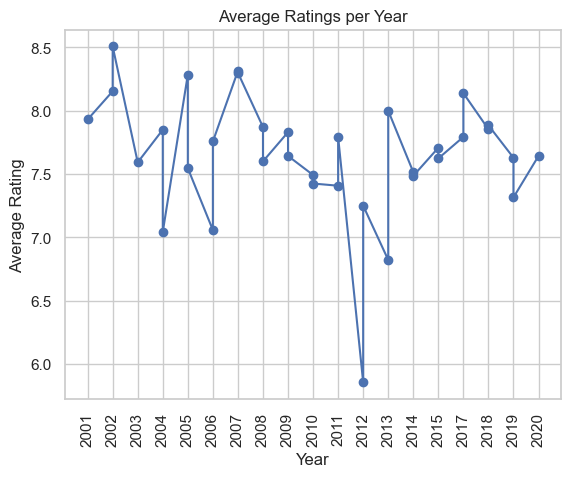

In [286]:

plt.plot(yearly_ratings['Year'], yearly_ratings['Average'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings per Year')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


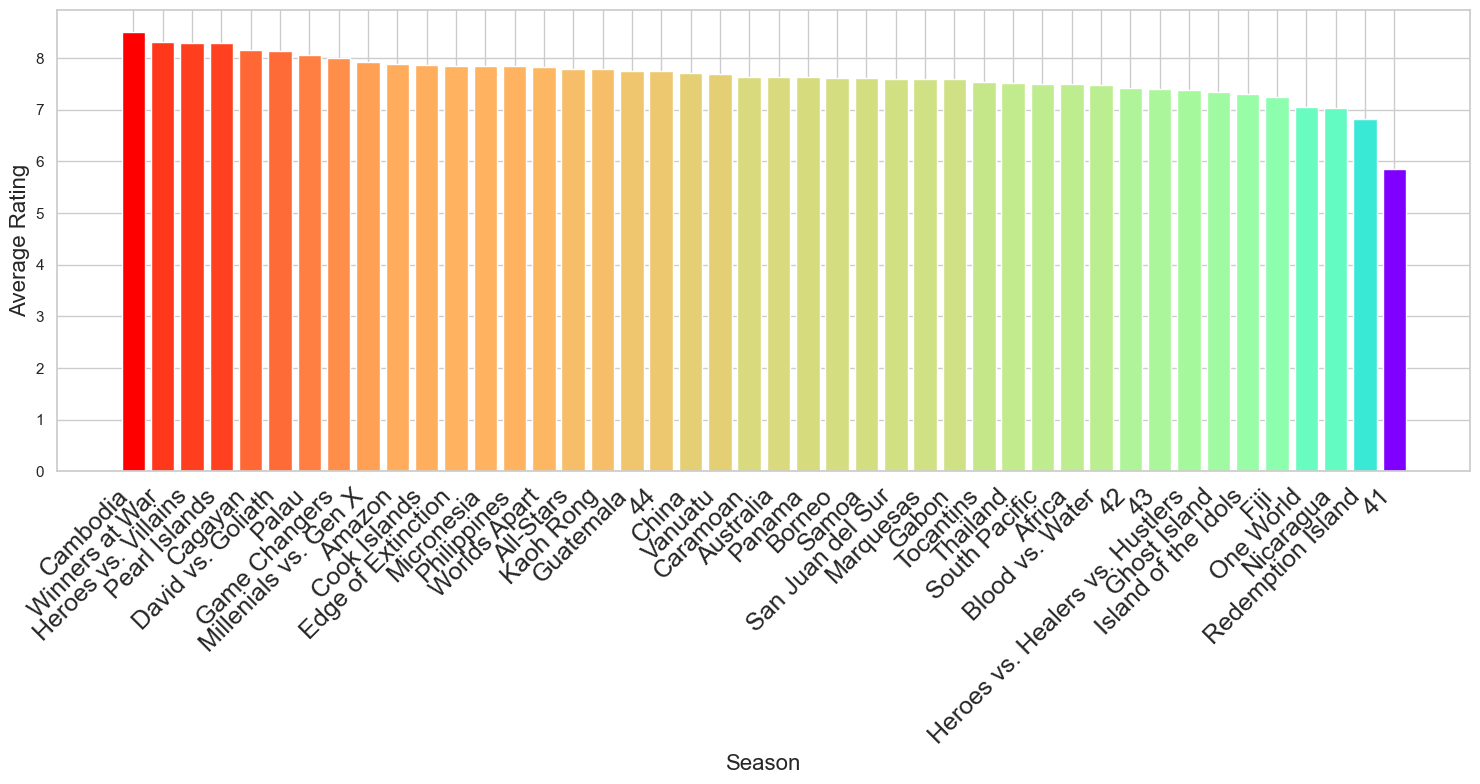

In [287]:
plt.figure(figsize=(15, 8)) 
cmap = plt.get_cmap('rainbow')
normalized_ratings = (x['Average Rating'] - x['Average Rating'].min()) / (x['Average Rating'].max() - x['Average Rating'].min())
bars = plt.bar(x['Season'].astype(str), x['Average Rating'], color=cmap(normalized_ratings))
plt.xlabel('Season', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)
#plt.title('Average Ratings by Season', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=18)  
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
#cbar = plt.colorbar(sm)
#cbar.set_label('Normalized Rating')
plt.tight_layout()  
plt.show()


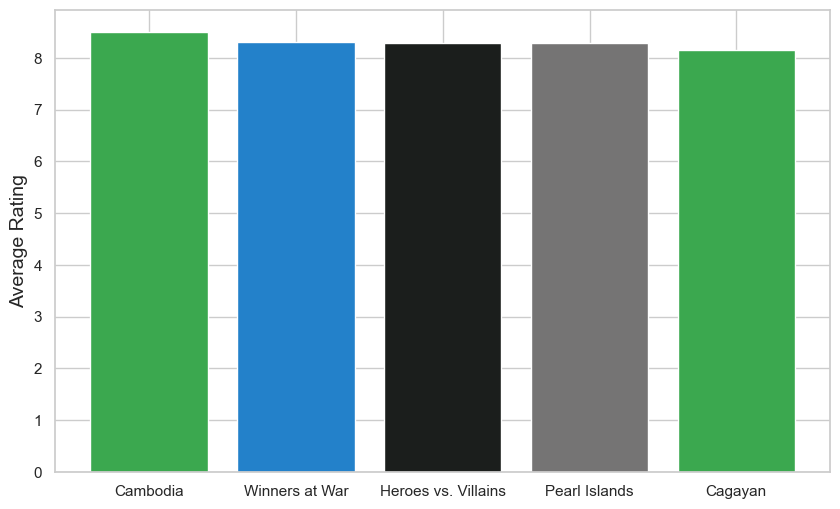

In [288]:
sorted_df = x.sort_values(by='Average Rating', ascending=False)
top_5 = sorted_df.head(5)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(top_5['Season'].astype(str), top_5['Average Rating'], color=colors)

#ax.set_xlabel('Season')
ax.set_ylabel('Average Rating', fontsize=14)
#ax.set_title('Top 5 Average Ratings by Season')

plt.show()



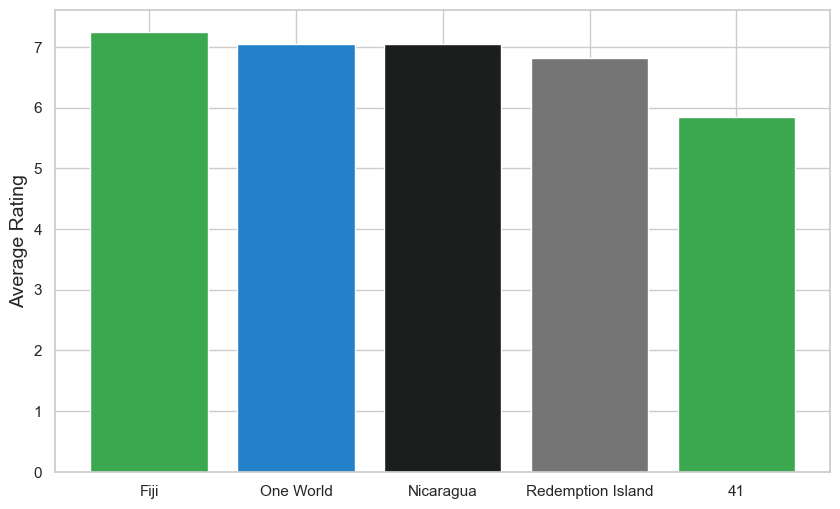

In [289]:
sorted_df = x.sort_values(by='Average Rating', ascending=False)
bottom_5 = sorted_df.tail(5)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(bottom_5['Season'].astype(str), bottom_5['Average Rating'], color=colors)

#ax.set_xlabel('Season')
ax.set_ylabel('Average Rating', fontsize=14)
#ax.set_title('Bottom 5 Average Ratings by Season')

plt.show()


In [290]:
big_boy = pd.concat(all_contestants)
big_boy = big_boy.reset_index(drop=True)
big_boy

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,Switched Tribe,Absorbed Tribe,...,First Switch Tribe,Second Switch Tribe,Main Game Day,Redemption Island Finish,Redemption Island Day,Edge of Extinction Finish,Edge of Extinction Day,No Tribe,Day,Swapped Tribe
0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,Lauren Harpe,31,"Mont Belvieu, Texas",Ratu,Va Va,12th voted out 7th jury member,NaN,Season 44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None[a],Day 24,Ratu
803,Carson Garrett,20,"Atlanta, Georgia",Tika,Va Va,Eliminated 8th jury member,NaN,Season 44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None[a],Day 25,Ratu
804,Carolyn Wiger,35,"Hugo, Minnesota",Tika,Va Va,2nd runner-up,NaN,Season 44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None[a],Day 26,Tika
805,Heidi Lagares-Greenblatt,43,"Pittsburgh, Pennsylvania",Soka,Va Va,Runner-up,NaN,Season 44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None[a],Day 26,Soka


In [291]:
big_boy2 = pd.concat(all_challenge_winners_eliminations)
big_boy2 = big_boy2.reset_index(drop=True)
big_boy2

Episode                                            \
        No.                      Title       Air date   
0         1            "The Marooning"   May 31, 2000   
1         2       "The Generation Gap"   June 7, 2000   
2         3           "Quest for Food"  June 14, 2000   
3         4    "Too Little, Too Late?"  June 21, 2000   
4         5  "Pulling Your Own Weight"  June 28, 2000   
..      ...                        ...            ...   
891      10         "Full Tilt Boogie"    May 3, 2023   
892      11           "I'm Not Worthy"   May 10, 2023   
893      12           "I'm the Bandit"   May 17, 2023   
894      13   "Absolute Banger Season"   May 24, 2023   
895      13   "Absolute Banger Season"   May 24, 2023   

                  Challenge winner(s)                              Eliminated  \
                               Reward                     Immunity      Tribe   
0                              Pagong                       Pagong       Tagi   
1                           Pagong[a]                         Tagi     Pagong   
2                                Tagi                       Pagong       Tagi   
3                                Tagi                         Tagi     Pagong   
4                              Pagong                       Pagong       Tagi   
..                                ...                          ...        ...   
891  Frannie [Carolyn, Heidi, Lauren]                       Carson      Va Va   
892                              None                      Yam Yam      Va Va   
893           Carson, Lauren, Yam Yam                       Lauren      Va Va   
894               Carson [Yam Yam][a]                       Carson      Va Va   
895                              None  Heidi [Carolyn, Yam Yam][b]      Va Va   

                 Season           Episode           ... Voted out         \
      Player            Original air date Title[4]  ...     Tribe Player   
0      Sonja   Season 1               NaN      NaN  ...       NaN    NaN   
1       B.B.   Season 1               NaN      NaN  ...       NaN    NaN   
2     Stacey   Season 1               NaN      NaN  ...       NaN    NaN   
3     Ramona   Season 1               NaN      NaN  ...       NaN    NaN   
4       Dirk   Season 1               NaN      NaN  ...       NaN    NaN   
..       ...        ...               ...      ...  ...       ...    ...   
891  Frannie  Season 44               NaN      NaN  ...       NaN    NaN   
892    Danny  Season 44               NaN      NaN  ...       NaN    NaN   
893    Jaime  Season 44               NaN      NaN  ...       NaN    NaN   
894   Lauren  Season 44               NaN      NaN  ...       NaN    NaN   
895   Carson  Season 44               NaN      NaN  ...       NaN    NaN   

    Redemption Island Exiled Ghost Island        Island of the Idols         \
            Winner(s) Exiled       Player Result              Player Result   
0                 NaN    NaN          NaN    NaN                 NaN    NaN   
1                 NaN    NaN          NaN    NaN                 NaN    NaN   
2                 NaN    NaN          NaN    NaN                 NaN    NaN   
3                 NaN    NaN          NaN    NaN                 NaN    NaN   
4                 NaN    NaN          NaN    NaN                 NaN    NaN   
..                ...    ...          ...    ...                 ...    ...   
891               NaN    NaN          NaN    NaN                 NaN    NaN   
892               NaN    NaN          NaN    NaN                 NaN    NaN   
893               NaN    NaN          NaN    NaN                 NaN    NaN   
894               NaN    NaN          NaN    NaN                 NaN    NaN   
895               NaN    NaN          NaN    NaN                 NaN    NaN   

    Decision game         
           Player Result  
0             NaN    NaN  
1             NaN    NaN  
2             NaN    NaN  
3             NaN    NaN  
4             NaN    NaN  
..

In [292]:
big_boy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   (Episode, No.)                              896 non-null    int64 
 1   (Episode, Title)                            804 non-null    object
 2   (Episode, Air date)                         126 non-null    object
 3   (Challenge winner(s), Reward)               822 non-null    object
 4   (Challenge winner(s), Immunity)             827 non-null    object
 5   (Eliminated, Tribe)                         780 non-null    object
 6   (Eliminated, Player)                        780 non-null    object
 7   (Season, )                                  896 non-null    object
 8   (Episode, Original air date)                770 non-null    object
 9   (Episode, Title[4])                         38 non-null     object
 10  (Unnamed: 7_level_0, Unnam

In [293]:
big_boy2.columns = [f'{col[0]} {col[1]}' if isinstance(col, tuple) else col for col in big_boy2.columns]
big_boy2.reset_index(drop=True, inplace=True)

new_column_names = {
    ('Episode', 'No.'): 'No.',
    ('Episode', 'Title'): 'Title',
    ('Episode', 'Air date'): 'Air Date',
    ('Challenge winner(s)', 'Reward'): 'Challenge winner(s) Reward',
    ('Challenge winner(s)', 'Immunity'): 'Challenge winner(s) Immunity',
    ('Eliminated', 'Tribe'): 'Eliminated Tribe',
    ('Eliminated', 'Player'): 'Eliminated Player',
    ('Season', ): 'Season',
    ('Episode', 'Original air date'): 'Original Air Date',
    ('Episode', 'Title[4]'): 'Episode Title[4]',
    ('Unnamed: 7_level_0', 'Unnamed: 7_level_1'): 'Unnamed: 7_level_0 Unnamed: 7_level_1',
    ('Exile Island', 'Exile Island'): 'Exile Island Exile Island',
    ('Episode', 'Title[9]'): 'Episode Title[9]',
    ('Episode', 'Title[10]'): 'Episode Title[10]',
    ('Episode', 'Title[5]'): 'Episode Title[5]',
    ('Redemption Island', 'Winner'): 'Redemption Island Winner',
    ('Redemption Island', 'Eliminated'): 'Redemption Island Eliminated',
    ('Challenge winner(s)', 'Challenge winner(s)'): 'Challenge winner(s) Challenge winner(s)',
    ('Voted out', 'Tribe'): 'Voted out Tribe',
    ('Voted out', 'Player'): 'Voted out Player',
    ('Redemption Island', 'Winner(s)'): 'Redemption Island Winner(s)',
    ('Exiled', 'Exiled'): 'Exiled Exiled',
    ('Ghost Island', 'Player'): 'Ghost Island Player',
    ('Ghost Island', 'Result'): 'Ghost Island Result',
    ('Island of the Idols', 'Player'): 'Island of the Idols Player',
    ('Island of the Idols', 'Result'): 'Island of the Idols Result',
    ('Decision game', 'Player'): 'Decision game Player',
    ('Decision game', 'Result'): 'Decision game Result'
}

big_boy2.rename(columns=new_column_names, inplace=True)

big_boy2

,Episode No.,Episode Title,Episode Air date,Challenge winner(s) Reward,Challenge winner(s) Immunity,Eliminated Tribe,Eliminated Player,Season,Episode Original air date,Episode Title[4],...,Voted out Tribe,Voted out Player,Redemption Island Winner(s),Exiled Exiled,Ghost Island Player,Ghost Island Result,Island of the Idols Player,Island of the Idols Result,Decision game Player,Decision game Result
0,1,"""The Marooning""","May 31, 2000",Pagong,Pagong,Tagi,Sonja,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"""The Generation Gap""","June 7, 2000",Pagong[a],Tagi,Pagong,B.B.,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"""Quest for Food""","June 14, 2000",Tagi,Pagong,Tagi,Stacey,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"""Too Little, Too Late?""","June 21, 2000",Tagi,Tagi,Pagong,Ramona,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"""Pulling Your Own Weight""","June 28, 2000",Pagong,Pagong,Tagi,Dirk,Season 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,10,"""Full Tilt Boogie""","May 3, 2023","Frannie [Carolyn, Heidi, Lauren]",Carson,Va Va,Frannie,Season 44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,11,"""I'm Not Worthy""","May 10, 2023",None,Yam Yam,Va Va,Danny,Season 44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893,12,"""I'm the Bandit""","May 17, 2023","Carson, Lauren, Yam Yam",Lauren,Va Va,Jaime,Season 44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,13,"""Absolute Banger Season""","May 24, 2023",Carson [Yam Yam][a],Carson,Va Va,Lauren,Season 44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Leaderboard Season 1-42
CSV sourced from 

TrueDorkTimes 
webpage
https://www.truedorktimes.com/survivor/boxscores/data.htm

leaderboard google sheet seasons 1-42 including Glossary
https://docs.google.com/spreadsheets/d/1mZ5nzI4gdUSIcN88zrcYGRwxVJ-QdRyuTj-9iJPfBek/edit?usp=sharing


In [294]:
path_2 = '../data/leaderboard.csv'
leaderboard = pd.read_csv(path_2)

# Glossary 

This analysis will focus on a survivor's 
### Survival Score (SurvSc): 
An approach to an overall success score, while keeping the three major scorable areas: challenges, Tribal Council/voting, and jury. SurvSc is the sum of three ratios, each with a maximum of 1, so a perfect SurvSc score is 3.00. SurvSc = ChW% + TC% + JV%. In practice, an individual player has the most control over TC% and JV%, since ChW% includes tribal wins, but we do what we can.
### Challenge Wins (ChW):
(fractional) Challenge Wins: An individual challenge win counts as 1 point. Participating in a 5-person tribal challenge win counts as 1/5 points (0.2). No points for sitting out. Second-place in a three-tribe ichallenge earns half-credit (0.1 for a five-person second-place finish). 
### Individual Reward Challenge Wins (InRCW): 
Number of individual reward challenges won
### Individual Immunity Challenge Wins (InICW): 
Number of individual ICs won.
### Total individual challenge wins (InChW): 
Sum of individual reward challenge and individual challenge wins, or InChW = InRCW + InICW

In [295]:
merged_df = pd.merge(big_boy, leaderboard[['contestant', 'Sex', 'SurvSc', 'ChW', 'InRCW' , 'InICW', 'InChW', 'VAP', 'TVA']], left_on='Contestant', right_on='contestant', how='left')
merged_df

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,Switched Tribe,Absorbed Tribe,...,Swapped Tribe,contestant,Sex,SurvSc,ChW,InRCW,InICW,InChW,VAP,TVA
0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1,NaN,NaN,...,NaN,Sonja Christopher,F,-0.50,0.00,0.0,0.0,0.0,4.0,1.0
1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1,NaN,NaN,...,NaN,B.B. Andersen,M,-0.11,0.25,0.0,0.0,0.0,6.0,1.0
2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1,NaN,NaN,...,NaN,Stacey Stillman,F,0.22,0.29,0.0,0.0,0.0,6.0,2.0
3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1,NaN,NaN,...,NaN,Ramona Gray,F,0.70,0.39,0.0,0.0,0.0,6.0,2.0
4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1,NaN,NaN,...,NaN,Dirk Been,M,1.01,0.62,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Lauren Harpe,31,"Mont Belvieu, Texas",Ratu,Va Va,12th voted out 7th jury member,NaN,Season 44,NaN,NaN,...,Ratu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,Carson Garrett,20,"Atlanta, Georgia",Tika,Va Va,Eliminated 8th jury member,NaN,Season 44,NaN,NaN,...,Ratu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,Carolyn Wiger,35,"Hugo, Minnesota",Tika,Va Va,2nd runner-up,NaN,Season 44,NaN,NaN,...,Tika,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,Heidi Lagares-Greenblatt,43,"Pittsburgh, Pennsylvania",Soka,Va Va,Runner-up,NaN,Season 44,NaN,NaN,...,Soka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
szn1_szn40 = merged_df.drop(merged_df[(merged_df['Season'] == 'Season 43') | (merged_df['Season'] == 'Season 44')].index)
szn1_szn40 = szn1_szn40.dropna(subset=['contestant'])
szn1_szn40 = szn1_szn40.drop_duplicates(subset=['Contestant', 'Season', 'Placement'])
szn1_szn40

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,Switched Tribe,Absorbed Tribe,...,Swapped Tribe,contestant,Sex,SurvSc,ChW,InRCW,InICW,InChW,VAP,TVA
0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1,NaN,NaN,...,NaN,Sonja Christopher,F,-0.50,0.00,0.0,0.0,0.0,4.0,1.0
1,B.B. Andersen,64,"Mission Hills, Kansas",Pagong,NaN,2nd voted out,Day 6,Season 1,NaN,NaN,...,NaN,B.B. Andersen,M,-0.11,0.25,0.0,0.0,0.0,6.0,1.0
2,Stacey Stillman,27,"San Francisco, California",Tagi,NaN,3rd voted out,Day 9,Season 1,NaN,NaN,...,NaN,Stacey Stillman,F,0.22,0.29,0.0,0.0,0.0,6.0,2.0
3,Ramona Gray,29,"Edison, New Jersey",Pagong,NaN,4th voted out,Day 12,Season 1,NaN,NaN,...,NaN,Ramona Gray,F,0.70,0.39,0.0,0.0,0.0,6.0,2.0
4,Dirk Been,23,"Spring Green, Wisconsin",Tagi,NaN,5th voted out,Day 15,Season 1,NaN,NaN,...,NaN,Dirk Been,M,1.01,0.62,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Ben Driebergen,36,"Boise, Idaho",Sele,Koru,18th voted out 15th jury member,NaN,Season 40,Yara,NaN,...,NaN,Ben Driebergen,M,1.52,1.78,0.0,0.0,0.0,2.0,4.0
1002,Sarah Lacina,34,"Cedar Rapids, Iowa",Dakal,Koru,Eliminated 16th jury member,NaN,Season 40,Yara,NaN,...,NaN,Sarah Lacina,F,0.63,0.83,0.0,0.0,0.0,6.0,1.0
1005,Michele Fitzgerald,29,"Hoboken, New Jersey",Sele,Koru,2nd runner-up,NaN,Season 40,Sele,NaN,...,NaN,Michele Fitzgerald,F,1.76,5.20,1.5,2.0,4.0,2.0,1.0
1007,Natalie Anderson,33,"Edgewater, New Jersey",Sele,Koru,Runner-up,NaN,Season 40,None[d],NaN,...,NaN,Natalie Anderson,F,1.62,3.07,1.0,1.0,2.0,0.0,0.0


In [297]:
szn1_szn40['Age'] = szn1_szn40['Age'].astype(int)

In [298]:
avg_age = szn1_szn40['Age'].mean().round(0)
avg_age

33.0

In [299]:
szn1_szn40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 0 to 1009
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Contestant                 622 non-null    object 
 1   Age                        622 non-null    int32  
 2   From                       622 non-null    object 
 3   Original Tribe             622 non-null    object 
 4   Merged Tribe               365 non-null    object 
 5   Placement                  622 non-null    object 
 6   Finish Day                 540 non-null    object 
 7   Season                     622 non-null    object 
 8   Switched Tribe             312 non-null    object 
 9   Absorbed Tribe             17 non-null     object 
 10  Post-mutiny                9 non-null      object 
 11  First Switch Tribe         63 non-null     object 
 12  Second Switch Tribe        50 non-null     object 
 13  Main Game Day              82 non-null     object

## Gender 

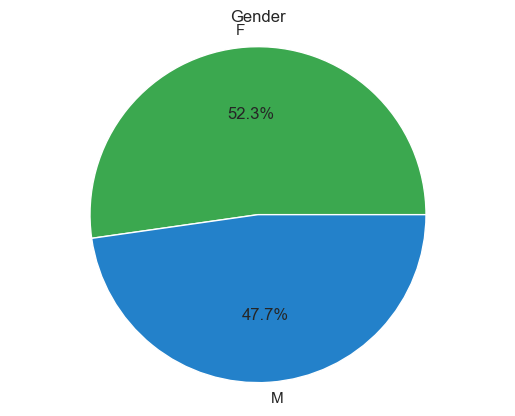

In [300]:
sex_counts = szn1_szn40['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Gender')
plt.show()

## Overall Challenge Wins by Gender

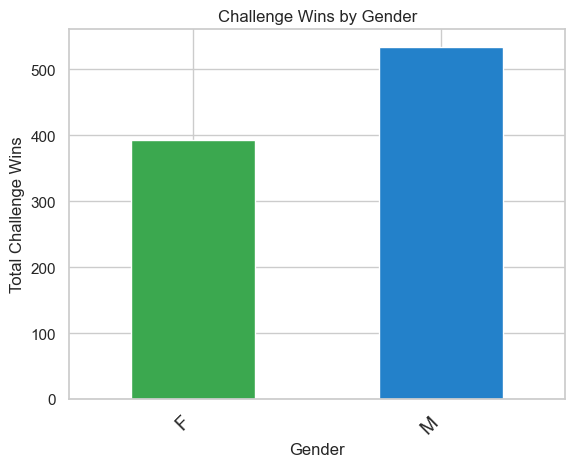

In [301]:
ChW_sex = szn1_szn40.groupby('Sex')['ChW'].sum()
ChW_sex
ChW_sex.plot.bar(color=colors)
plt.xlabel('Gender')
plt.ylabel('Total Challenge Wins')
plt.title('Challenge Wins by Gender')
plt.xticks(rotation=45, ha='right', fontsize=14)  
plt.show()

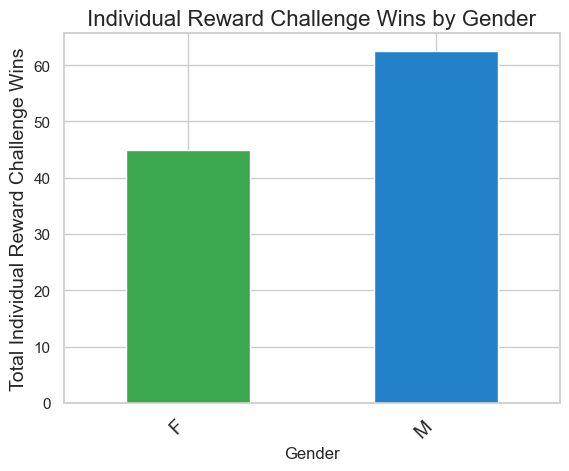

In [302]:
InRCW_sex = szn1_szn40.groupby('Sex')['InRCW'].sum()
InRCW_sex
InRCW_sex.plot.bar(color=colors)
plt.xlabel('Gender')
plt.ylabel('Total Individual Reward Challenge Wins', fontsize=14)
plt.title('Individual Reward Challenge Wins by Gender', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)  
plt.show()

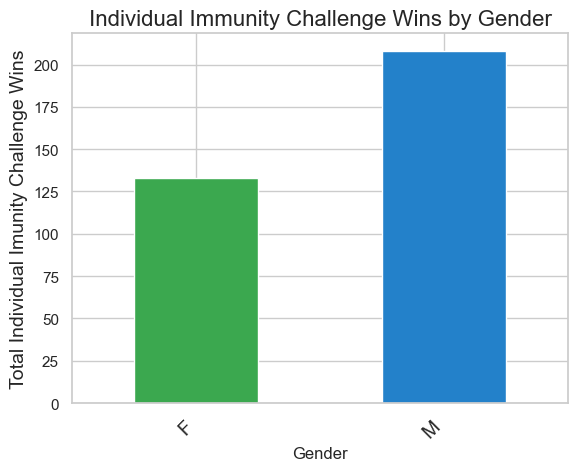

In [303]:
InICW_sex = szn1_szn40.groupby('Sex')['InICW'].sum()
InICW_sex
InICW_sex.plot.bar(color=colors)
plt.xlabel('Gender')
plt.ylabel('Total Individual Imunity Challenge Wins', fontsize=14)
plt.title('Individual Immunity Challenge Wins by Gender', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)  
plt.show()

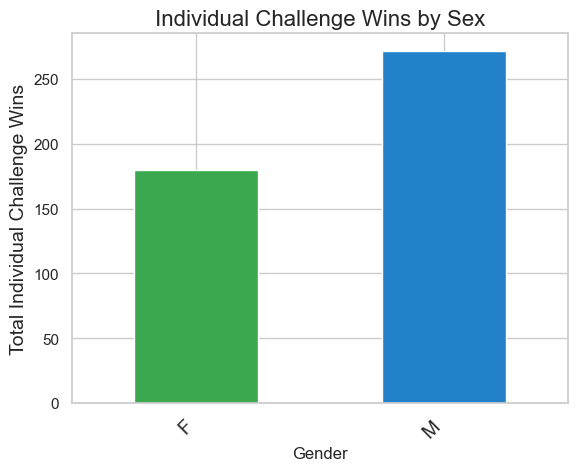

In [304]:
InChW_sex = szn1_szn40.groupby('Sex')['InChW'].sum()
InChW_sex
InChW_sex.plot.bar(color=colors)
plt.xlabel('Gender')
plt.ylabel('Total Individual Challenge Wins', fontsize=14)
plt.title('Individual Challenge Wins by Sex', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)  
plt.show()

## Survivor Score by Gender

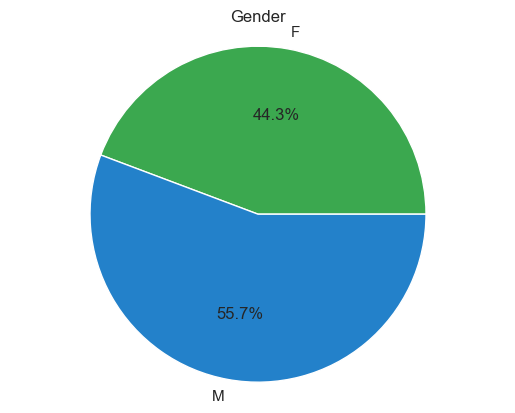

In [305]:
SurvSc_sex = szn1_szn40.groupby('Sex')['SurvSc'].mean()
plt.pie(SurvSc_sex, labels=SurvSc_sex.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Gender')
plt.show()

## Voted out first by gender

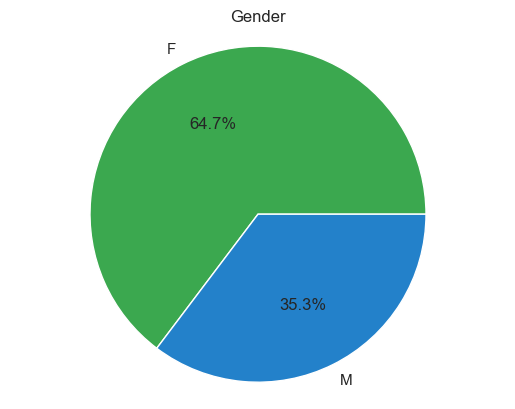

In [306]:
first_voted_out_sex = szn1_szn40[szn1_szn40['Placement'] == '1st voted out'].groupby('Sex').size()
plt.pie(first_voted_out_sex, labels=first_voted_out_sex.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Gender')
plt.show()

## Ratings Over Time

In [307]:
ratings_df.head()

,Season,Timeslot (ET),Premiered Date,Premiere viewers (in millions),Ended Date,Finale viewers (in millions),Reunion viewers (in millions),TV season,Rank,Viewers (in millions),Year
0,1,Wednesday 8:00 pm,"May 31, 2000",15.51,"August 23, 2000",51.69[33],36.70[34],1999–2000,2,28.30,2000
1,2,Thursday 8:00 pm,"January 28, 2001",45.37,"May 3, 2001",36.35,28.01,2000–01,1,29.80,2001
2,3,Thursday 8:00 pm,"October 11, 2001",23.84,"January 10, 2002",27.26,19.05,2001–02,8,20.69,2001
3,4,Thursday 8:00 pm,"February 28, 2002",23.19,"May 19, 2002",25.87,17.89,2001–02,6,20.77,2002
4,5,Thursday 8:00 pm,"September 19, 2002",23.05,"December 19, 2002",24.08,20.43,2002–03,4,21.21,2002


In [308]:
ratings_df.info()
ratings_df['Viewers (in millions)'] = ratings_df['Viewers (in millions)'].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Season                          44 non-null     int64 
 1   Timeslot (ET)                   44 non-null     object
 2   Premiered Date                  44 non-null     object
 3   Premiere viewers (in millions)  44 non-null     object
 4   Ended Date                      44 non-null     object
 5   Finale viewers (in millions)    44 non-null     object
 6   Reunion viewers (in millions)   44 non-null     object
 7   TV season                       44 non-null     object
 8   Rank                            42 non-null     object
 9   Viewers (in millions)           44 non-null     object
 10  Year                            44 non-null     object
dtypes: int64(1), object(10)
memory usage: 3.9+ KB


In [309]:
viewership_by_year = ratings_df.groupby('Year')['Viewers (in millions)'].sum()
viewership_by_year = pd.DataFrame({'Year': viewership_by_year.index, 'Viewers (in millions)': viewership_by_year.values})
viewership_by_year = viewership_by_year.iloc[:-1]
viewership_by_year

,Year,Viewers (in millions)
0,2000,28.30
1,2001,50.49
2,2002,41.98
3,2003,40.69
4,2004,41.13
5,2005,39.21
6,2006,32.57
7,2007,30.01
8,2008,27.42
9,2009,25.20


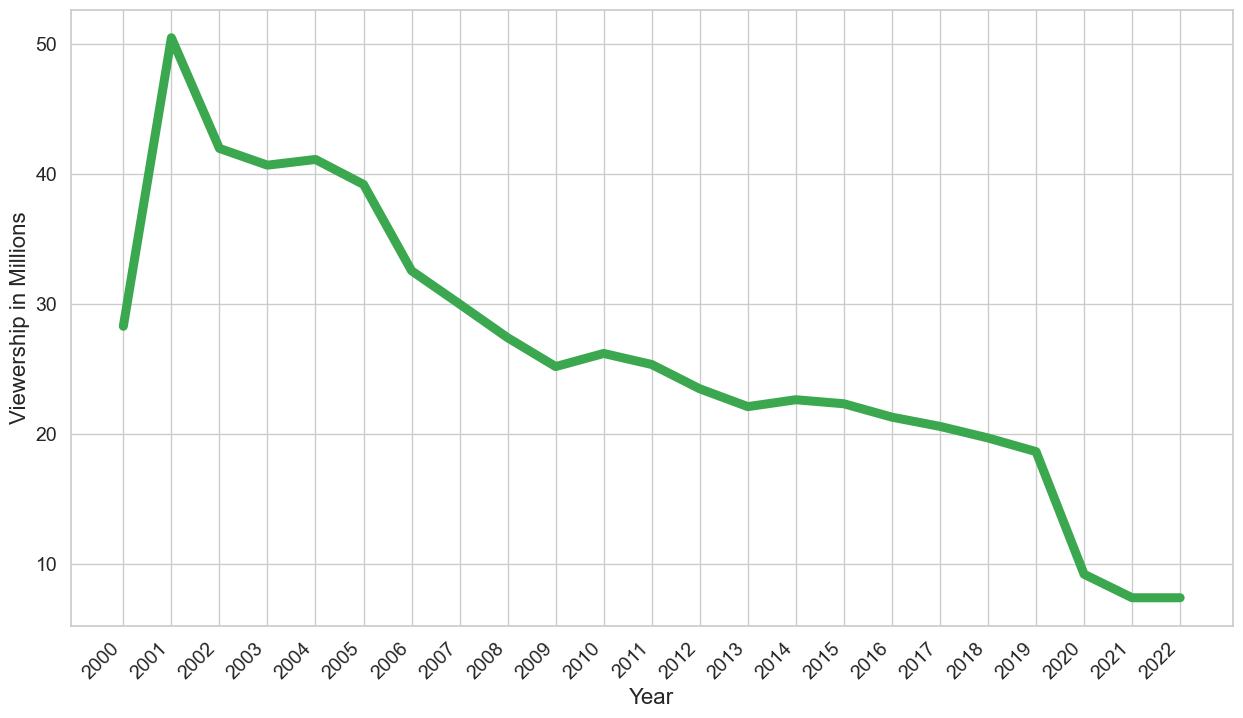

In [310]:
plt.figure(figsize=(15,8))
plt.plot(viewership_by_year['Year'], viewership_by_year['Viewers (in millions)'], linewidth=6.5, color='#3ba84f')
colors2 = ['#c54e11', '#201311', '#691710', '#e8a127', '#cabba7']
plt.xlabel('Year', fontsize=16)
plt.ylabel('Viewership in Millions', fontsize=16)
#plt.title('Yearly Viewership in Millions', fontsize=18)
plt.xticks(rotation=45, ha= 'right', fontsize=14)
plt.yticks(fontsize=14)

plt.show()

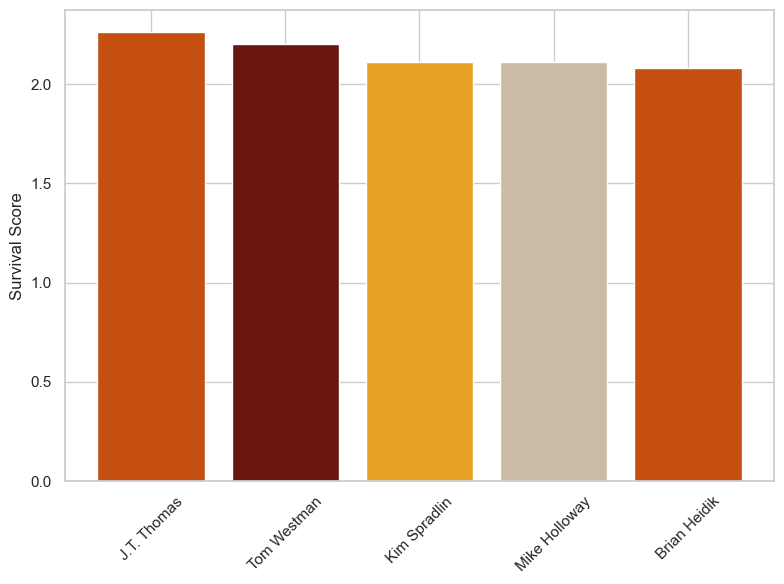

In [311]:
top_5 = szn1_szn40.nlargest(6, 'SurvSc')
bottom_5 = szn1_szn40.nsmallest(6, 'SurvSc')

#print("Top 5 SurvSc:")
#print(top_5[['Contestant', 'SurvSc']])

#print("\nBottom 5 SurvSc:")
#print(bottom_5[['Contestant', 'SurvSc']])

top_5 = top_5[['Contestant', 'SurvSc']]
plt.figure(figsize=(8, 6))
plt.bar(top_5['Contestant'], top_5['SurvSc'], color=colors2)
plt.ylabel('Survival Score')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [312]:
InICW_avg = szn1_szn40['InICW'].mean().round(2)
print('The average individual immunity challenges won is:',InICW_avg)

The average individual immunity challenges won is: 0.55


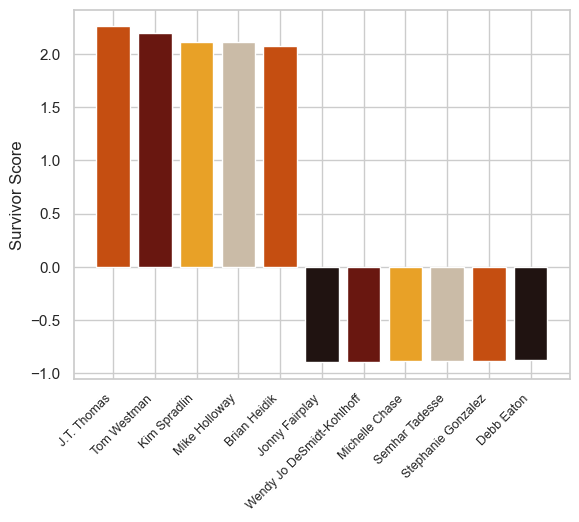

In [313]:
top_bottom_df = pd.concat([top_5, bottom_5])
sns.set(style='whitegrid')
plt.bar(top_bottom_df['Contestant'], top_bottom_df['SurvSc'], color=colors2)
#plt.xlabel('Contestant')
plt.ylabel('Survivor Score')
#plt.title('Top 5 and Bottom 5 Survivor Score by Contestant')
plt.xticks(rotation=45, ha ='right', fontsize=9)

plt.show()

# Sole Survivors


In [314]:
sole_survivors = szn1_szn40[szn1_szn40['Placement'] == 'Sole Survivor']
sole_survivors = sole_survivors.drop_duplicates(subset=['Contestant', 'Season', 'Placement'])
sole_survivors


,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,Switched Tribe,Absorbed Tribe,...,Swapped Tribe,contestant,Sex,SurvSc,ChW,InRCW,InICW,InChW,VAP,TVA
19,Richard Hatch,39,"Newport, Rhode Island",Tagi,Rattana,Sole Survivor,Day 39,Season 1,NaN,NaN,...,NaN,Richard Hatch,M,1.59,1.87,0.0,1.0,1.0,6.0,4.0
44,Tina Wesson,40,"Knoxville, Tennessee",Ogakor,Barramundi,Sole Survivor,Day 42,Season 2,NaN,NaN,...,NaN,Tina Wesson,F,1.62,0.59,0.0,0.0,0.0,0.0,7.0
62,Ethan Zohn,27,"New York City, New York",Boran,Moto Maji,Sole Survivor,Day 39,Season 3,Boran,NaN,...,NaN,Ethan Zohn,M,1.93,2.87,1.0,1.0,2.0,0.0,2.0
81,Vecepia Towery,36,"Hayward, California",Maraamu,Soliantu,Sole Survivor,Day 39,Season 4,Rotu,NaN,...,NaN,Vecepia Towery,F,1.50,2.45,0.0,2.0,2.0,2.0,2.0
98,Brian Heidik,34,"Quartz Hill, California",Chuay Gahn,Chuay Jai,Sole Survivor,Day 39,Season 5,NaN,NaN,...,NaN,Brian Heidik,M,2.08,6.18,2.0,3.0,5.0,0.0,5.0
115,Jenna Morasca,21,"Bridgeville, Pennsylvania",Jaburu,Jacaré,Sole Survivor,Day 39,Season 6,Jaburu,NaN,...,NaN,Jenna Morasca,F,2.02,4.72,0.0,4.0,4.0,3.0,4.0
137,Sandra Diaz-Twine,29,"Fort Lewis, Washington",Drake,Balboa,Sole Survivor,Day 39,Season 7,NaN,NaN,...,NaN,Sandra Diaz-Twine,F,1.48,0.69,0.0,0.0,0.0,1.0,2.0
174,Amber Brkich,25,"Beaver, Pennsylvania",Chapera,Chaboga Mogo,Sole Survivor,Day 39,Season 8,Chapera,Chapera,...,NaN,Amber Brkich,F,0.68,0.59,0.0,0.0,0.0,6.0,8.0
195,Chris Daugherty,33,"South Vienna, Ohio",Lopevi,Alinta,Sole Survivor,Day 39,Season 9,Lopevi,NaN,...,NaN,Chris Daugherty,M,1.86,4.82,0.0,3.0,3.0,3.0,5.0
218,Tom Westman,40,"Sayville, New York",Koror,NaN,Sole Survivor,Day 39,Season 10,NaN,Koror,...,NaN,Tom Westman,M,2.20,6.66,0.0,5.0,5.0,0.0,0.0


In [315]:
# InICW = individual immunity challenge wins where each win = 1 pt
InICW_ss = sole_survivors.sort_values(by='InICW', ascending=False)
top_5_ss = InICW_ss.head(5)

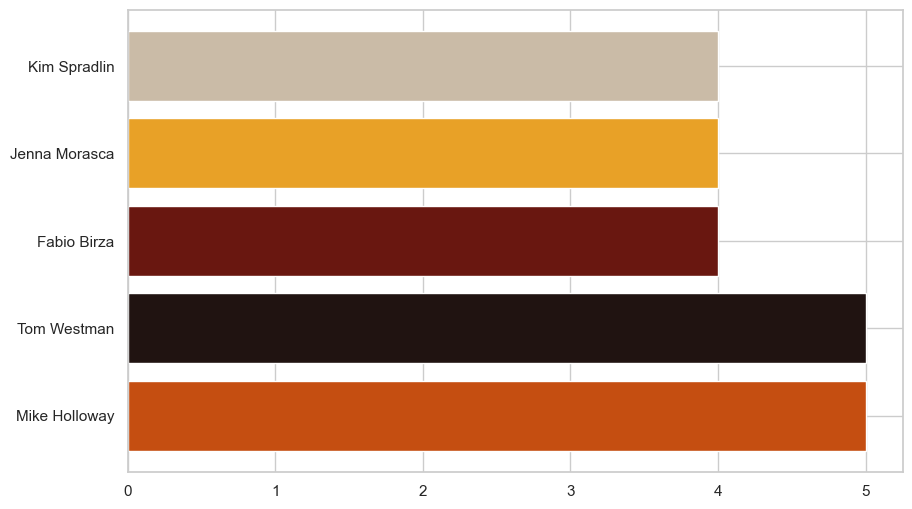

In [316]:
# top 5 survivors individual immunity challenge wins
colors2 = ['#c54e11', '#201311', '#691710', '#e8a127', '#cabba7']

plt.figure(figsize=(10, 6))
plt.barh(top_5_ss['Contestant'], top_5_ss['InICW'], color=colors2)

plt.show()


In [317]:
mh = sole_survivors.loc[sole_survivors['Contestant'] == "Mike Holloway"]
mh_stats = mh[['SurvSc', 'ChW', 'InRCW', 'InICW', 'VAP', 'TVA']]
mh_stats

,SurvSc,ChW,InRCW,InICW,VAP,TVA
727,2.11,7.54,1.0,5.0,0.0,1.0


In [318]:
tw = sole_survivors.loc[sole_survivors['Contestant'] == "Tom Westman"]
tw_stats = tw[['SurvSc', 'ChW', 'InRCW', 'InICW', 'VAP', 'TVA']]
tw_stats

,SurvSc,ChW,InRCW,InICW,VAP,TVA
218,2.2,6.66,0.0,5.0,0.0,0.0


In [319]:
jt = sole_survivors.loc[sole_survivors['Contestant'] == "J.T. Thomas"]
jt_stats = jt[['SurvSc', 'ChW', 'InRCW', 'InICW', 'VAP', 'TVA']]
jt_stats

,SurvSc,ChW,InRCW,InICW,VAP,TVA
400,2.26,5.38,1.0,3.0,0.0,0.0


In [320]:
sole_survivors_average_age = sole_survivors['Age'].mean()

print("Average Age of a Sole Survivor:", sole_survivors_average_age)

Average Age of a Sole Survivor: 31.25


In [321]:
gender_counts = sole_survivors['Sex'].value_counts()

print("Number of Female Sole Survivors:", gender_counts['F'])
print("Number of Male Sole Survivors:", gender_counts['M'])

Number of Female Sole Survivors: 15
Number of Male Sole Survivors: 25


In [322]:
vap_ss = sole_survivors[['Contestant', 'VAP', 'TVA']]
vap_ss = vap_ss.sort_values(by='VAP', ascending=False)
column_rename = {
    'VAP': 'Votes Against Player',
    'TVA': 'Times Voted Against'
}
vap_ss = vap_ss.rename(columns=column_rename)
vap_ss = vap_ss.head(5)
vap_ss

,Contestant,Votes Against Player,Times Voted Against
620,John Cochran,13.0,7.0
258,Aras Baskauskas,9.0,6.0
19,Richard Hatch,6.0,4.0
863,Sarah Lacina,6.0,1.0
818,Adam Klein,6.0,5.0


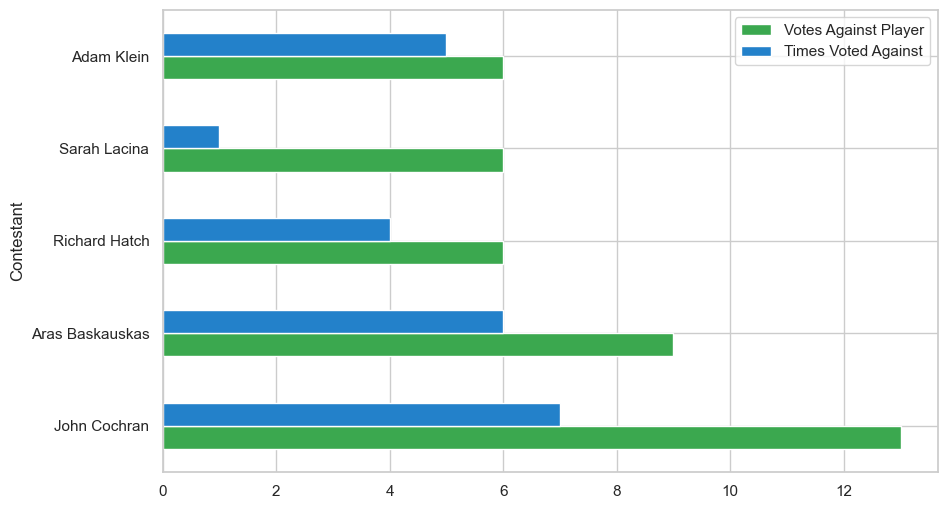

In [323]:
vap_ss.plot.barh(x='Contestant', y=['Votes Against Player', 'Times Voted Against'], figsize=(10, 6), color=colors)
plt.show()

In [324]:
idols_path = '../data/idols_found.xlsx'

idols_df = pd.read_excel(idols_path)
idols_df.fillna(0, inplace=True)
idols_df

,Contestant,M?,F?,Season,Idols found,Idols held,Idols played,Votes voided,Boot avoided,Tie avoided,Day found,Day played,Notes
0,Gary Hogeboom,1.0,0.0,S11,1.0,1,1.0,0.0,0.0,0.0,24.0,0.0,"(*Played before vote, couldn't be voted against)"
1,Terry Deitz,1.0,0.0,S12,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,"(*Super idol, found on Exile Island)"
2,Yul Kwon,1.0,0.0,S13,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,"(*Super idol, found on Exile Island)"
3,Yau-Man Chan,1.0,0.0,S14,1.0,1,1.0,4.0,1.0,0.0,17.0,36.0,"No vote split; Yau-Man saves himself, Stacy bo..."
4,Mookie Lee,1.0,0.0,S14,1.0,1,0.0,0.0,0.0,0.0,20.0,0.0,Found at Moto camp; given to Alex at F9 Tribal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Danny Massa,1.0,0.0,S44,1.0,1,1.0,6.0,1.0,0.0,4.0,15.0,"Found idol key on Day 4, immediately opened ca..."
175,Josh Wilder,1.0,0.0,S44,1.0,1,1.0,2.0,0.0,1.0,8.0,9.0,"Pre-merge idol, acquired at the swap journey. ..."
176,Jaime Ruiz,0.0,1.0,S44,1.0,1,0.0,0.0,0.0,0.0,8.0,0.0,"Pre-merge idol, acquired at the swap journey. ..."
177,Carson Garrett,1.0,0.0,S44,1.0,1,0.0,0.0,0.0,0.0,8.0,0.0,"Pre-merge idol, acquired at the swap journey. ..."


In [325]:
# ss_idols = sole survivor idols
ss_idols = pd.merge(sole_survivors, idols_df, on='Contestant', how='inner')
ss_idols


,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season_x,Switched Tribe,Absorbed Tribe,...,Season_y,Idols found,Idols held,Idols played,Votes voided,Boot avoided,Tie avoided,Day found,Day played,Notes
0,Tom Westman,40,"Sayville, New York",Koror,NaN,Sole Survivor,Day 39,Season 10,NaN,Koror,...,S20,1.0,1,1.0,3.0,0.0,1.0,10.0,11.0,Would have been a tie; Cirie booted from vote-...
1,Yul Kwon,31,"San Mateo, California",Puka Puka,Aitutonga,Sole Survivor,Day 39,Season 13,Aitutaki,NaN,...,S13,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,"(*Super idol, found on Exile Island)"
2,Earl Cole,35,"Santa Monica, California",Ravu,Bula Bula,Sole Survivor,Day 39,Season 14,Moto,NaN,...,S14,1.0,1,1.0,0.0,0.0,0.0,36.0,37.0,Found using Yau-Man and Earl's clues; played a...
3,Todd Herzog,22,"Pleasant Grove, Utah",Fei Long,Hae Da Fung,Sole Survivor,Day 39,Season 15,Fei Long,NaN,...,S15,1.0,1,0.0,0.0,0.0,0.0,17.0,0.0,"Frosti, Amanda present when Todd pries it off ..."
4,Parvati Shallow,25,"Los Angeles, California",Malakal,Dabu,Sole Survivor,Day 39,Season 16,Airai,NaN,...,S16,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,(not shown in the show)
5,Sophie Clarke,21,"Willsboro, New York",Upolu,Te Tuna,Sole Survivor,NaN,Season 23,NaN,NaN,...,S40,1.0,1,0.0,0.0,0.0,0.0,12.0,0.0,"Full idol, found at Yara camp. Blindsided with..."
6,Kim Spradlin,29,"San Antonio, Texas",Salani,Tikiano,Sole Survivor,Day 39,Season 24,Salani,NaN,...,S24,1.0,1,0.0,0.0,0.0,0.0,14.0,0.0,Never played
7,Kim Spradlin,29,"San Antonio, Texas",Salani,Tikiano,Sole Survivor,Day 39,Season 24,Salani,NaN,...,S40,1.0,1,1.0,2.0,0.0,0.0,4.0,25.0,Half-idol; half given to Sophie (returned). Pl...
8,Denise Stapley,41,"Cedar Rapids, Iowa",Matsing,Dangrayne,Sole Survivor,Day 39,Season 25,Kalabaw,NaN,...,S25,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(Co-found with Malcolm, he kept it)"
9,Tony Vlachos,39,"Jersey City, New Jersey",Aparri,Solarrion,Sole Survivor,Day 39,Season 28,Solana,NaN,...,S40,1.0,1,1.0,0.0,0.0,0.0,28.0,36.0,"Found in camp, the day after Kim played hers"


In [326]:
filtered_ssidols_df = ss_idols[(ss_idols['Idols found'] > 0) & (ss_idols['Idols played'] > 0)]

# Get the count of contestants who found and played idols
num_played_idols = len(filtered_ssidols_df)

# Print the result
print("Number of sole survivors who found and played idols:", num_played_idols)


Number of sole survivors who found and played idols: 11


In [327]:
avg_ss_InICW = sole_survivors['InICW'].mean()
avg_ss_InICW

1.475

In [328]:
losers = szn1_szn40[szn1_szn40['Placement'] == '1st voted out']
losers = losers.drop_duplicates(subset=['Contestant', 'Season', 'Placement'])
losers

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,Switched Tribe,Absorbed Tribe,...,Swapped Tribe,contestant,Sex,SurvSc,ChW,InRCW,InICW,InChW,VAP,TVA
0,Sonja Christopher,63,"Walnut Creek, California",Tagi,NaN,1st voted out,Day 3,Season 1,NaN,NaN,...,NaN,Sonja Christopher,F,-0.50,0.00,0.0,0.0,0.0,4.0,1.0
21,Debb Eaton,45,"Milan, New Hampshire",Kucha,NaN,1st voted out,Day 3,Season 2,NaN,NaN,...,NaN,Debb Eaton,F,-0.88,0.00,0.0,0.0,0.0,7.0,1.0
47,Diane Ogden,42,"Lincoln, Nebraska",Boran,NaN,1st voted out,Day 3,Season 3,NaN,NaN,...,NaN,Diane Ogden,F,-0.75,0.00,0.0,0.0,0.0,6.0,1.0
65,Peter Harkey,44,"Millis, Massachusetts",Maraamu,NaN,1st voted out,Day 3,Season 4,NaN,NaN,...,NaN,Peter Harkey,M,-0.63,0.00,0.0,0.0,0.0,5.0,1.0
82,John Raymond,40,"Slidell, Louisiana",Chuay Gahn,NaN,1st voted out,Day 3,Season 5,NaN,NaN,...,NaN,John Raymond,M,-0.75,0.00,0.0,0.0,0.0,6.0,1.0
99,Ryan Aiken,23,"Ellicott City, Maryland",Tambaqui,NaN,1st voted out,Day 3,Season 6,NaN,NaN,...,NaN,Ryan Aiken,M,-0.50,0.00,0.0,0.0,0.0,4.0,-6.0
116,Nicole Delma,24,"Hermosa Beach, California",Morgan,NaN,1st voted out,Day 3,Season 7,Outcasts,NaN,...,NaN,Nicole Delma,F,-0.30,0.17,0.0,0.0,0.0,7.0,1.0
141,Tina Wesson,42,"Knoxville, Tennessee",Saboga,NaN,1st voted out,Day 3,Season 8,NaN,NaN,...,NaN,Tina Wesson,F,1.62,0.59,0.0,0.0,0.0,0.0,7.0
176,Brook Geraghty,27,"Winthrop, Massachusetts",Lopevi,NaN,1st voted out,Day 3,Season 9,NaN,NaN,...,NaN,Brook Geraghty,M,-0.56,0.00,0.0,0.0,0.0,5.0,1.0
198,Jolanda Jones,38,"Houston, Texas",Ulong,NaN,1st voted out,Day 3,Season 10,NaN,NaN,...,NaN,Jolanda Jones,F,0.23,1.00,0.0,1.0,1.0,6.0,1.0


In [329]:
sole_survivors.head()

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season,Switched Tribe,Absorbed Tribe,...,Swapped Tribe,contestant,Sex,SurvSc,ChW,InRCW,InICW,InChW,VAP,TVA
19,Richard Hatch,39,"Newport, Rhode Island",Tagi,Rattana,Sole Survivor,Day 39,Season 1,NaN,NaN,...,NaN,Richard Hatch,M,1.59,1.87,0.0,1.0,1.0,6.0,4.0
44,Tina Wesson,40,"Knoxville, Tennessee",Ogakor,Barramundi,Sole Survivor,Day 42,Season 2,NaN,NaN,...,NaN,Tina Wesson,F,1.62,0.59,0.0,0.0,0.0,0.0,7.0
62,Ethan Zohn,27,"New York City, New York",Boran,Moto Maji,Sole Survivor,Day 39,Season 3,Boran,NaN,...,NaN,Ethan Zohn,M,1.93,2.87,1.0,1.0,2.0,0.0,2.0
81,Vecepia Towery,36,"Hayward, California",Maraamu,Soliantu,Sole Survivor,Day 39,Season 4,Rotu,NaN,...,NaN,Vecepia Towery,F,1.50,2.45,0.0,2.0,2.0,2.0,2.0
98,Brian Heidik,34,"Quartz Hill, California",Chuay Gahn,Chuay Jai,Sole Survivor,Day 39,Season 5,NaN,NaN,...,NaN,Brian Heidik,M,2.08,6.18,2.0,3.0,5.0,0.0,5.0


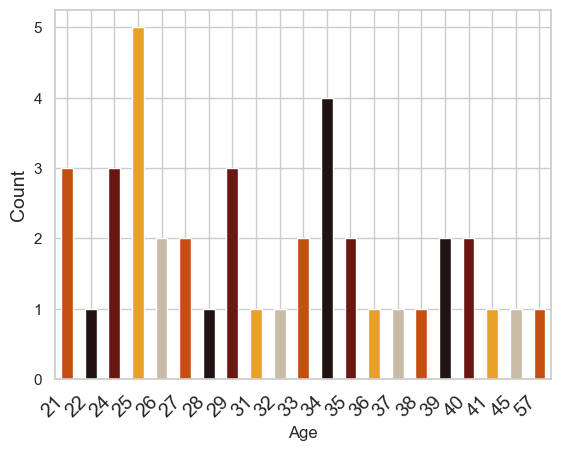

In [330]:
avg_age = sole_survivors.groupby('Age')['Contestant'].count()
avg_age.plot.bar(color=colors2)
plt.xlabel('Age')
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)  
plt.show()

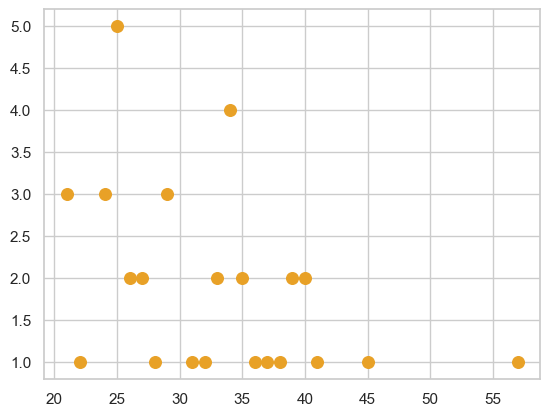

In [331]:
avg_age = sole_survivors.groupby('Age')['Contestant'].count()
plt.scatter(avg_age.index, avg_age.values, color='#e8a127', s=70)
plt.show()


In [332]:
colors2


['#c54e11', '#201311', '#691710', '#e8a127', '#cabba7']

In [333]:
ss_idols.head()

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season_x,Switched Tribe,Absorbed Tribe,...,Season_y,Idols found,Idols held,Idols played,Votes voided,Boot avoided,Tie avoided,Day found,Day played,Notes
0,Tom Westman,40,"Sayville, New York",Koror,NaN,Sole Survivor,Day 39,Season 10,NaN,Koror,...,S20,1.0,1,1.0,3.0,0.0,1.0,10.0,11.0,Would have been a tie; Cirie booted from vote-...
1,Yul Kwon,31,"San Mateo, California",Puka Puka,Aitutonga,Sole Survivor,Day 39,Season 13,Aitutaki,NaN,...,S13,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,"(*Super idol, found on Exile Island)"
2,Earl Cole,35,"Santa Monica, California",Ravu,Bula Bula,Sole Survivor,Day 39,Season 14,Moto,NaN,...,S14,1.0,1,1.0,0.0,0.0,0.0,36.0,37.0,Found using Yau-Man and Earl's clues; played a...
3,Todd Herzog,22,"Pleasant Grove, Utah",Fei Long,Hae Da Fung,Sole Survivor,Day 39,Season 15,Fei Long,NaN,...,S15,1.0,1,0.0,0.0,0.0,0.0,17.0,0.0,"Frosti, Amanda present when Todd pries it off ..."
4,Parvati Shallow,25,"Los Angeles, California",Malakal,Dabu,Sole Survivor,Day 39,Season 16,Airai,NaN,...,S16,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,(not shown in the show)


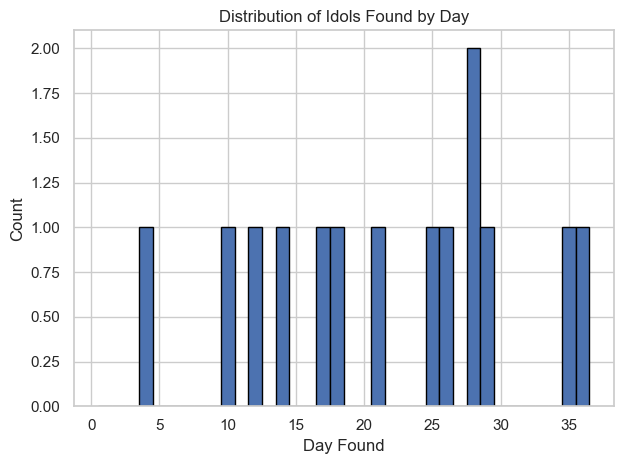

In [334]:
day_found = ss_idols['Day found'].astype(int) 
fig, ax = plt.subplots()
ax.hist(day_found, bins=range(1, max(day_found) + 2), align='left', edgecolor='black')
ax.set_xlabel('Day Found')
ax.set_ylabel('Count')
ax.set_title('Distribution of Idols Found by Day')
plt.tight_layout()
plt.show()


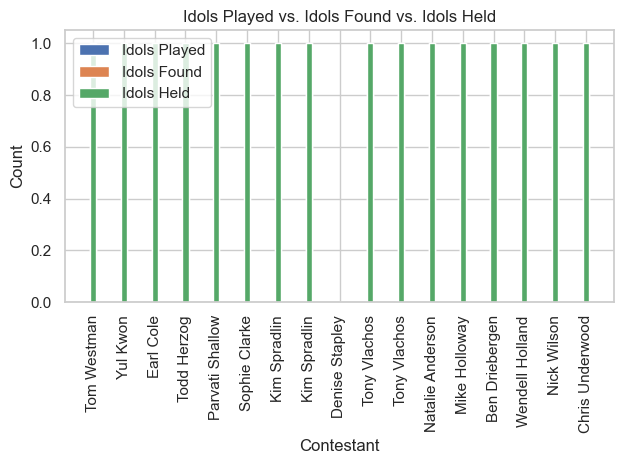

In [335]:

idols_played = ss_idols['Idols played']
idols_found = ss_idols['Idols found']
idols_held = ss_idols['Idols held']

# Rest of the code remains the same
fig, ax = plt.subplots()
width = 0.2
x = range(len(ss_idols))
ax.bar(x, idols_played, width, label='Idols Played')
ax.bar(x, idols_found, width, label='Idols Found')
ax.bar(x, idols_held, width, label='Idols Held')

# Customize the plot
ax.set_xlabel('Contestant')
ax.set_ylabel('Count')
ax.set_title('Idols Played vs. Idols Found vs. Idols Held')
ax.set_xticks(x)
ax.set_xticklabels(ss_idols['Contestant'], rotation=90)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()





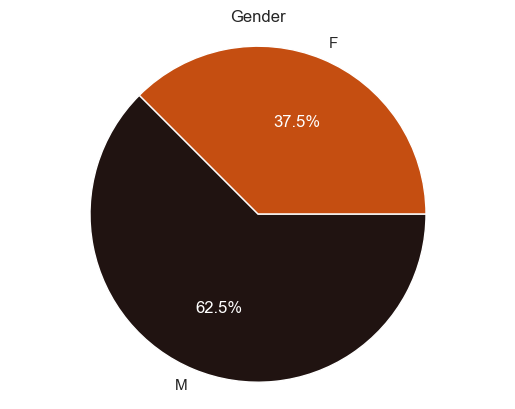

In [341]:
gender = sole_survivors.groupby('Sex')['Contestant'].count()
_, _, autotexts = plt.pie(gender, labels=gender.index, autopct='%1.1f%%', colors=colors2)
plt.axis('equal')
plt.title('Gender')

# Set properties for the text elements
plt.setp(autotexts, size=12, color='white')
plt.show()

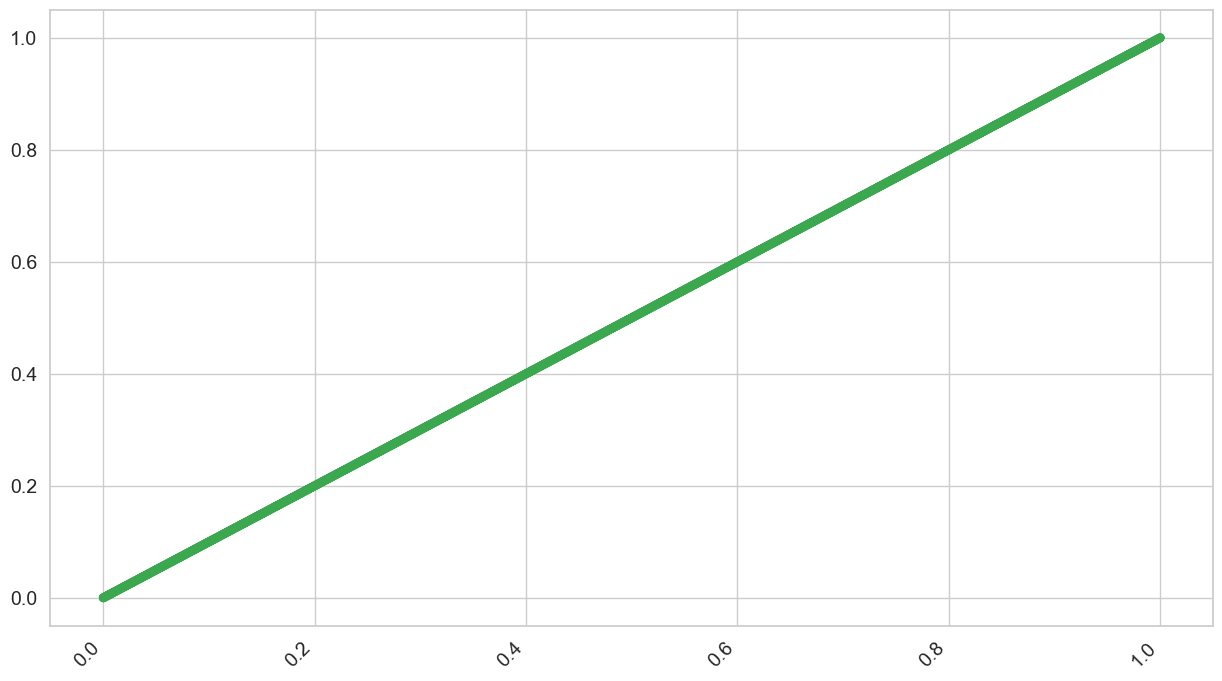

In [337]:
plt.figure(figsize=(15,8))
plt.plot(ss_idols['Idols found'], ss_idols['Idols held'], linewidth=6.5, color='#3ba84f')

#plt.xlabel('Year', fontsize=16)
#plt.ylabel('Viewership in Millions', fontsize=16)
#plt.title('Yearly Viewership in Millions', fontsize=18)
plt.xticks(rotation=45, ha= 'right', fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [338]:
ss_idols.head()

,Contestant,Age,From,Original Tribe,Merged Tribe,Placement,Finish Day,Season_x,Switched Tribe,Absorbed Tribe,...,Season_y,Idols found,Idols held,Idols played,Votes voided,Boot avoided,Tie avoided,Day found,Day played,Notes
0,Tom Westman,40,"Sayville, New York",Koror,NaN,Sole Survivor,Day 39,Season 10,NaN,Koror,...,S20,1.0,1,1.0,3.0,0.0,1.0,10.0,11.0,Would have been a tie; Cirie booted from vote-...
1,Yul Kwon,31,"San Mateo, California",Puka Puka,Aitutonga,Sole Survivor,Day 39,Season 13,Aitutaki,NaN,...,S13,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,"(*Super idol, found on Exile Island)"
2,Earl Cole,35,"Santa Monica, California",Ravu,Bula Bula,Sole Survivor,Day 39,Season 14,Moto,NaN,...,S14,1.0,1,1.0,0.0,0.0,0.0,36.0,37.0,Found using Yau-Man and Earl's clues; played a...
3,Todd Herzog,22,"Pleasant Grove, Utah",Fei Long,Hae Da Fung,Sole Survivor,Day 39,Season 15,Fei Long,NaN,...,S15,1.0,1,0.0,0.0,0.0,0.0,17.0,0.0,"Frosti, Amanda present when Todd pries it off ..."
4,Parvati Shallow,25,"Los Angeles, California",Malakal,Dabu,Sole Survivor,Day 39,Season 16,Airai,NaN,...,S16,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,(not shown in the show)


In [339]:
seasons_df

,Season,Subtitle,Location,Original tribes,Winner,Runner(s)-up,Runner(s)-up.1,Final vote
0,1,Borneo[c],"Pulau Tiga, Sabah, Malaysia",Two tribes of eight new players,Richard Hatch,Kelly Wiglesworth,Kelly Wiglesworth,4–3
1,2,The Australian Outback,"Herbert River at Goshen Station, Queensland, A...",Two tribes of eight new players,Tina Wesson,Colby Donaldson,Colby Donaldson,4–3
2,3,Africa,"Shaba National Reserve, Kenya[10]",Two tribes of eight new players,Ethan Zohn,Kim Johnson,Kim Johnson,5–2
3,4,Marquesas,"Nuku Hiva, Marquesas Islands, French Polynesia",Two tribes of eight new players,Vecepia Towery,Neleh Dennis,Neleh Dennis,4–3
4,5,Thailand,"Ko Tarutao, Satun Province, Thailand",Two tribes of eight new players; picked by the...,Brian Heidik,Clay Jordan,Clay Jordan,4–3
5,6,The Amazon,"Rio Negro, Amazonas, Brazil",Two tribes of eight new players divided by gender,Jenna Morasca,Matthew Von Ertfelda,Matthew Von Ertfelda,6–1
6,7,Pearl Islands,"Pearl Islands, Panama",Two tribes of eight new players,Sandra Diaz-Twine,Lillian Morris,Lillian Morris,6–1
7,8,All-Stars,"Pearl Islands, Panama",Three tribes of six returning players,Amber Brkich,Rob Mariano,Rob Mariano,4–3
8,9,Vanuatu,"Efate, Shefa, Vanuatu",Two tribes of nine new players divided by gender,Chris Daugherty,Twila Tanner,Twila Tanner,5–2
9,10,Palau,"Koror, Palau",A schoolyard pick of two tribes of nine new pl...,Tom Westman,Katie Gallagher,Katie Gallagher,6–1
